# Prepare

## Import

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm.notebook import tqdm

import time
from copy import deepcopy
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
sys.path.append('C:\\_Lib\\python\\multimode')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, get_current_filename, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
import json
import os
# path = os.getcwd()
path = r'H:\Shared drives\SLab\Multimode\experiment\250812_qsim' # for data #also update data path in hardware_config_202505.yml
print("path: ", path)

path:  H:\Shared drives\SLab\Multimode\experiment\250812_qsim


## Setup experiment hardware

In [3]:
expt_path = os.path.join(path, 'data')
print('Data will be stored in', expt_path)

Data will be stored in H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data


In [4]:
#Hardware config
curr_path = os.getcwd()
config_file = os.path.join(curr_path, 'configs', 'hardware_config_202505.yml')
config_path = config_file
print('Hardware configs will be read from', config_path)

#Expt config
exp_param_file = os.path.join(curr_path, 'configs', 'experiment_config.yml')
exp_param_path = exp_param_file
print('Experiment params will be read from', exp_param_path)

Hardware configs will be read from c:\_Lib\python\multimode_expts\configs\hardware_config_202505.yml
Experiment params will be read from c:\_Lib\python\multimode_expts\configs\experiment_config.yml


In [5]:
#Set qubit (adopted from QRAM)
qubit_i = 0
import yaml
print(yaml)
with open(config_file, 'r') as cfg_file:
    yaml_cfg = yaml.safe_load(cfg_file)
yaml_cfg = AttrDict(yaml_cfg)
print('yaml_cfg: \n', yaml_cfg)

<module 'yaml' from 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\yaml\\__init__.py'>
yaml_cfg: 
 {'device': {'qubit': {'T1': [486.46448644846816], 'f_ge': [3571.709750355705], 'f_ef': [3428.4457610447353], 'ramp_sigma': [0.005], 'ramp_sigma_num': [3.0], 'pulses': {'pi_ge': {'gain': [3445], 'sigma': [0.035], 'length': [0.0], 'type': ['gauss']}, 'hpi_ge': {'gain': [1701], 'length': [0.0], 'sigma': [0.035], 'type': ['gauss']}, 'pi_ef': {'gain': [2770], 'length': [0.0], 'sigma': [0.035], 'type': ['gauss']}, 'hpi_ef': {'gain': [1318], 'sigma': [0.035], 'type': ['gauss']}, 'slow_pi_ge': {'gain': [15], 'sigma': [0.1], 'length': [10], 'type': ['flat_top']}}, 'T1_ef': [144.16571854782674]}, 'readout': {'trig_offset': [450], 'frequency': [749.0683556354792], 'gain': [800], 'phase': [-68.34629972735932], 'threshold': [-55.25421651086265], 'threshold_list': [[-55.25421651086265]], 'man1_drive_list': [0.0], 'man2_drive_list': [0.0], 'readout_length': [1.5], 'relax_delay': [2500], 'con

In [6]:
im = InstrumentManager(ns_address='192.168.137.25') # SLAC lab
im.keys()

dict_keys(['Pyro.NameServer', 'Qick101'])

In [7]:
print(im['Qick101'])

<Pyro4.core.Proxy at 0x25f06f48730; not connected; for PYRO:obj_91b0485759464ea2bde6958e2d962759@192.168.137.101:46771>


In [8]:
soc = QickConfig(im[yaml_cfg['aliases']['soc']].get_cfg())
print(soc)

QICK running on ZCU216, software version 0.2.291

Firmware configuration (built Tue Oct 15 12:06:51 2024):

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	7 signal generator channels:
	0:	axis_signal_gen_v6 - envelope memory 32768 samples (5.128 us)
		fs=6389.760 MHz, fabric=399.360 MHz, 32-bit DDS, range=6389.760 MHz
		DAC tile 2, blk 0 is 0_230, on JHC3
	1:	axis_signal_gen_v6 - envelope memory 32768 samples (5.128 us)
		fs=6389.760 MHz, fabric=399.360 MHz, 32-bit DDS, range=6389.760 MHz
		DAC tile 2, blk 1 is 1_230, on JHC4
	2:	axis_signal_gen_v6 - envelope memory 32768 samples (5.128 us)
		fs=6389.760 MHz, fabric=399.360 MHz, 32-bit DDS, range=6389.760 MHz
		DAC tile 2, blk 2 is 2_230, on JHC3
	3:	axis_signal_gen_v6 - envelope memory 32768 samples (5.128 us)
		fs=6389.760 MHz, fabric=399.360 MHz, 32-bit DDS, range=6389.760 MHz
		DAC tile 2, blk 3 is 3_230, on JHC4
	4:	axis_signal_gen_v6 - envelope memory 32768 samples (4.762 us)
		fs=6881.280 MHz, fabric=430.080 MH

In [9]:
# soc = QickConfig(im[yaml_cfg['aliases']['soc']].get_cfg())
# print(soc)

In [10]:
# from qick.pyro import make_proxy
# soc, soccfg = make_proxy(ns_host='192.168.137.25', ns_port=9090, proxy_name='Qick101')
# print(soccfg)

In [11]:
# from qick.pyro import make_proxy
# soc, soccfg = make_proxy(ns_host=“171.64.84.155”, ns_port=9090, proxy_name=“QickESR”)
# print(soccfg)

## Choose experiment name

In [10]:
# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
sys.path.insert(0, expts_path)
print('Path added at highest priority')

# Verify the path is added
print(sys.path)

# Import the experiments module from multimode
import experiments as meas

# Verify the module is imported from the correct path
print(meas.__file__)

Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\Pythonwin', '/home/xilinx/jupyter_notebooks/', 'C:\\_Lib\\pytho

### Previous experiment data

In [11]:
"""Reopen saved data"""
def prev_data(expt_path, filename=None, prefix=None):
    if prefix is not None:
        temp_data_file = os.path.join(expt_path,get_current_filename(expt_path, prefix=prefix, suffix='.h5'))
        
    else:
        temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs, temp_data_file

Handling of parameter updating: 

The experiment objects are initialized with the `config_path`, meaning they will read from our hardware config file and set the `self.cfg` to that. 
But here we will be overriding that immediately with a new config AttrDict that is at first just a deepcopy of that yaml file but as we go over each cell the values inside this `config_thisrun` will be gradually updated. 
Throughout the notebook, the updated config will only live in memory, until you decide to write it to disk.


What experiments to run?
 
Depending on stage of cooldown, we will run a different sequence of calibration experiments. For example, amplitude rabi don't need to be updated every time, but the frequency correction from T2 is important to do every day. In the dictionary experiments to run, we will speciy the experiments we want to run. 

## Datset for Sidebands

In [12]:
from dataset import *
from dataset import storage_man_swap_dataset
import os 

file_path = os.path.join(expts_path, 'man1_storage_swap_dataset.csv')
# print(os.makedirs(file_path, exist_ok=True))
ds = storage_man_swap_dataset(file_path)

ds_thisrun = storage_man_swap_dataset(ds.create_copy())
ds_thisrun_file_path = os.path.join(expts_path, ds_thisrun.filename)
ds_thisrun.df

Creating a copy of the dataset at path: man1_storage_swap_dataset_copy.csv


stor_name   freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1   348.705722              NaN   1.209192    0.604596   
1      M1-S2   520.119712              NaN   1.157138    0.578569   
2      M1-S3   695.791320              NaN   1.057229    0.528615   
3      M1-S4   873.467193              NaN   1.002202    0.501101   
4      M1-S5  1052.583825              NaN   1.838050    0.919025   
5      M1-S6  1244.545889              NaN   1.359600    0.679800   
6      M1-S7  1422.176794              NaN   2.416182    1.208091   
7      M1-S8    -1.000000            -1.00  -1.000000   -1.000000   
8      M1-S9    -1.000000            -1.00  -1.000000   -1.000000   
9     M1-S10    -1.000000            -1.00  -1.000000   -1.000000   
10    M1-S11    -1.000000            -1.00  -1.000000   -1.000000   
11    M1-S12    -1.000000            -1.00  -1.000000   -1.000000   
12        M1  2011.669365              NaN   0.540888    0.264524   
13        M2  1834.950000             0.01   1.054456    0.520515   
14     M2-S1   175.630000             0.01   2.173484    1.086742   
15     M2-S2   346.840000             0.01   0.908835    0.454417   
16     M2-S3   523.220000             0.01   1.561615    0.780808   
17     M2-S4   702.650000             0.01   1.386764    0.693382   
18     M2-S5   878.780000             0.01   1.303372    0.651686   
19     M2-S6  1070.100000             0.01   2.379622    1.189811   
20     M2-S7  1249.700000             0.01   1.796981    0.898491   
21     M2-M1   173.790000             0.01   0.463481    0.231741   
22     M1-D1  2313.176206             0.01  10.000000    0.000000   
23     M2-D2  2094.050000             0.01  15.000000    0.000000   
24      M1-C   973.230000             0.02   0.251127    0.122354   
25     M1_ce  2008.780000             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  
0               2977  2025-08-18 17:09:22.472298  
1               4765  2025-08-18 17:09:22.478282  
2               4883  2025-08-18 17:09:22.486261  
3               9080  2025-08-18 17:17:21.751136  
4               7115  2025-08-18 17:09:22.493242  
5              13375  2025-08-18 17:09:22.500224  
6               9522  2025-08-18 17:09:22.507236  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12              8000  2025-07-22 15:41:10.139750  
13             15000  2025-04-30 11:22:11.432806  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153  
22              4000  2025-06-04 17:23:32.148629  
23              8000  2025-01-23 17:22:53.776061  
24              1000  2025-01-20 09:34:00.029234  
25             15000  2025-01-20 09:52:35.311227

In [13]:
config_thisrun = AttrDict(deepcopy(yaml_cfg))


In [14]:
config_thisrun.device.storage.storage_man_file = ds_thisrun_file_path
config_thisrun.device.manipulate

{'f_ge': [4984.779973902164, 5157.8527963217475],
 'displace_sigma': [0.05, 0.05],
 'revival_time': [1.7442250468651126, 1.7366205852286094],
 'revival_stark_shift': [-1.3008346758366192, -2.6792227141937364],
 'gain_to_alpha': [0.00021460433155138454, 0.00020045],
 'freq_to_alpha': [0.495062203431879, 0.0],
 'chi_ge': [-0.2725917475648555],
 'chi_ef': [-0.24480332166390534],
 'ramp_sigma': 0.005}

## Experiments to run

In [15]:
expts_to_run = {# readout 
                'res_spec': True, # Readout spectroscopy
                'single_shot': True, 
                # qubit ge 
                'pulse_probe_ge': True,
                't2_ge': True, 
                'amplitude_ge': True,
                't1_ge': True,
                # qubit ef
                'pulse_probe_ef': True,
                't2_ef': True,
                'amplitude_ef': True,
                't1_ef': True,

                # manipulate 
                'man_modes': [1], # [1,2] if also want to run mode 2
                'pulse_probe_f0g1': True,
                'length_rabi_sweep':True,
                'length_rabi':False, # this will run automatically if the length_rabi_sweep is set to True
                'chi_ge': True, 
                'chi_ef': True,
                'RB': False,

                #storage
                # 'stor_modes': [1,2,3,4,5,6,7], # [1,2, .., 7] if also want to run  all modes 
                'stor_modes': [3, 4, 5], # [1,2, .., 7] if also want to run  all modes 
                'stor_spectroscopy': True,
                'sideband_freq_sweep': True,
                'sideband_length_rabi': True,
                # 'storage_t1': True
                }

In [16]:
from datetime import datetime

# create directory inside data folder for autocalibration plots
# Get the current date and add it to the directory name
autocalib_path = os.path.join(expt_path, f'autocalibration_plots_{datetime.now().strftime("%Y-%m-%d")}')

os.makedirs(autocalib_path, exist_ok=True)
print('Directory created for autocalibration plots at:', autocalib_path)

Directory created for autocalibration plots at: H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\autocalibration_plots_2025-08-28


# Qubit characterization

## Resonator 

### Resonator Spectroscopy

Fitting parameters are wrong because of using the hanger function (more or less reflection/2), instead of transmission. Is this an easy fix?

In [ ]:
def do_res_spec(config_thisrun): 
    rspec = meas.single_qubit.resonator_spectroscopy.ResonatorSpectroscopyExperiment(
        soccfg=soc, path=expt_path, prefix='ResonatorSpectroscopyExperiment', config_file=config_path
    )

    rspec.cfg = AttrDict(deepcopy(config_thisrun))

    span = 2
    expts = 150
    start = config_thisrun.device.readout.frequency[0] - span / 2
    
    rspec.cfg.expt = dict(
        start = start, # resonator frequency to be mixed up [MHz]
        step = span / expts, # min step ~1 Hz
        expts = 250, # Number experiments stepping from start
        reps = 500, # Number averages per point
        pulse_e = False, # add ge pi pulse prior to measurement
        pulse_f = False, # add ef pi pulse prior to measurement
        pulse_cavity = False,  # prepulse on cavity prior to measurement (False also disables next line)
        cavity_pulse = [4984.373226159381, 800, 2, 0], # [frequency, gain, length, phase]  const pulse
        qubit = 0,
    )

    rspec.cfg.device.readout.relax_delay = [50] # Wait time between experiments [us]
    rspec.go(analyze=True, display=True, progress=True, save=True)
    return rspec

def update_res_spec(rspec, config_thisrun):
    config_thisrun.device.readout.frequency = [rspec.data['fit'][0]]
    print('Updated readout frequency!')

  0%|          | 0/250 [00:00<?, ?it/s]

[749.7794783440185, 5000, 1000, 0, 452.33671725195825, 108.38744017290102, 3.8252961310547287]
[ 7.49068356e+02  1.14676791e+09  1.32368051e+03  5.59902379e+00
  1.32279447e+02 -1.08363001e+01 -7.40762967e+00]

Freq with minimum transmission: 748.8661450106852
Freq with maximum transmission: 751.3194783440185
From fit:
	f0: 749.0683556354792
	Qi: 1146767909.8635876
	Qe: 1323.6805076543903
	Q0: 1323.6789797706322
	kappa [MHz]: 0.5658988070999497
	phi [radians]: 5.5990237851128715
Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00009_ResonatorSpectroscopyExperiment.h5


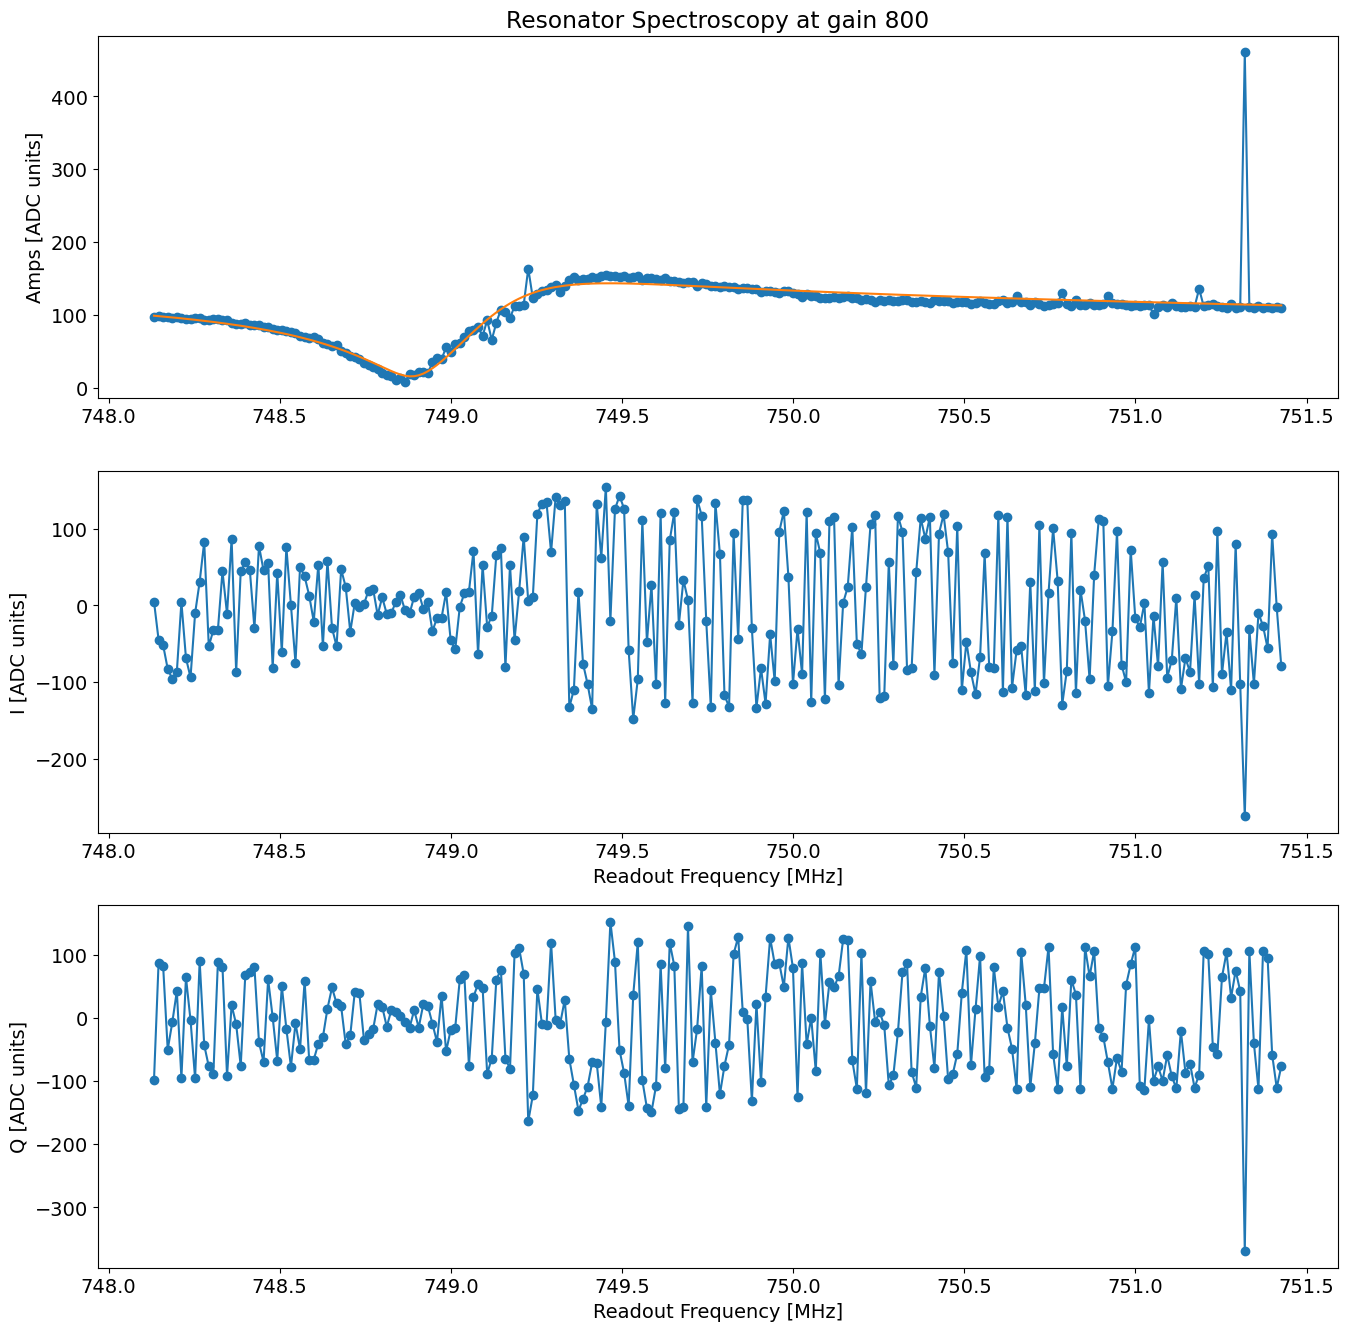

In [ ]:
if expts_to_run['res_spec']: 
    rspec = do_res_spec(config_thisrun=config_thisrun)

In [ ]:
rspec.data['fit'][0]

749.0683556354792

In [ ]:
if expts_to_run['res_spec']: 
    update_res_spec(rspec, config_thisrun)
    print('Resonator spectroscopy done!')

Updated readout frequency!
Resonator spectroscopy done!


## Single Shot

In [18]:
def do_single_shot(
    config_thisrun,
    expt_path,
    config_path,
    qubits=[0],
    reps=5000,
    check_f=False,
    active_reset=True,
    man_reset=False,
    storage_reset=False,
    qubit=0,
    pulse_manipulate=False,
    cavity_freq=4984.373226159381,
    cavity_gain=400,
    cavity_length=2,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    relax_delay=250
):
    """Run the single shot experiment with configurable parameters."""

    # if pre_sweep_pulse is None:
    #     pre_sweep_pulse = [
    #         ['qubit', 'ge', 'pi', 0],
    #     ]

    hstgrm = meas.single_qubit.single_shot.HistogramExperiment(
        soccfg=soc, path=expt_path, prefix='HistogramExperiment', config_file=config_path
    )

    hstgrm.cfg = AttrDict(deepcopy(config_thisrun))

    hstgrm.cfg.expt = {
        'qubits': qubits,
        'reps': reps,
        'check_f': check_f,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'qubit': qubit,
        'pulse_manipulate': pulse_manipulate,
        'cavity_freq': cavity_freq,
        'cavity_gain': cavity_gain,
        'cavity_length': cavity_length,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
    }

    hstgrm.cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]
    hstgrm.go(analyze=False, display=False, progress=True, save=True)
    from multimode_expts.fit_display_classes import Histogram
    
    hist_analysis = Histogram(
            hstgrm.data, verbose=True,
             span=None, threshold=None, config=hstgrm.cfg,
        )
    return hstgrm, hist_analysis


def update_single_shot(hist_analysis, config_thisrun):
    """Update the configuration based on single shot experiment results."""
    
    hist_analysis.analyze(plot = True)
    fids = hist_analysis.results['fids']
    confusion_matrix = hist_analysis.results['confusion_matrix']
    thresholds_new = hist_analysis.results['thresholds']
    angle = hist_analysis.results['angle']
    print(fids)

    config_thisrun.device.readout.phase = [config_thisrun.device.readout.phase[0] + angle]
    config_thisrun.device.readout.threshold = thresholds_new
    config_thisrun.device.readout.threshold_list = [thresholds_new]
    config_thisrun.device.readout.Ie = [np.median(hist_analysis.data['Ie_rot'])]
    config_thisrun.device.readout.Ig = [np.median(hist_analysis.data['Ig_rot'])]
    if hist_analysis.cfg.expt.active_reset:
        config_thisrun.device.readout.confusion_matrix_with_active_reset = confusion_matrix
    else:
        config_thisrun.device.readout.confusion_matrix_without_reset = confusion_matrix
    print('Updated readout!')

In [19]:
hstgrm = None
if expts_to_run['single_shot']: 
    hstgrm = do_single_shot(config_thisrun,  expt_path, config_path, reps = 5000, active_reset=False, relax_delay = 2500)


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00006_HistogramExperiment.h5
{'device': {'qubit': {'T1': [486.46448644846816], 'f_ge': [3571.709750355705], 'f_ef': [3428.4457610447353], 'ramp_sigma': [0.005], 'ramp_sigma_num': [3.0], 'pulses': {'pi_ge': {'gain': [3445], 'sigma': [0.035], 'length': [0.0], 'type': ['gauss']}, 'hpi_ge': {'gain': [1701], 'length': [0.0], 'sigma': [0.035], 'type': ['gauss']}, 'pi_ef': {'gain': [2770], 'length': [0.0], 'sigma': [0.035], 'type': ['gauss']}, 'hpi_ef': {'gain': [1318], 'sigma': [0.035], 'type': ['gauss']}, 'slow_pi_ge': {'gain': [15], 'sigma': [0.1], 'length': [10], 'type': ['flat_top']}}, 'T1_ef': [144.16571854782674]}, 'readout': {'trig_offset': [450], 'frequency': [749.0683556354792], 'gain': [800], 'phase': [-68.34629972735932], 'threshold': [-55.25421651086265], 'threshold_list': [[-55.25421651086265]], 'man1_drive_list': [0.0], 'man2_drive_list': [0.0], 'readout_length': [1.5], 'relax_delay': [2500], 'confusion_matrix_w

Unrotated:
Ig -116.25649350649351 +/- 30.76152757388582 	 Qg 19.571428571428573 +/- 25.77951127808726 	 Amp g 117.89237930736617
Ie -8.152597402597403 +/- 33.45925259150233 	 Qe 7.267316017316017 +/- 25.929864564514983 	 Amp e 10.921480050999309
updating temp data
Rotated:
Ig -117.50113298679638 +/- 30.765872898870917 	 Qg 6.403044936381268 +/- 25.774325310015115 	 Amp g 117.67546574217637
Ie -8.991191584042111 +/- 33.5228040625056 	 Qe 6.2123334498639515 +/- 25.847651113842097 	 Amp e 10.92861441323868


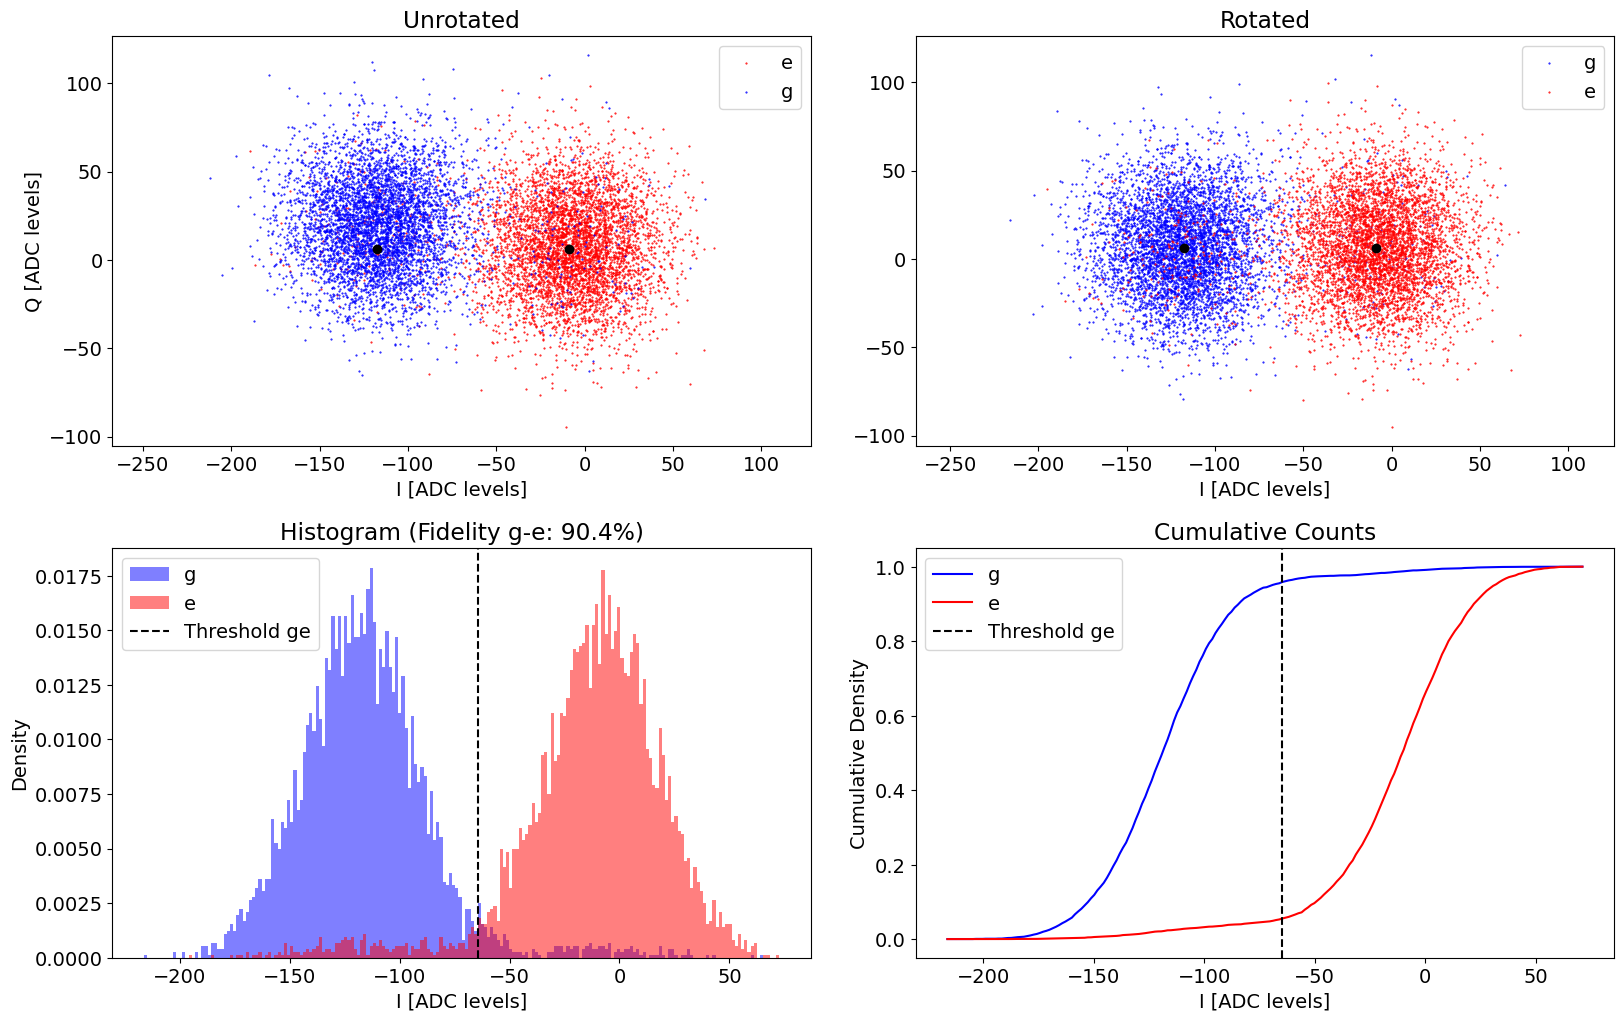

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_17-33-02_histogram.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md


In [20]:
hstgrm[1].analyze(plot = True)

In [19]:
config_thisrun.device.readout

{'trig_offset': [450],
 'frequency': [749.0683556354792],
 'gain': [800],
 'phase': [-69.8075664914381],
 'threshold': [-71.93799978190091],
 'threshold_list': [[-71.93799978190091]],
 'man1_drive_list': [0.0],
 'man2_drive_list': [0.0],
 'readout_length': [1.5],
 'relax_delay': [2500],
 'confusion_matrix_with_reset': [0.9964530022802125,
  0.0035469977197875036,
  0.013768302080657598,
  0.9862316979193424],
 'confusion_matrix_without_reset': [0.9660000000000003,
  0.0339999999999997,
  0.04500000000000002,
  0.955],
 'Ie': [-16.72328365182862],
 'Ig': [-124.34351224376776]}

Unrotated:
Ig -106.17857142857143 +/- 31.456104458619468 	 Qg 13.392857142857142 +/- 25.654525472729336 	 Amp g 107.01989372570515
Ie 3.279220779220779 +/- 32.221951541721126 	 Qe 10.60064935064935 +/- 25.32321594512685 	 Amp e 11.096263135591903
updating temp data
Rotated:
Ig -106.46612015520745 +/- 31.43957018622037 	 Qg 10.638316901439591 +/- 25.674785519030557 	 Amp g 106.99630146597836
Ie 3.070220837343409 +/- 32.21223144611443 	 Qe 10.701579005704545 +/- 25.3355791767725 	 Amp e 11.133285642854672


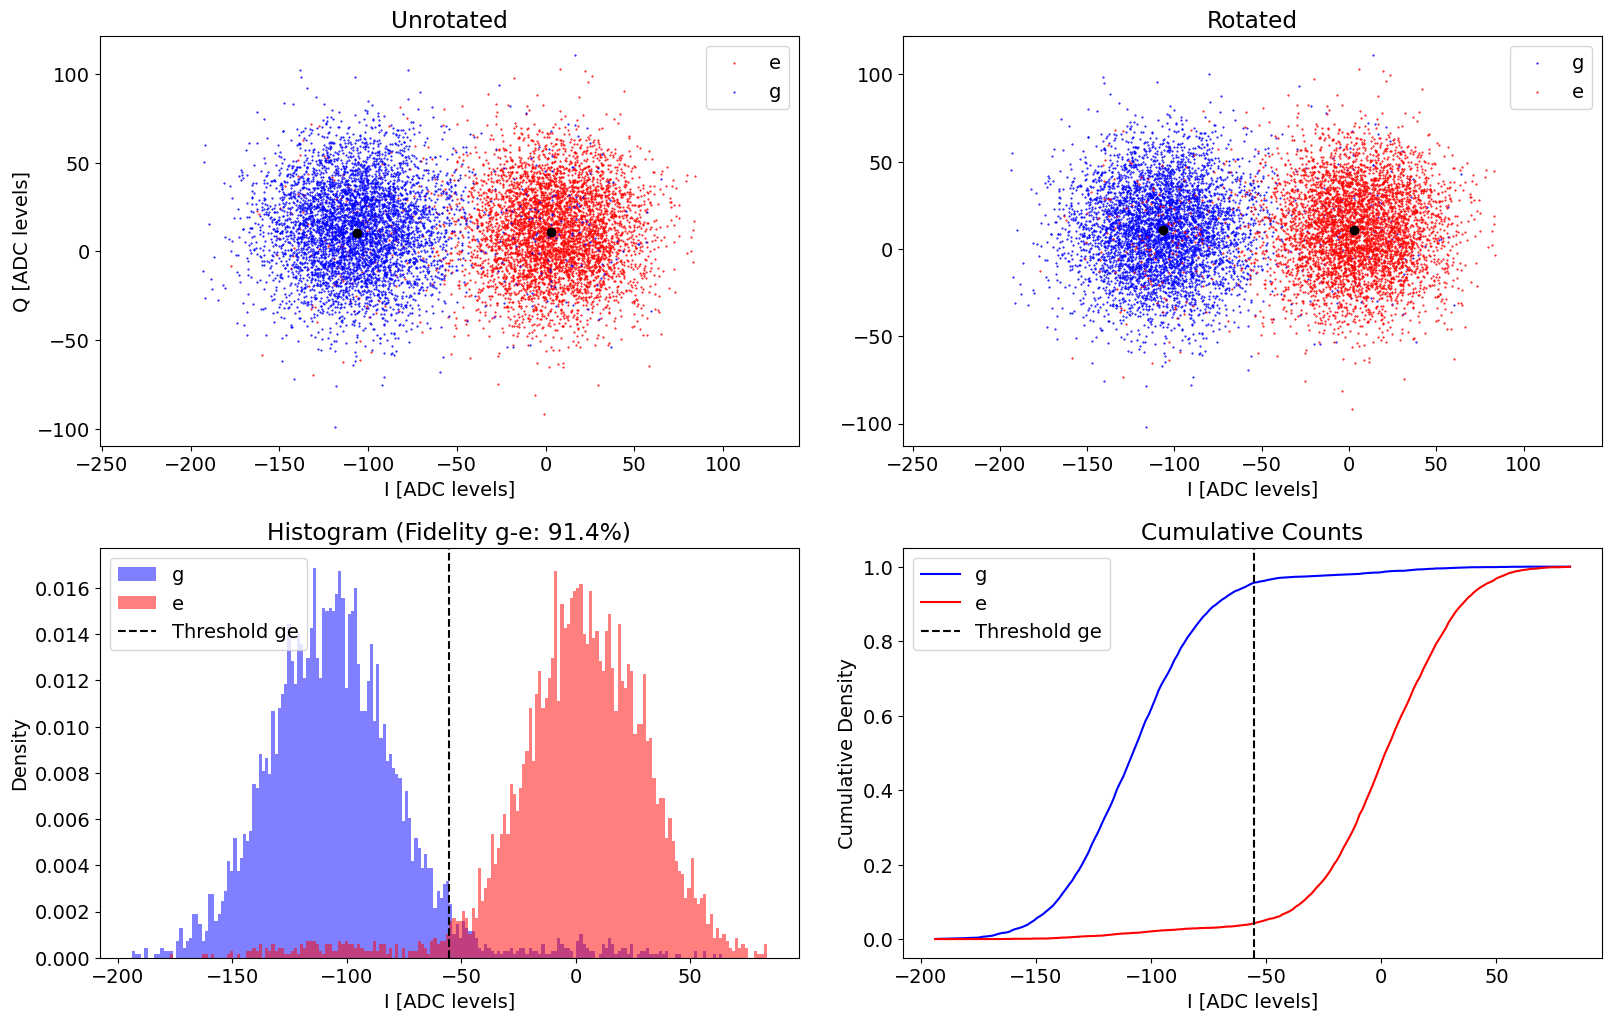

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-23_21-54-44_histogram.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-23.md
[0.914382876575315]
Updated readout!
Single shot done!


In [20]:
if expts_to_run['single_shot']:
    update_single_shot(hstgrm[1], config_thisrun)
    print('Single shot done!')

In [ ]:
# hstgrm.cfg

### JPA Calibration

In [ ]:
def do_jpa_current_sweep( config_thisrun,
    expt_path,
    config_path,
    jpa_current_start=-8,
    jpa_current_step=0.1,
    jpa_current_stop = -2,
    qubits=[0],
    reps=5000,
    check_f=False,
    active_reset=False,
    man_reset=False,
    storage_reset=False,
    qubit=0,
    pulse_manipulate=False,
    cavity_freq=4984.373226159381,
    cavity_gain=800,
    cavity_length=2,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    relax_delay=2500
):
    """Run the single shot experiment with configurable parameters."""
    from multimode_expts.sequential_experiment_classes import histogram_sweep_class
    experiment_class = histogram_sweep_class
    sweep_experiment_name = 'histogram_jpa_current_sweep'
    class_for_exp = experiment_class(soccfg=soc, path=expt_path, prefix=sweep_experiment_name, config_file=config_path, exp_param_file=exp_param_file)

    class_for_exp.yaml_cfg = AttrDict(deepcopy(config_thisrun))
    
    class_for_exp.loaded[sweep_experiment_name] =  {
        'qubits': qubits,
        'reps': reps,
        'check_f': check_f,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'qubit': qubit,
        'pulse_manipulate': pulse_manipulate,
        'cavity_freq': cavity_freq,
        'cavity_gain': cavity_gain,
        'cavity_length': cavity_length,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
        'jpa_current_start': jpa_current_start,
        'jpa_current_step': jpa_current_step,
        'jpa_current_stop': jpa_current_stop,
    }

   
    class_for_exp.yaml_cfg.device.readout.relax_delay = [2500]  # Wait time between experiments [us]

    return eval('class_for_exp.run_sweep')( sweep_experiment_name = sweep_experiment_name)

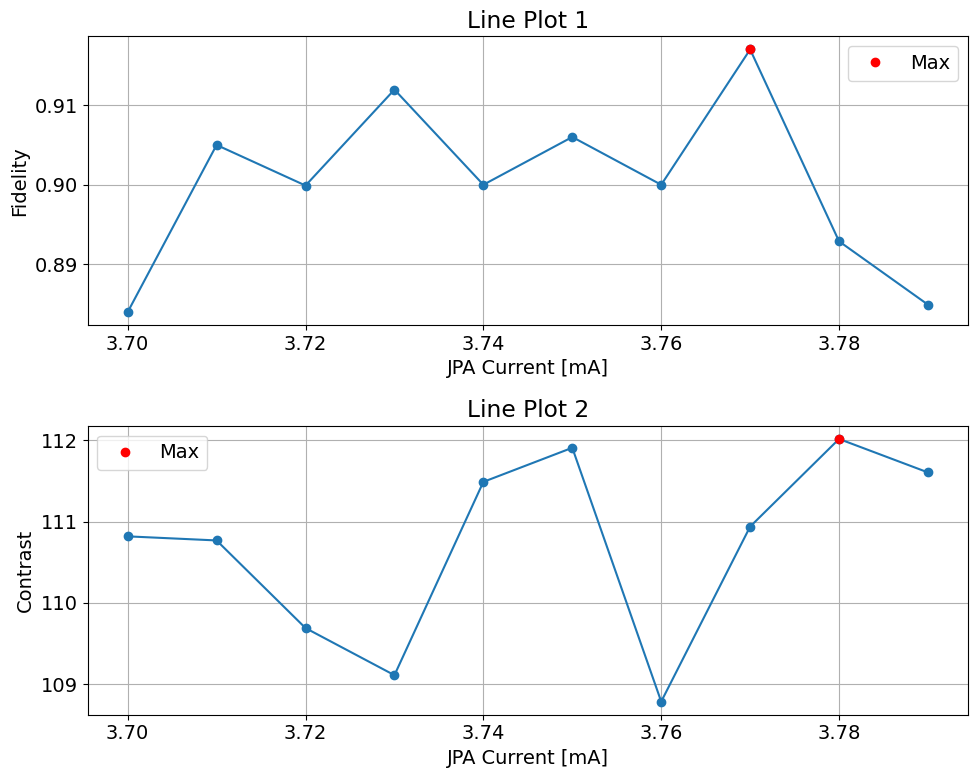

In [53]:
sweep_func = do_jpa_current_sweep(config_thisrun, expt_path, config_path, reps=1000, jpa_current_start=3.7, jpa_current_step=0.01, jpa_current_stop=3.8)

In [54]:
from slab.instruments import YokogawaGS200
dcflux = YokogawaGS200(address="192.168.137.149")
dcflux.set_output(True)
dcflux.set_mode('current')

jpa_current = 3.74 # mA
current = jpa_current * 1e-3  # Convert from mA to A
dcflux.set_current(current)

print(1e3 * dcflux.get_current(), 'mA')

3.7399999999999998 mA


#### Sweep both gain and current

In [51]:
def do_jpa_current_gain_sweep( config_thisrun,
    expt_path,
    config_path,
    jpa_current_start=-8,
    jpa_current_step=0.1,
    jpa_current_stop = -2,
    jpa_gain_start=-15,
    jpa_gain_step=1,
    jpa_gain_stop = -5,
    qubits=[0],
    reps=5000,
    check_f=False,
    active_reset=False,
    man_reset=False,
    storage_reset=False,
    qubit=0,
    pulse_manipulate=False,
    cavity_freq=4984.373226159381,
    cavity_gain=800,
    cavity_length=2,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    relax_delay=2500
):
    """Run the single shot experiment with configurable parameters."""
    from multimode_expts.sequential_experiment_classes import histogram_sweep_class
    experiment_class = histogram_sweep_class
    sweep_experiment_name = 'histogram_jpa_gain_current_sweep'
    class_for_exp = experiment_class(soccfg=soc, path=expt_path, prefix=sweep_experiment_name, config_file=config_path, exp_param_file=exp_param_file)

    class_for_exp.yaml_cfg = AttrDict(deepcopy(config_thisrun))
    
    class_for_exp.loaded[sweep_experiment_name] =  {
        'qubits': qubits,
        'reps': reps,
        'check_f': check_f,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'qubit': qubit,
        'pulse_manipulate': pulse_manipulate,
        'cavity_freq': cavity_freq,
        'cavity_gain': cavity_gain,
        'cavity_length': cavity_length,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
        'jpa_current_start': jpa_current_start,
        'jpa_current_step': jpa_current_step,
        'jpa_current_stop': jpa_current_stop,
        'jpa_gain_start': jpa_gain_start,
        'jpa_gain_step': jpa_gain_step,
        'jpa_gain_stop': jpa_gain_stop,
    }

   
    class_for_exp.yaml_cfg.device.readout.relax_delay = [2500]  # Wait time between experiments [us]

    return eval('class_for_exp.run_sweep')( sweep_experiment_name = sweep_experiment_name)

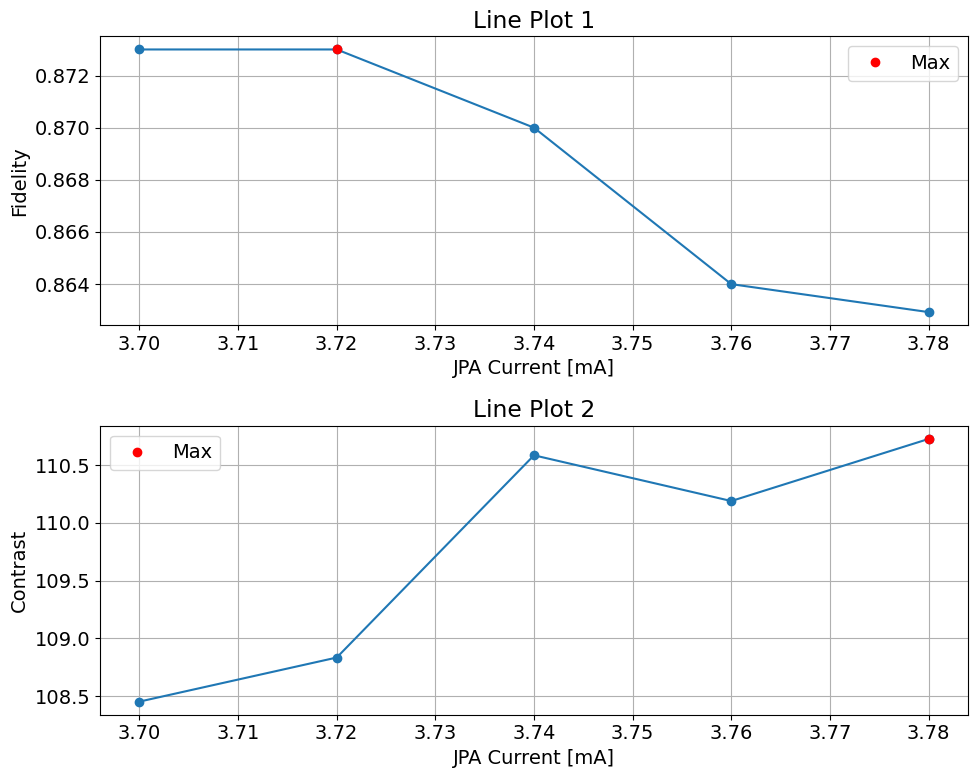

In [52]:
sweep_func = do_jpa_current_gain_sweep(config_thisrun, expt_path, config_path, reps=1000, jpa_current_start=3.7, jpa_current_step=0.02, jpa_current_stop=3.8)

## Qubit ge

### Pulse-probe

In [ ]:
def do_pulse_probe(
    config_thisrun, 
    start=3560,  # [MHz]
    step=0.1,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=2000,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=1,  # Qubit probe constant pulse length [us]
    gain=100,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=False,
    pre_sweep_pulse=[],
    gate_based=False,
    relax_delay=250,  # Wait time between experiments [us]
    ): 
    qspec = meas.single_qubit.pulse_probe_spectroscopy.PulseProbeSpectroscopyExperiment(
        soccfg=soc, path=expt_path, prefix='PulseProbeSpectroscopyExperiment', 
        config_file=config_file
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    qspec.cfg.expt = dict(
        qubits = [0],
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        length=length,
        gain=gain,
        sigma=sigma,
        qubit=qubit,
        prepulse = prepulse, 
        pre_sweep_pulse = pre_sweep_pulse,
        gate_based = gate_based,
    )

    qspec.cfg.device.readout.relax_delay = [relax_delay] # Wait time between experiments [us]
    qspec.go(analyze=True, display=True, progress=True, save=True)
    return qspec

def update_pulse_probe_ge(qspec, config_thisrun):
    config_thisrun.device.qubit.f_ge = [qspec.data['fit_avgi'][2]]
    print('Updated qubit frequency!')

pulssing on channel:  2
qubit register page: 1, frequency register: 22


  0%|          | 0/50000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00006_PulseProbeSpectroscopyExperiment.h5
Found peak in amps at [MHz] 3571.7020736548116, HWHM 0.36469719452680766
Found peak in I at [MHz] 3571.7025089662343, HWHM 0.3570081075044043
Found peak in Q at [MHz] 3571.740280065973, HWHM 0.3379374103764749


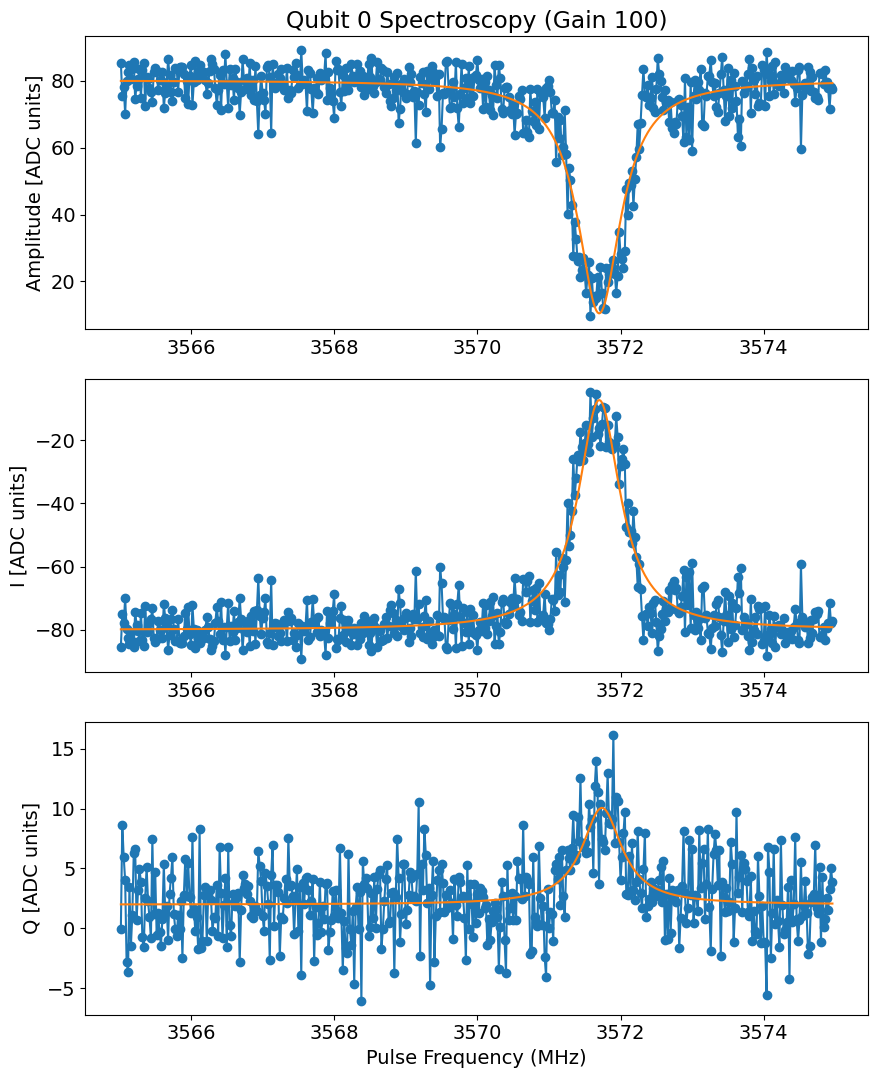

In [ ]:
qspec =  do_pulse_probe(
    config_thisrun=config_thisrun,
    start=3565,  # [MHz]
    step=0.02,  # min step ~1 MHz
    expts=500,  # Number of experiments stepping from start
    reps=100,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=1,  # Qubit probe constant pulse length [us]
    gain=100,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=False,
    pre_sweep_pulse=[],
    gate_based=False,
    relax_delay=300  # Wait time between experiments [us]
)

In [ ]:
# if expts_to_run['pulse_probe_ge']: 
#     qspec = do_pulse_probe_ge(config_thisrun)

In [ ]:
if expts_to_run['pulse_probe_ge']:
    update_pulse_probe_ge(qspec, config_thisrun)
    print('Pulse probe spectroscopy done!')

Updated qubit frequency!
Pulse probe spectroscopy done!


### T2 Ramsey

In [21]:
def do_t2_ramsey_ge(
    config_thisrun,
    expt_path,
    config_path,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    step_size=soc.cycles2us(8),
    if_ef=False,
    ef_init=True, # redundant
    start=0.01,
    expts=200,
    ramsey_freq=3,  # [MHz]
    reps=200,
    rounds=1,
    qubits=[0],
    user_defined_freq=[False, 3568.2038290468167, 5304, 0.035],
    f0g1_cavity=0,
    normalize=False,
    active_reset=True,
    man_reset=True,
    storage_reset=False,
    prepulse=None,
    postpulse=None,
    pre_active_reset_pulse=False,
    gate_based=False,
    advance_phase=0,
    echoes=[False, 0],
    relax_delay=200
):
    """Run the T2 Ramsey experiment with all config params as function arguments."""
    t2ramsey = meas.single_qubit.t2_ramsey.RamseyExperiment(
        soccfg=soc, path=expt_path, prefix='RamseyExperiment', config_file=config_path
    )

    t2ramsey.cfg = AttrDict(deepcopy(config_thisrun))
    checkEF = False
    qubit_ge_init = False
    qubit_ge_after = False
    if if_ef:
        checkEF = True
        qubit_ge_init = True if ef_init else False
        qubit_ge_after = True if ef_init else False

    t2ramsey.cfg.expt = {
        'start': start,
        'step': step_size,
        'expts': expts,
        'ramsey_freq': ramsey_freq,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubits,
        'checkEF': checkEF,
        'user_defined_freq': user_defined_freq,
        'qubit_ge_init': qubit_ge_init,
        'qubit_ge_after': qubit_ge_after,
        'f0g1_cavity': f0g1_cavity,
        'normalize': normalize,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'prepulse': False if pre_sweep_pulse is None else True if prepulse is None else prepulse,
        'postpulse': False if post_sweep_pulse is None else True if postpulse is None else postpulse,
        'pre_active_reset_pulse': pre_active_reset_pulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'post_sweep_pulse': post_sweep_pulse,
        'gate_based': gate_based,
        'advance_phase': advance_phase,
        'echoes': echoes
    }

    t2ramsey.cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]
    # t2ramsey.cfg.device.qubit.f_ge = [3567.346809921427]
    t2ramsey.go(analyze=False, display=False, progress=True, save=True)
    from multimode_expts.fit_display_classes import RamseyFitting
    t2ramsey_analysis = RamseyFitting(
        t2ramsey.data, config=t2ramsey.cfg,
    )
    return t2ramsey_analysis



def update_t2_ramsey_ge(t2ramsey, config_thisrun):
    """Update the configuration based on T2 Ramsey experiment results."""
    config_thisrun.device.qubit.f_ge = [config_thisrun.device.qubit.f_ge[0] + min(t2ramsey.data['f_adjust_ramsey_avgi'])]
    print('Updated qubit ge frequency to:', config_thisrun.device.qubit.f_ge[0])



fge is  3571.6994214615424
fef is  3428.4457610447353


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00001_RamseyExperiment.h5
No echoes in the data
length 100 100
Attempted to init fitparam 4 to -48.18776363636363, which is out of bounds -12.830995670995671 to 19.611125541125542. Instead init to 3.3900649350649354
Current pi pulse frequency: 3571.6994214615424
Fit frequency from I [MHz]: 1.9896711058373036 +/- 0.0043718596983031675
Suggested new pi pulse frequency from fit I [MHz]:
 	3571.709750355705
 	3575.6890925673797
T2 Ramsey from fit I [us]: 22.52785201383078
Fit frequency from Q [MHz]: 1.9731853941190052 +/- 0.11552688701164776
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3571.7262360674235
 	3575.6726068556613
T2 Ramsey from fit Q [us]: 0.7465667024267819


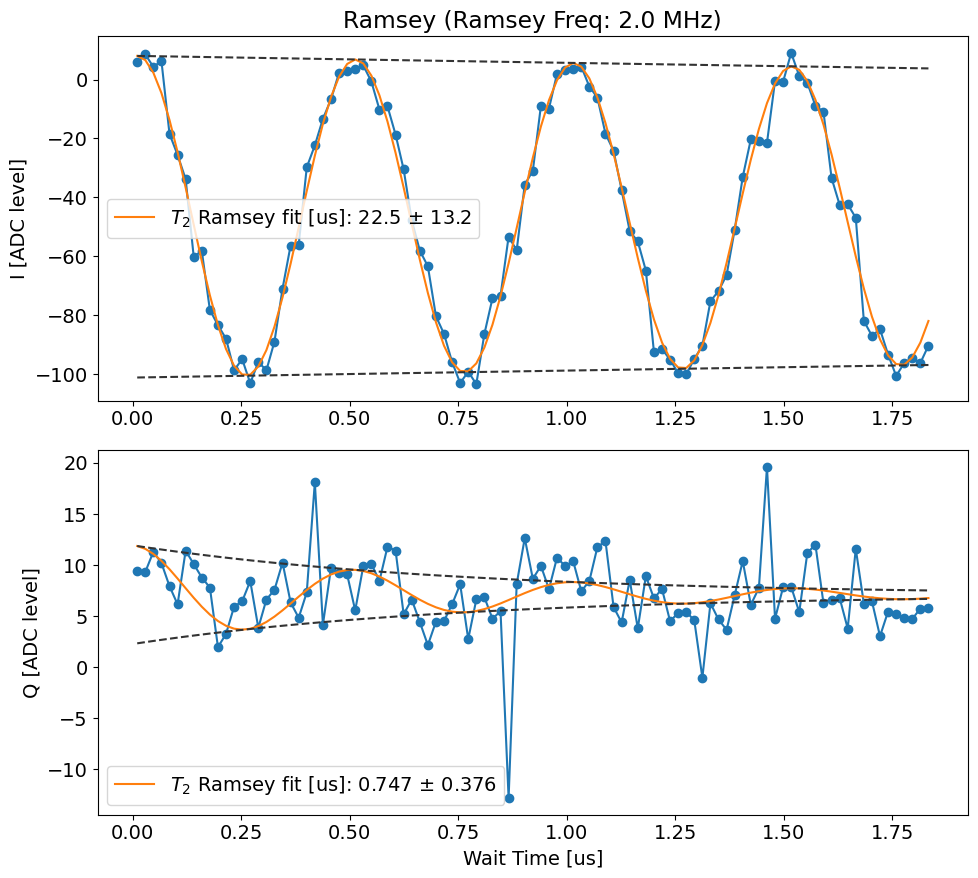

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-23_22-14-28_T2_ge.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-23.md
T2 Ramsey done!


In [22]:
t2ramsey_ge = None
if expts_to_run['t2_ge']:
    # pre_sweep_pulse = [
    #     ['qubit', 'ge', 'pi', 0],
    #     ['qubit', 'ef', 'pi', 0],
    #     ['man', 'M1', 'pi', 0],
    # ]
    pre_sweep_pulse = None
    t2ramsey_ge = do_t2_ramsey_ge(config_thisrun, expt_path, config_path,
                                  ramsey_freq=2.0,
                                  step_size=soc.cycles2us(8),
                                  expts=100,
                                  pre_sweep_pulse=pre_sweep_pulse,
                                  reps=100, active_reset=False, relax_delay=2500)
    t2ramsey_ge.analyze()
    t2ramsey_ge.display(title_str='T2_ge')
    print('T2 Ramsey done!')

In [ ]:
# config_thisrun.device.qubit.f_ge[0]= 3571.672429380876

In [23]:
if expts_to_run['t2_ge']:
    update_t2_ramsey_ge(t2ramsey_ge, config_thisrun)
    print('T2 Ramsey updated!')

Updated qubit ge frequency to: 3571.709750355705
T2 Ramsey updated!


In [ ]:
# idata = t2ramsey_ge.data['idata']
# idata = idata.reshape((len(idata)//4,4))

# qdata = t2ramsey_ge.data['qdata']
# qdata = qdata.reshape((len(qdata)//4,4))

# fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(8,8))
# for kk in range(4):
#     axs[kk,0].hist(idata[:,kk], bins=100)
#     axs[kk,1].hist(qdata[:,kk], bins=100)
# None

No echoes in the data
length 100 100
Attempted to init fitparam 4 to -52.82678030303031, which is out of bounds 5.09417748917749 to 35.75958874458875. Instead init to 20.42688311688312
Current pi pulse frequency: 3571.6994214615424
Fit frequency from I [MHz]: 1.996775773223382 +/- 0.004821143276051492
Suggested new pi pulse frequency from fit I [MHz]:
 	3571.702645688319
 	3575.696197234766
T2 Ramsey from fit I [us]: 39.86492122370626
Fit frequency from Q [MHz]: 0.054303031173281155 +/- 22.22861308918516
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3573.645118430369
 	3573.7537244927157
T2 Ramsey from fit Q [us]: 0.5524553571428715


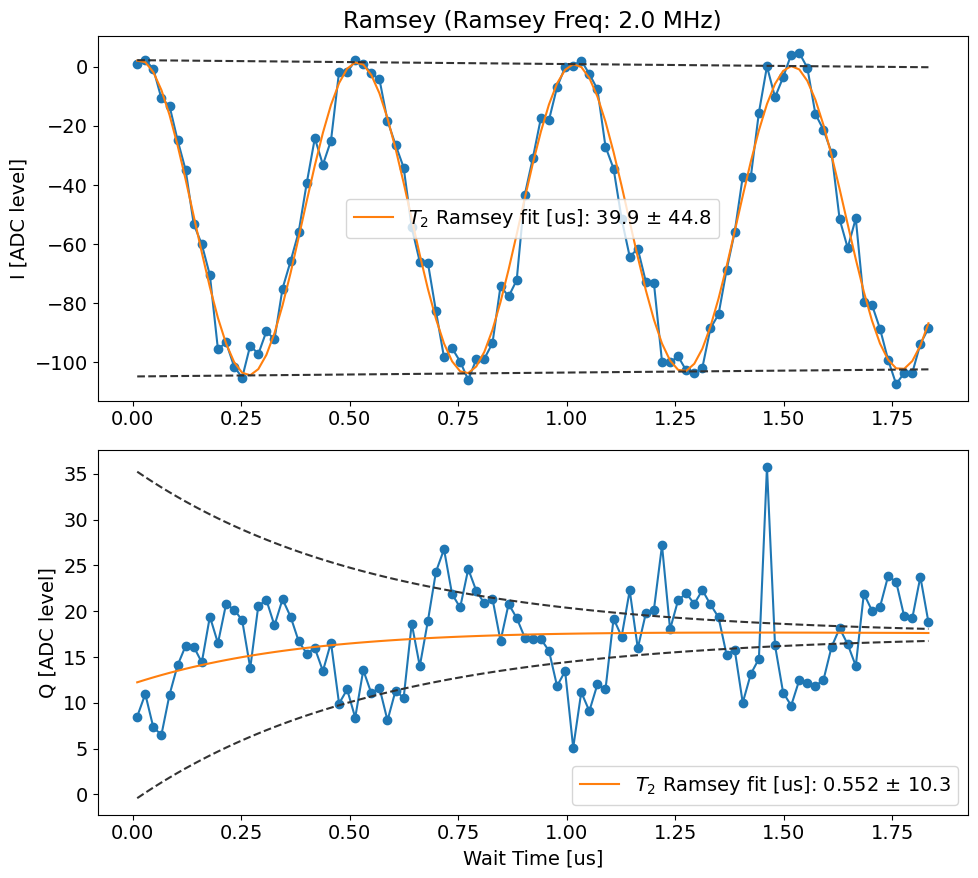

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-12_20-20-49_T2_ge.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-12.md


In [ ]:
t2ramsey_ge.analyze()
t2ramsey_ge.display(title_str='T2_ge')

In [ ]:
# config_thisrun.device.qubit.f_ge = yaml_cfg.device.qubit.f_ge

### Amplitude Rabi

We should probably use a cosine fit with fixed phase=0 instead of decaying sine with varying phase?

In [24]:
def do_amplitude_rabi(
    config_thisrun,
    expt_path,
    config_path,
    start=None,
    step=None,
    expts=151,
    reps=200,
    rounds=1,
    sigma_test=None,
    qubit=0,
    pulse_type='gauss',
    drag_beta=0.0,
    pulse_ge_init=False,
    pulse_ge_after=False,
    checkZZ=False,
    checkEF=False,
    qubits=[0],
    flat_length=0,
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=50,
    user_defined_freq=[False, 3568.203829046816],
    prepulse=False,
    postpulse=False, 
    if_ef=False,  # If true, will check ef frequency and update it
):
    """
    Run the amplitude Rabi experiment.
    All experiment parameters are function arguments.
    """
    amprabi = meas.single_qubit.amplitude_rabi.AmplitudeRabiExperiment(
        soccfg=soc, path=expt_path, prefix='AmplitudeRabiExperiment', config_file=config_path
    )

    amprabi.cfg = AttrDict(deepcopy(config_thisrun))

    pulse_ge = config_thisrun.device.qubit.pulses.pi_ge
    if sigma_test is None:
        sigma_test = pulse_ge.sigma[0]
    if start is None:
        start = 0
    if step is None:
        step = pulse_ge.gain[0] / (expts - 1)
    
    checkEF = False
    pulse_ge_init = False
    pulse_ge_after = False
    if if_ef:
        checkEF = True
        pulse_ge_init = True
        pulse_ge_after = True

    amprabi.cfg.expt = dict(
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        sigma_test=sigma_test,
        qubit=qubit,
        pulse_type=pulse_type,
        drag_beta=drag_beta,
        pulse_ge_init=pulse_ge_init,
        pulse_ge_after=pulse_ge_after,
        checkZZ=checkZZ,
        checkEF=checkEF,
        qubits=qubits,
        flat_length=flat_length,
        normalize=normalize,
        single_shot=single_shot,
        singleshot_reps=singleshot_reps,
        span=span,
        user_defined_freq=user_defined_freq,
        prepulse=prepulse,
        postpulse=postpulse
    )

    amprabi.cfg.device.readout.relax_delay = [2500]  # Wait time between experiments [us]
    amprabi.go(analyze=False, display=False, progress=True, save=True)

    from multimode_expts.fit_display_classes import AmplitudeRabiFitting
    amprabi_analysis = AmplitudeRabiFitting(
        amprabi.data, 
        readout_per_round=4, config=amprabi.cfg,
    )
    return amprabi_analysis


def update_amplitude_rabi(amprabi, config_thisrun):
    """Update the configuration based on amplitude Rabi experiment results."""
    config_thisrun.device.qubit.pulses.pi_ge.gain = [amprabi.data['pi_gain_avgi']]
    config_thisrun.device.qubit.pulses.hpi_ge.gain = [amprabi.data['hpi_gain_avgi']]
    print('Updated qubit ge pi and hpi gaussian gain!')



In [25]:
amprabi = do_amplitude_rabi(config_thisrun, expt_path, config_path, step = 60)

  0%|          | 0/30200 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00000_AmplitudeRabiExperiment.h5


Attempted to init fitparam 4 to -53.43572063492064, which is out of bounds 1.4788852813852813 to 11.455497835497834. Instead init to 6.467191558441558
Attempted to init fitparam 4 to 6.467191558441558, which is out of bounds 7.316967787116951 to 102.81939227445291. Instead init to 55.06818003078493
Pi gain from avgi data [dac units]: 3445
	Pi/2 gain from avgi data [dac units]: 1701
Pi gain from avgq data [dac units]: 3160
	Pi/2 gain from avgq data [dac units]: 989


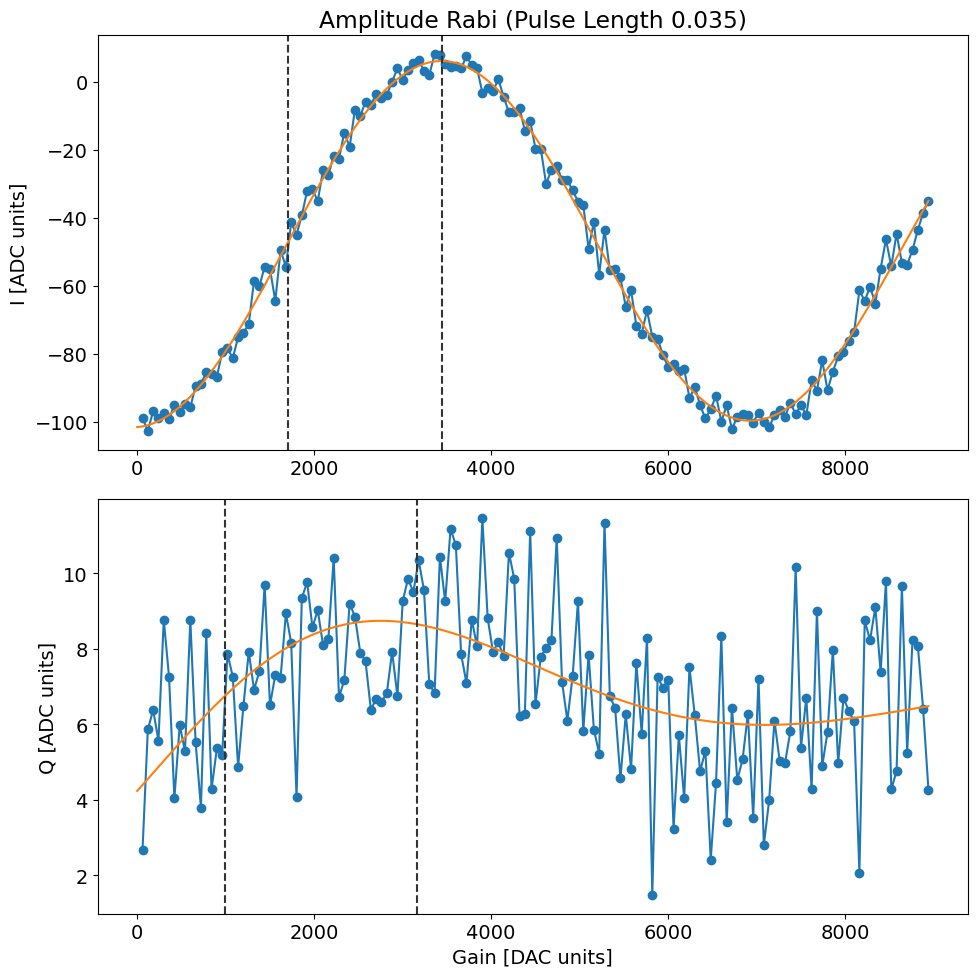

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-23_22-25-23_Amplitude_Rabi_ge.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-23.md
Updated qubit ge pi and hpi gaussian gain!


In [30]:
# [amplitude, frequency, phase, decay_time, offset, decay_offset]
amprabi.analyze(fitparams=[np.ptp(amprabi.data['avgi'])/2, 0.0001, np.pi, 1000000,None, None])
amprabi.display(title_str='Amplitude Rabi_ge', save_fig=True)
update_amplitude_rabi(amprabi, config_thisrun)

In [ ]:
amprabi = do_amplitude_rabi(config_thisrun, expt_path, config_path)

In [ ]:
amprabi = None
t2_ramsey_ge_after_amp = None
if expts_to_run['amplitude_ge']:
    # amprabi = do_amplitude_rabi(config_thisrun, expt_path, config_path)
    # amprabi.analyze(fitparams=[np.max(amprabi.data['amps']), 0.00001, 90, None, None, None])
    # amprabi.display(title_str='Amplitude Rabi_ge', save_fig=True)
    # update_amplitude_rabi(amprabi, config_thisrun)
    # print('Amplitude Rabi done!')

    # After this do another round of T2 to fine tune the qubit frequency
    t2_ramsey_ge_after_amp  = do_t2_ramsey_ge(config_thisrun, expt_path, config_path)
    t2_ramsey_ge_after_amp.analyze()
    t2_ramsey_ge_after_amp.display(title_str='T2_ge_after_amp')
    # update_t2_ramsey_ge(t2_ramsey_ge_after_amp , config_thisrun)
    print('T2 Ramsey done!')

RuntimeError: Immediate values are only 31 bits 2576980378 > 2**31

In [ ]:
# amprabi.analyze(fitparams= [np.max(amprabi.data['amps']), 0.00001, 90, None, None, None])
# amprabi.display()
# update_amplitude_rabi(amprabi, config_thisrun)
# print('Amplitude Rabi done!')

In [ ]:
# amprabi.analyze(fitparams= [np.max(amprabi.data['amps']), 0.0001, 90, None, None, None])
# amprabi.display()
# update_amplitude_rabi(amprabi, config_thisrun)


# Magic Params: [np.max(amprabi.data['amps']), 0.00001, 90, None, None, None]

Updated qubit ge pi and hpi gaussian gain!


### T1

In [ ]:
def do_t1_ge(config_thisrun, expt_path, config_path):
    """Run the T1 experiment."""
    t1 = meas.single_qubit.t1.T1Experiment(
        soccfg=soc, path=expt_path, prefix='T1Experiment', config_file=config_path
    )

    t1.cfg = AttrDict(deepcopy(config_thisrun))

    t1.cfg.expt = {
        'start': 0,
        'step': 10,
        'expts': 100,
        'reps': 50,
        'rounds': 1,
        'qubit': 0,
        'qubit_ef': False,
        'normalize': False
    }

    t1.cfg.device.readout.relax_delay = [2500]  # Wait time between experiments [us]
    t1.go(analyze=True, display=True, progress=True, save=True)
    return t1


def update_t1_ge(t1, config_thisrun):
    """Update the configuration based on T1 experiment results."""
    config_thisrun.device.qubit.T1 = [t1.data['fit_avgi'][3]]
    print('Updated qubit T1!')


  0%|          | 0/5000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00004_T1Experiment.h5
Fit T1 avgi [us]: 486.46448644846816
Fit T1 avgq [us]: 423.24335650316567


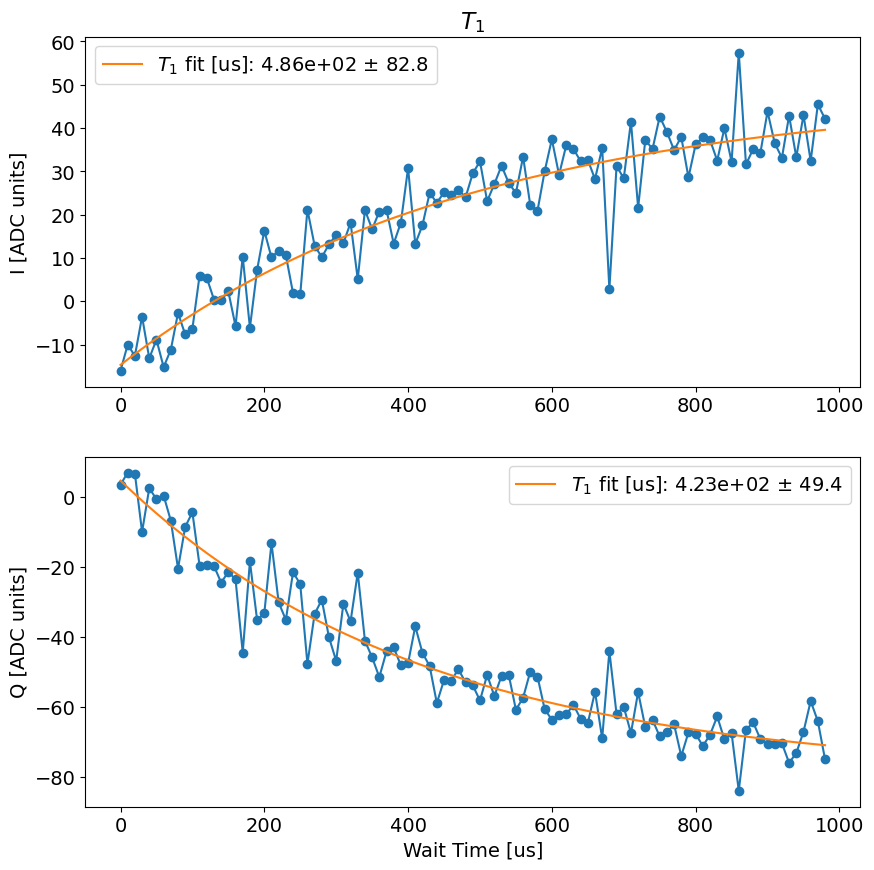

Fit T1 avgi [us]: 486.46448644846816
Fit T1 avgq [us]: 423.24335650316567


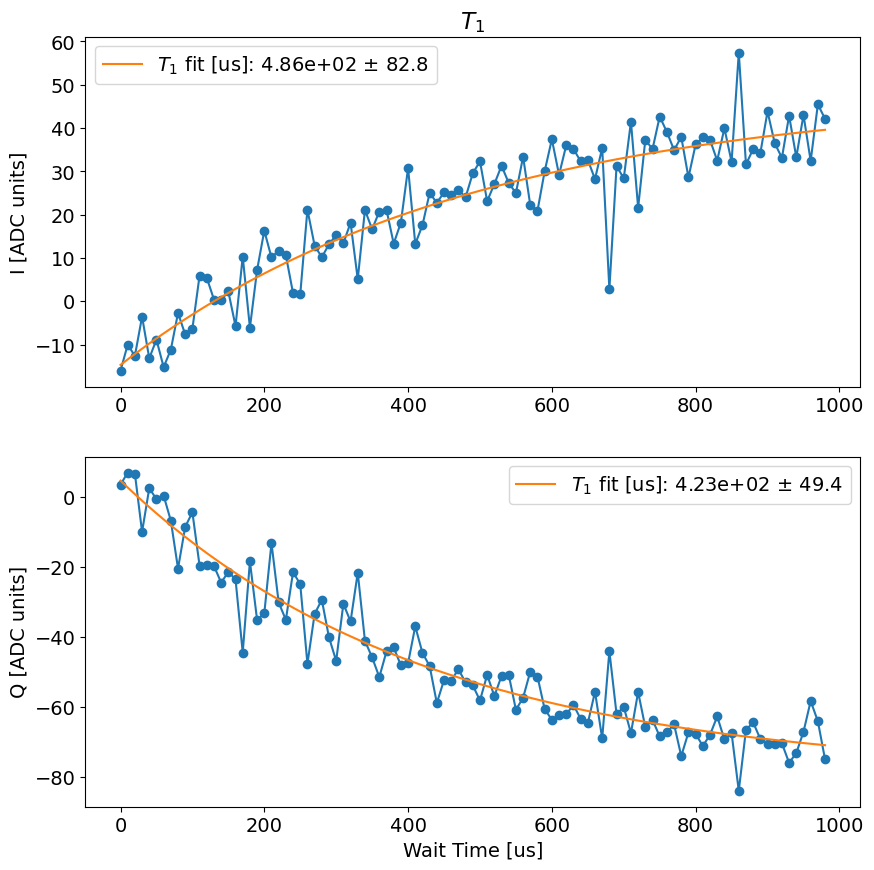

Updated qubit T1!
T1 done!


In [ ]:
t1 = None
if expts_to_run['t1_ge']:
    t1 = do_t1_ge(config_thisrun, expt_path, config_path)
    t1.analyze()
    t1.display()
    update_t1_ge(t1, config_thisrun)
    print('T1 done!')

## Qubit ef

### Pulse-probe

In [ ]:
def do_pulse_probe_ef(config_thisrun): 

    qspec = meas.single_qubit.pulse_probe_ef_spectroscopy.PulseProbeEFSpectroscopyExperiment(
        soccfg=soc, path=expt_path, prefix='PulseProbeEFSpectroscopyExperiment', config_file=config_path
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    qspec.cfg.expt = {'start': 3415,
        'step': 0.05,
        'expts': 500,
        'reps': 200,
        'rounds': 1,
        'length': 1,
        'gain': 100,
        # 'pulse_type': 'gaussian',
        'qubit_f': False,
        'qubit': 0,
        'cavity_drive': False,
        'wait_qubit': False,}



    qspec.cfg.device.readout.relax_delay = [500] # Wait time between experiments [us]
    qspec.go(analyze=True, display=True, progress=True, save=True)
    return qspec

def update_pulse_probe_ef(qspec, config_thisrun):
    config_thisrun.device.qubit.f_ef = [qspec.data['fit_avgi'][2]]
    print('Updated qubit frequency!')

In [ ]:
# expts_to_run['pulse_probe_ef'] = True

  0%|          | 0/100000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00002_PulseProbeEFSpectroscopyExperiment.h5
Found peak in amps at [MHz] 3428.446823592656, HWHM -0.49445737204207
Found peak in I at [MHz] 3428.4360588633613, HWHM -0.38813775666175615
Found peak in Q at [MHz] 3428.4314519025347, HWHM -0.37685362189124205


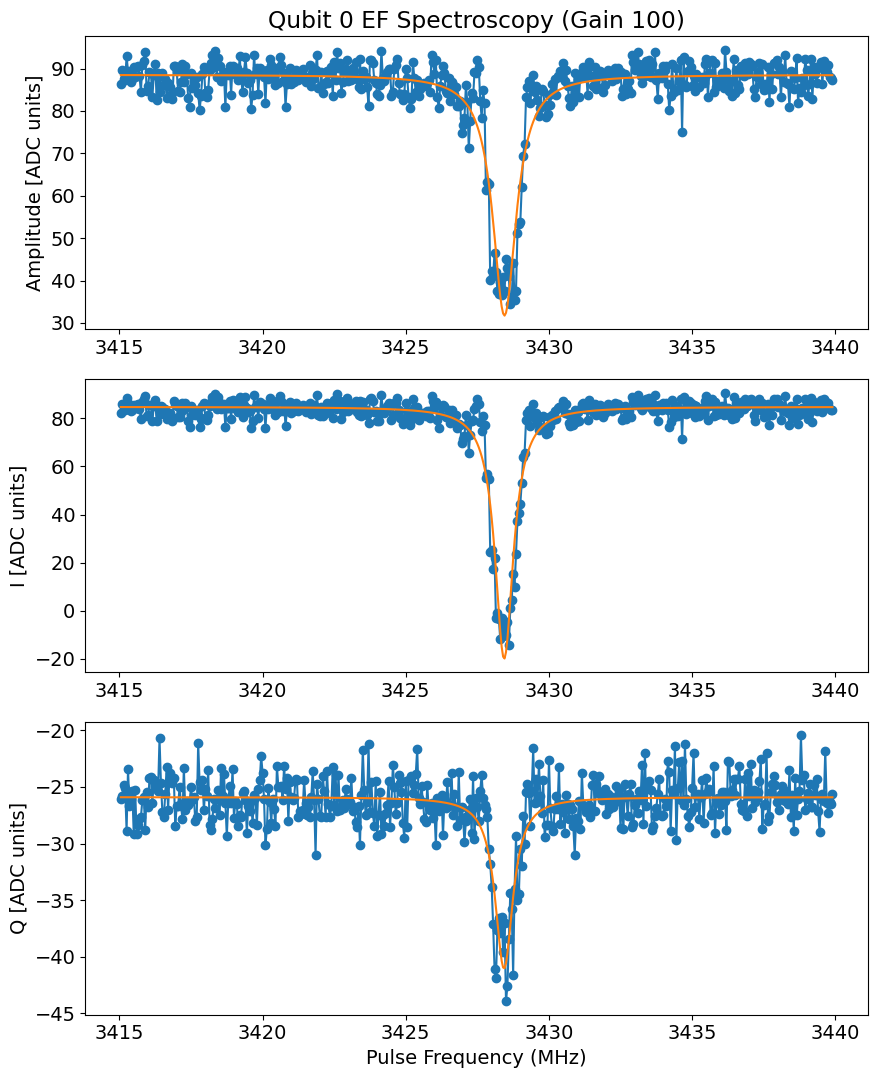

In [ ]:
qspec_ef = None
if expts_to_run['pulse_probe_ef']: 
    qspec_ef = do_pulse_probe_ef(config_thisrun)


In [ ]:
if expts_to_run['pulse_probe_ef']:
    update_pulse_probe_ef(qspec_ef, config_thisrun)
    print('Pulse probe spectroscopy done!')

Updated qubit frequency!
Pulse probe spectroscopy done!


### T2 Ramsey

In [ ]:
def do_t2_ramsey_ef(config_thisrun, expt_path, config_path, ef_init = True, pre_sweep_pulse = None, post_sweep_pulse = None, ramsey_freq = 3, step_size = soc.cycles2us(8), 
                    active_reset = False, relax_delay = 2500, reps = 100):
    """Run the T2 Ramsey experiment."""
    return do_t2_ramsey_ge(config_thisrun, expt_path, config_path, pre_sweep_pulse=pre_sweep_pulse, 
                            post_sweep_pulse=post_sweep_pulse, ramsey_freq=ramsey_freq, step_size=step_size, if_ef=True, ef_init=ef_init,
                            active_reset=active_reset, relax_delay=relax_delay, reps = reps)
    


def update_t2_ramsey_ef(t2ramsey, config_thisrun):
    """Update the configuration based on T2 Ramsey experiment results."""
    config_thisrun.device.qubit.f_ef = [config_thisrun.device.qubit.f_ef[0] + min(t2ramsey.data['f_adjust_ramsey_avgi'])]
    print('Updated qubit ef frequency to:', config_thisrun.device.qubit.f_ef[0])



fge is  3571.6994214615424
fef is  3428.4360588633613


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00074_RamseyExperiment.h5
No echoes in the data
length 200 200
Attempted to init fitparam 4 to -11.984948917748918, which is out of bounds 31.6917316017316 to 74.48969696969696. Instead init to 53.090714285714284
Current pi pulse frequency: 3428.4360588633613
Fit frequency from I [MHz]: 2.9902978186259443 +/- 0.0012677503846299702
Suggested new pi pulse frequency from fit I [MHz]:
 	3428.4457610447353
 	3434.4263566819873
T2 Ramsey from fit I [us]: 38.832512295750625
Fit frequency from Q [MHz]: 2.987882091927206 +/- 0.025394523713926923
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3428.448176771434
 	3434.4239409552883
T2 Ramsey from fit Q [us]: 1.6442116035957748


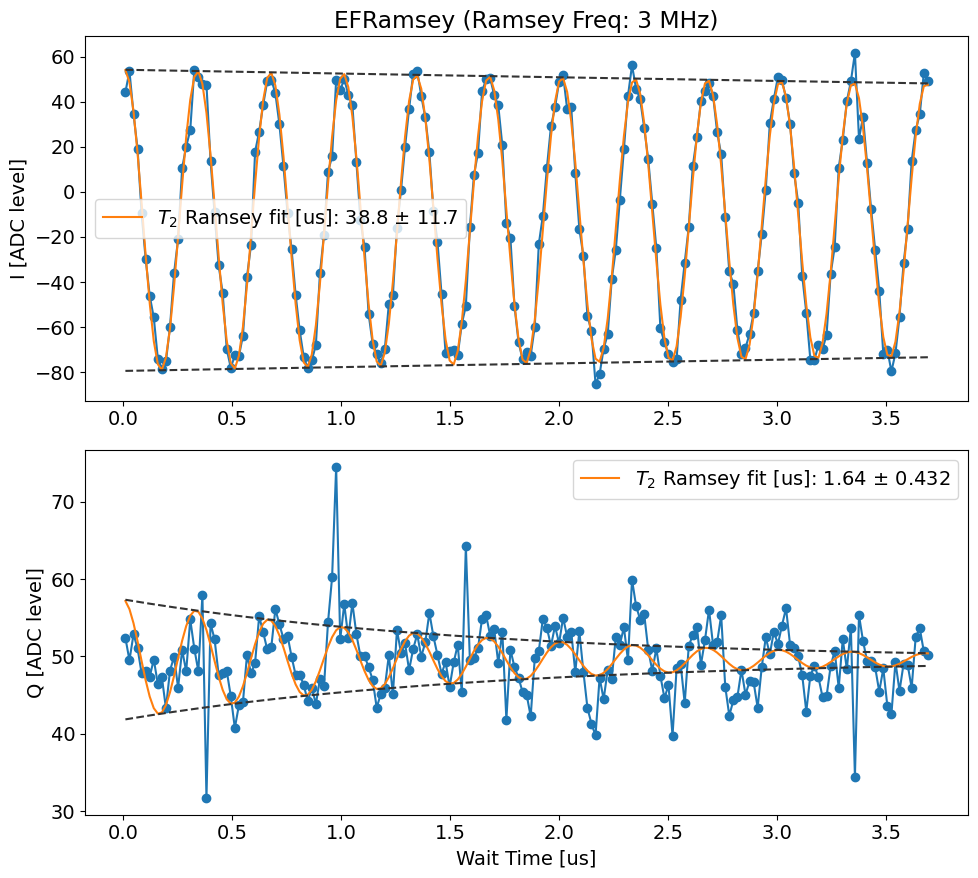

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-22_12-43-42_T2_ef.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-22.md
T2 Ramsey done!


In [ ]:
t2ramsey_ef = None
if expts_to_run['t2_ef']:
    t2ramsey_ef = do_t2_ramsey_ef(config_thisrun, expt_path, config_path)
    t2ramsey_ef.analyze()
    t2ramsey_ef.display(title_str='T2_ef')
    # update_t2_ramsey_ef(t2ramsey_ef, config_thisrun)
    print('T2 Ramsey done!')

In [ ]:
# t2ramsey_ef.analyze(fitparams=[100, 10, None, 20, None, None])
# t2ramsey_ef.display(title_str='T2_ef')
update_t2_ramsey_ef(t2ramsey_ef, config_thisrun)

Updated qubit ef frequency to: 3428.4457610447353


In [ ]:
# config_thisrun.device.qubit.f_ef[0] = 3428.4219538800357

In [ ]:
# t2ramsey_ge.analyze()
# t2ramsey_ge.display()
    

### Amplitude Rabi

We should probably use a cosine fit with fixed phase=0 instead of decaying sine with varying phase?

In [ ]:
def do_amplitude_rabi_ef(config_thisrun, expt_path, config_path):
    """Run the amplitude Rabi experiment."""
    return do_amplitude_rabi(config_thisrun, expt_path, config_path, step=40, expts=150, if_ef=True)


def update_amplitude_rabi_ef(amprabi, config_thisrun):
    """Update the configuration based on amplitude Rabi experiment results."""
    config_thisrun.device.qubit.pulses.pi_ef.gain = [amprabi.data['pi_gain_avgi']]
    config_thisrun.device.qubit.pulses.hpi_ef.gain = [amprabi.data['hpi_gain_avgi']]
    print('Updated qubit ef pi and hpi gaussian gain!')



  0%|          | 0/30000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00024_AmplitudeRabiExperiment.h5
Attempted to init fitparam 4 to -115.30545418228307, which is out of bounds -34.29827922077922 to 22.221450216450215. Instead init to -6.038414502164503
Attempted to init fitparam 4 to -6.038414502164503, which is out of bounds 52.88871936767338 to 177.04546194510453. Instead init to 114.96709065638896
Pi gain from avgi data [dac units]: 2770
	Pi/2 gain from avgi data [dac units]: 1318
Pi gain from avgq data [dac units]: 2748
	Pi/2 gain from avgq data [dac units]: 1000


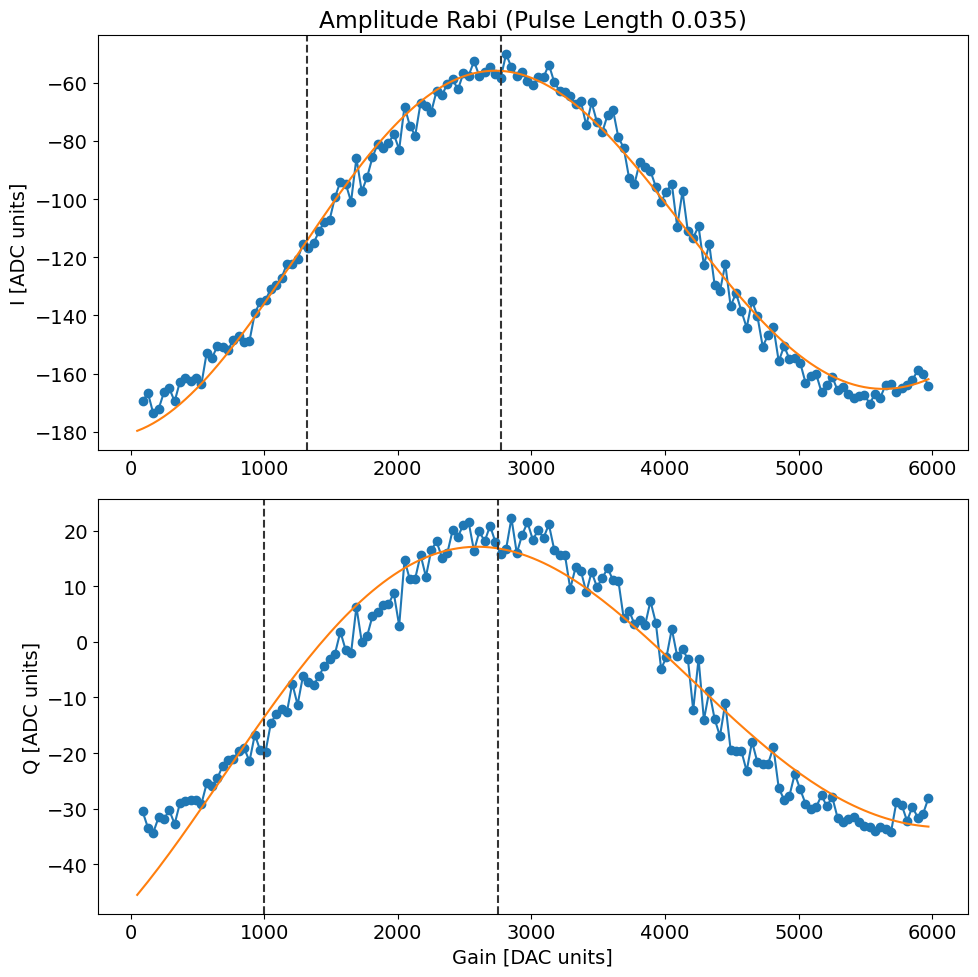

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-14_16-13-56_Amplitude_Rabi_ef.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-14.md


In [ ]:
amprabi_ef = do_amplitude_rabi_ef(config_thisrun, expt_path, config_path)
amprabi_ef.analyze(fitparams=[np.max(amprabi_ef.data['amps']), 0.0001, np.pi, 10000,None, None])
amprabi_ef.display(title_str = 'Amplitude Rabi_ef', save_fig=True)


In [ ]:
update_amplitude_rabi_ef(amprabi_ef, config_thisrun)

Updated qubit ef pi and hpi gaussian gain!


  0%|          | 0/30000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00021_AmplitudeRabiExperiment.h5
Attempted to init fitparam 4 to -125.49258273046864, which is out of bounds -43.68554112554113 to -29.428203463203463. Instead init to -36.5568722943723
Attempted to init fitparam 4 to -36.5568722943723, which is out of bounds 76.0237638526715 to 175.32437694321817. Instead init to 125.67407039794483
Pi gain from avgi data [dac units]: 3909
	Pi/2 gain from avgi data [dac units]: 1843
Pi gain from avgq data [dac units]: 5100
	Pi/2 gain from avgq data [dac units]: 124


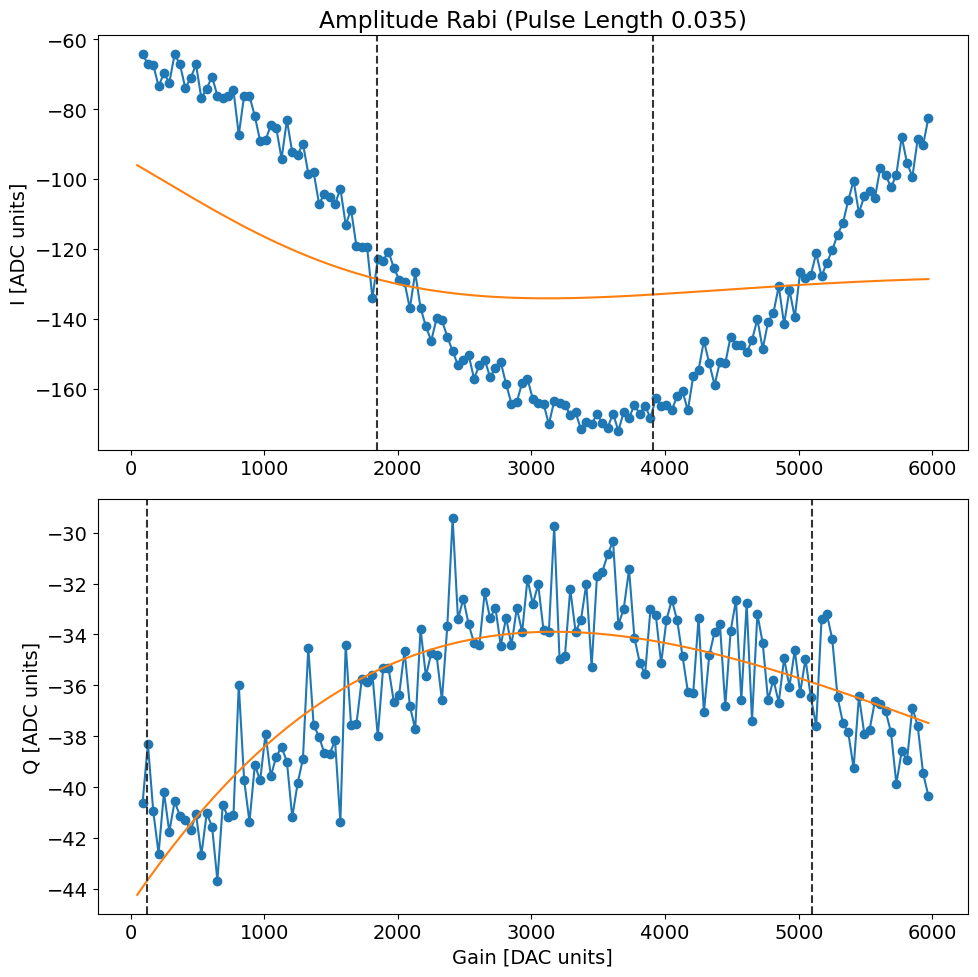

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-14_15-57-47_Amplitude_Rabi_ef.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-14.md
Updated qubit ef pi and hpi gaussian gain!
Amplitude Rabi done!
fge is  3571.672429380876
fef is  3428.421864394964


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00034_RamseyExperiment.h5
No echoes in the data
Current pi pulse frequency: 3428.421864394964
Fit frequency from I [MHz]: 0.2001072883064708 +/- 0.0006322220714839714
Suggested new pi pulse frequency from fit I [MHz]:
 	3428.4217571066574
 	3428.8219716832705
T2 Ramsey from fit I [us]: 21.46960955919643
Fit frequency from Q [MHz]: 0.20047747849310338 +/- 0.0007211852623075649
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3428.421386916471
 	3428.822341873457
T2 Ramsey from fit Q [us]: 20.32499967278692


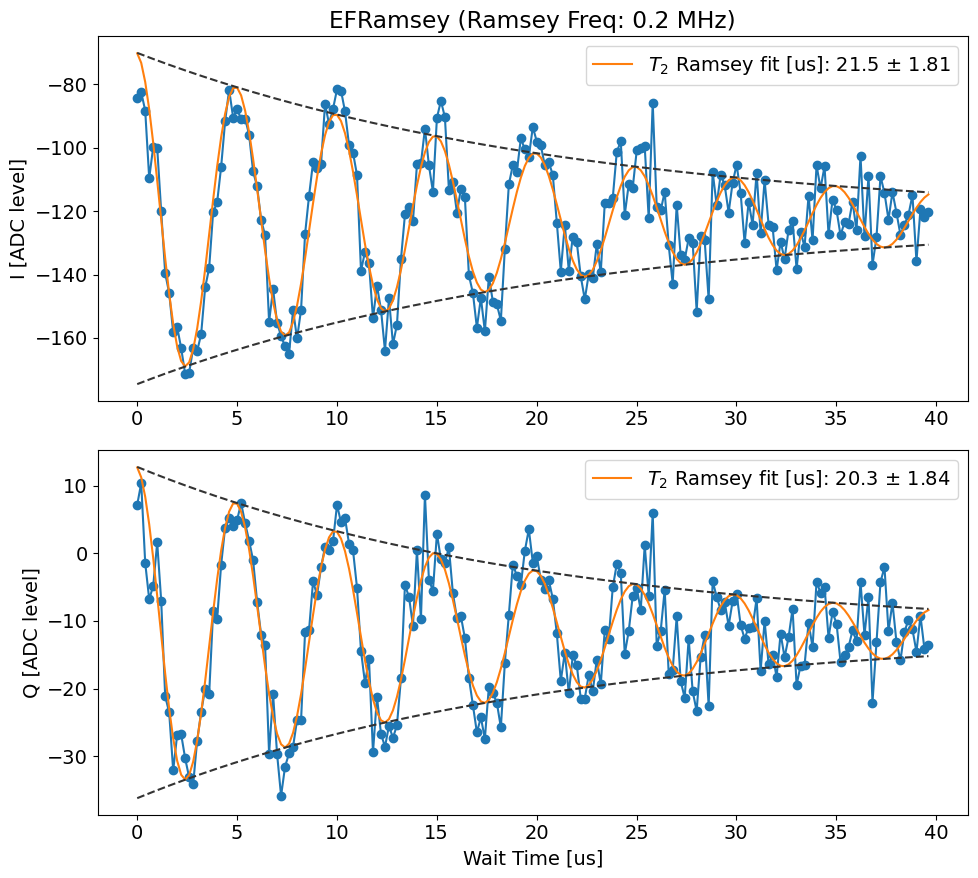

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-14_15-58-43_T2_ef_after_amp.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-14.md
Updated qubit ef frequency to: 3428.4217571066574
T2 Ramsey done!


In [ ]:
amprabi_ef = None
t2_ramsey_ef_after_amp = None
if expts_to_run['amplitude_ef']:
    amprabi_ef = do_amplitude_rabi_ef(config_thisrun, expt_path, config_path)
    amprabi_ef.analyze(fitparams=[np.max(amprabi_ef.data['amps']), 0.0001, np.pi, 10000,None, None])
    amprabi_ef.display(title_str = 'Amplitude Rabi_ef', save_fig=True)
    update_amplitude_rabi_ef(amprabi_ef, config_thisrun)
    print('Amplitude Rabi done!')

    # After this do another round of T2 to fine tune the qubit frequency
    t2_ramsey_ef_after_amp  = do_t2_ramsey_ef(config_thisrun, expt_path, config_path)
    t2_ramsey_ef_after_amp.analyze()
    t2_ramsey_ef_after_amp.display(title_str='T2_ef_after_amp')
    update_t2_ramsey_ef(t2_ramsey_ef_after_amp , config_thisrun)
    print('T2 Ramsey done!')

In [ ]:
# amprabi_ef.analyze(title_str = 'Amplitude Rabi_ef', save_fig=False, fitparams=[np.max(amprabi_ef.data['amps']), 0.0001, 90, None, None, None])
# amprabi_ef.display(title_str = 'Amplitude Rabi_ef', save_fig=False)
# Magic Params: [np.max(amprabi_ef.data['amps']), 0.00001, 90, None, None, None]

In [ ]:
# update_amplitude_rabi_ef(amprabi_ef, config_thisrun)
# print('Amplitude Rabi done!')

# # After this do another round of T2 to fine tune the qubit frequency
# t2_ramsey_ef_after_amp  = do_t2_ramsey_ef(config_thisrun, expt_path, config_path)
# t2_ramsey_ef_after_amp.analyze()
# t2_ramsey_ef_after_amp.display(title_str='T2_ef_after_amp')
# update_t2_ramsey_ef(t2_ramsey_ef_after_amp , config_thisrun)
# print('T2 Ramsey done!')

In [ ]:
# t2_ramsey_ef_after_amp.analyze(fitparams=[300, None, None, None, None, None])
# t2_ramsey_ef_after_amp.display(title_str='T2_ef_after_amp')
# update_t2_ramsey_ef(t2_ramsey_ef_after_amp , config_thisrun)

### T1

In [ ]:
def do_t1_ef(config_thisrun, expt_path, config_path):
    """Run the T1 experiment."""
    t1 = meas.single_qubit.t1.T1Experiment(
        soccfg=soc, path=expt_path, prefix='T1Experiment', config_file=config_path
    )

    t1.cfg = AttrDict(deepcopy(config_thisrun))

    t1.cfg.expt = {
        'start': 0,
        'step': 5,
        'expts': 100,
        'reps': 50,
        'rounds': 1,
        'qubit': 0,
        'qubit_ef': True,
        'normalize': False
    }

    t1.cfg.device.readout.relax_delay = [2500]  # Wait time between experiments [us]
    t1.go(analyze=True, display=True, progress=True, save=True)
    return t1


def update_t1_ef(t1, config_thisrun):
    """Update the configuration based on T1 experiment results."""
    config_thisrun.device.qubit.T1_ef = [t1.data['fit_avgq'][3]]
    print('Updated qubit T1!')


  0%|          | 0/5000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00002_T1Experiment.h5
Fit T1 avgi [us]: -111.22789379788887
Fit T1 avgq [us]: 144.16571854782674


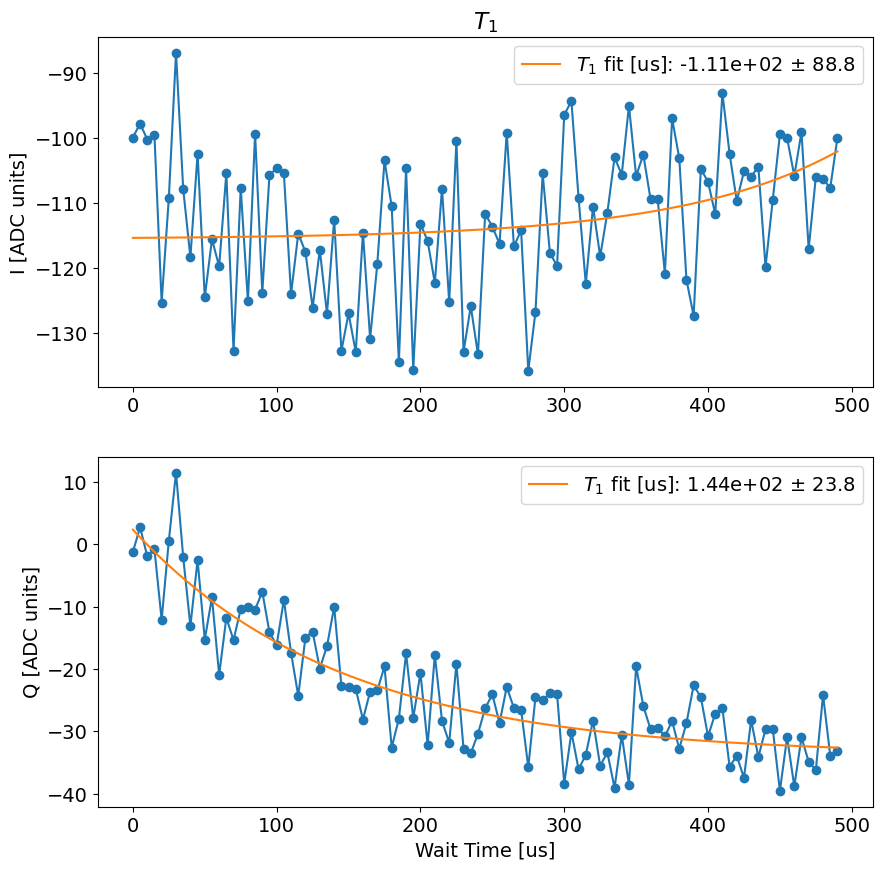

Fit T1 avgi [us]: -111.22789379788887
Fit T1 avgq [us]: 144.16571854782674


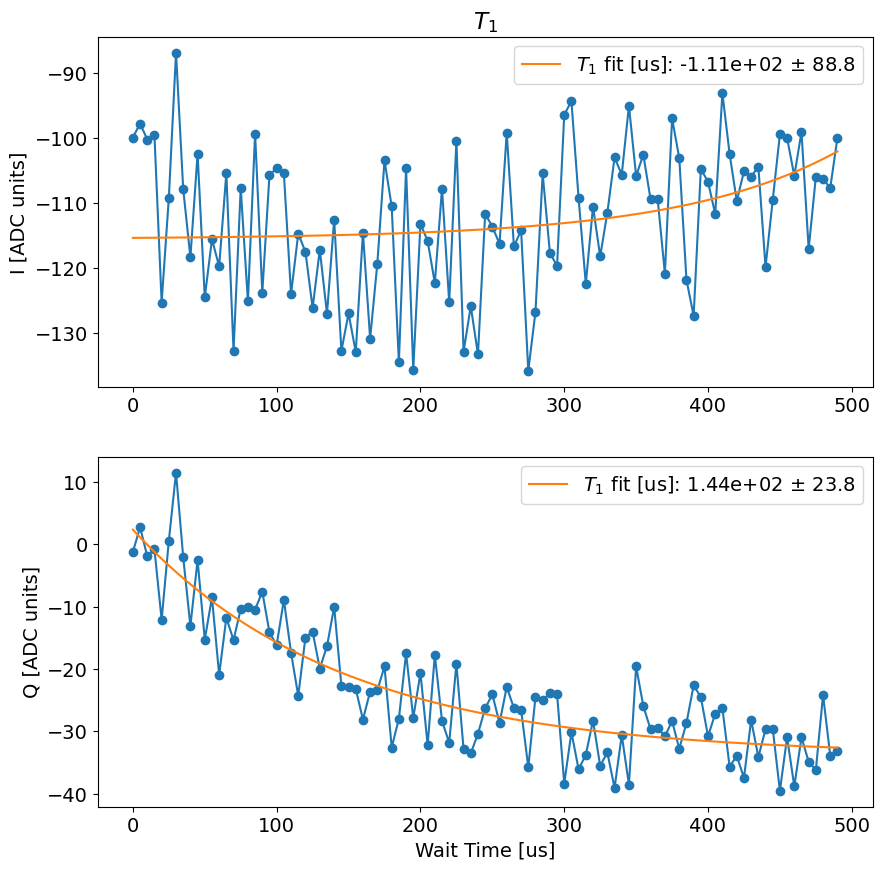

Updated qubit T1!
T1 done!


In [ ]:
t1_ef = None
if expts_to_run['t1_ef']:
    t1 = do_t1_ef(config_thisrun, expt_path, config_path)
    t1.analyze()
    t1.display()
    update_t1_ef(t1, config_thisrun)
    print('T1 done!')

# Manipulate

## Spectroscopy

In [72]:
def do_pulse_probe_f0g1(config_thisrun, ds_thisrun, man_mode_no = 1): 

    qspec = meas.single_qubit.pulse_probe_f0g1_spectroscopy.PulseProbeF0g1SpectroscopyExperiment(
        soccfg=soc, path=expt_path, prefix='PulseProbeF0g1SpectroscopyExperiment', config_file=config_path
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    qspec.cfg.expt = {
        'start': ds_thisrun.get_freq('M' + str(man_mode_no)) - 10,  # resonator frequency to be mixed up [MHz]
        'step': 0.1,  # min step ~1 MHz
        'expts': 200,  # Number of experiments stepping from start
        'reps': 100,  # Number of averages per point
        'rounds': 1,  # Number of start to finish sweeps to average over
        'length': 1,  # ef probe constant pulse length [us]
        'gain': 3000,  # f0g1 pulse gain
        'pulse_type': 'gaussian',
        'qubit_f': True,
        'qubits': [0],
        'prepulse': False,
        'pre_sweep_pulse': [[3569.4827896982997], [11161], [0], [0], [2], ['g'], [0.035]]
    }

    qspec.cfg.device.readout.relax_delay = [200] # Wait time between experiments [us]
    qspec.go(analyze=False, display=False, progress=True, save=True)
    return qspec

def analyze_and_display_pulse_probe_f0g1(qspec):
    from multimode_expts.fit_display_classes import Spectroscopy
    spec_analysis = Spectroscopy(
        qspec.data)
    spec_analysis.analyze(fit=True)
    spec_analysis.display()

def update_pulse_probe_f0g1(qspec, config_thisrun, man_mode_no = 1):
    ''' 
    Update the configuration based on f0g1 spectroscopy experiment results.
    man_mode_no: 1 for man1, 2 for man2
    '''
    ds_thisrun.update_freq('M' + str(man_mode_no),  qspec.data['fit_avgi'][2])
    print('Updated man f0g1 freq to :', ds_thisrun.get_freq('M1'))


In [ ]:
# expts_to_run['pulse_probe_f0g1'] = True

Running pulse probe f0g1 for mode 1


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00000_PulseProbeF0g1SpectroscopyExperiment.h5
Found peak in amps at [MHz] 2013.2138440840092, HWHM 0.4603863485010144
Found peak in I at [MHz] 2013.2448694543334, HWHM 0.4516953629129376
Found peak in Q at [MHz] 2013.2785313207637, HWHM 0.32098831777395204


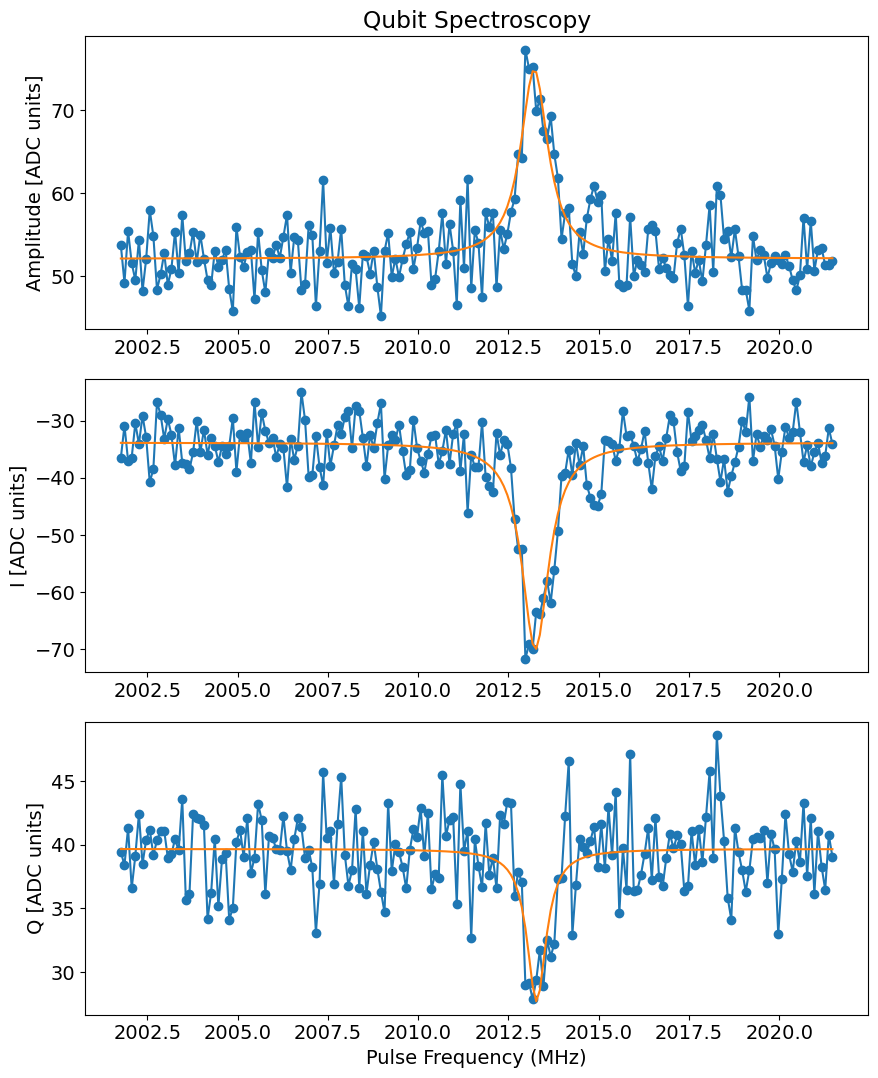

Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated man f0g1 freq to : 2013.2448694543334


In [73]:
man_specs =[None]* len(expts_to_run['man_modes'])

for i in range(len(expts_to_run['man_modes'])):

    if expts_to_run['pulse_probe_f0g1']:

        print('Running pulse probe f0g1 for mode', i+1)
        man_specs[i] = do_pulse_probe_f0g1(config_thisrun, ds_thisrun, man_mode_no = i+1)
        analyze_and_display_pulse_probe_f0g1(man_specs[i])
        update_pulse_probe_f0g1(man_specs[i], config_thisrun, man_mode_no=i+1)
        

## Find Frequency (Chevron)


In [ ]:
%matplotlib inline

In [91]:
def do_length_rabi_f0g1_sweep(config_thisrun, expt_path, config_path, freq_start, freq_stop, freq_step):
    """Run the Length Rabi General F0g1 Experiment Sweep."""
    # length_rabi = meas.single_qubit.length_rabi.LengthRabiGeneralF0g1ExperimentSweep(
    #     soccfg=soc, path=expt_path, prefix='LengthRabiGeneralF0g1ExperimentSweep', config_file=config_path
    # )
    from multimode_expts.sequential_experiment_classes import man_f0g1_class
    experiment_class = man_f0g1_class
    sweep_experiment_name = 'length_rabi_f0g1_sweep'
    class_for_exp = experiment_class(soccfg=soc, path=expt_path, prefix=sweep_experiment_name, config_file=config_path,
                                      exp_param_file=exp_param_file, config_thisrun=config_thisrun)

    # class_for_exp.yaml_cfg = AttrDict(deepcopy(config_thisrun))
    
    class_for_exp.loaded[sweep_experiment_name] = {
        'freq_start': freq_start,
        'freq_stop':  freq_stop,
        'freq_step': freq_step,
        'start': 5,
        'step': 0.02,
        'qubits': [0],
        'expts': 101,
        'reps': 100,
        'rounds': 1,
        'gain': 8000,
        'ramp_sigma': 0.005,
        'use_arb_waveform': False,
        'pi_ge_before': True,
        'pi_ef_before': True,
        'pi_ge_after': False,
        'normalize': False,
        'active_reset': True,
        'check_man_reset': [False, 0],
        'check_man_reset_pi': [],
        'prepulse': False,
        'pre_sweep_pulse': [],
        'err_amp_reps' : 0, # Number of error amp rounds
    } # actually this doesn't do anything, edit experiment.yml
    
 
    return eval('class_for_exp.run_sweep')( sweep_experiment_name = sweep_experiment_name)

def update_length_rabi_f0g1_sweep(expt_path, prefix, config_thisrun, man_mode_no = 1):
    """Update sweep data and analyze results."""
    temp_data, attrs, filename = prev_data(expt_path, prefix=prefix)
    print('File saved at :', filename)
    from multimode_expts.fit_display_classes import ChevronFitting
    from datetime import datetime
    
    chevron_analysis = ChevronFitting(
        frequencies=temp_data['freq_sweep'],
        time=temp_data['xpts'][0],
        response_matrix=temp_data['avgi'],
        config = config_thisrun
    )
    chevron_analysis.analyze()
    current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    chevron_analysis.display_results(save_fig=True,  title=f'M{man_mode_no}_{current_time}')

    #config_thisrun.device.manipulate.f0g1_freq[0] = chevron_analysis.results['frequency']
    ds_thisrun.update_freq('M' + str(man_mode_no), chevron_analysis.results['best_frequency_contrast'])
    print('Updated the frequency to:', chevron_analysis.results['best_frequency_contrast'])
    return chevron_analysis


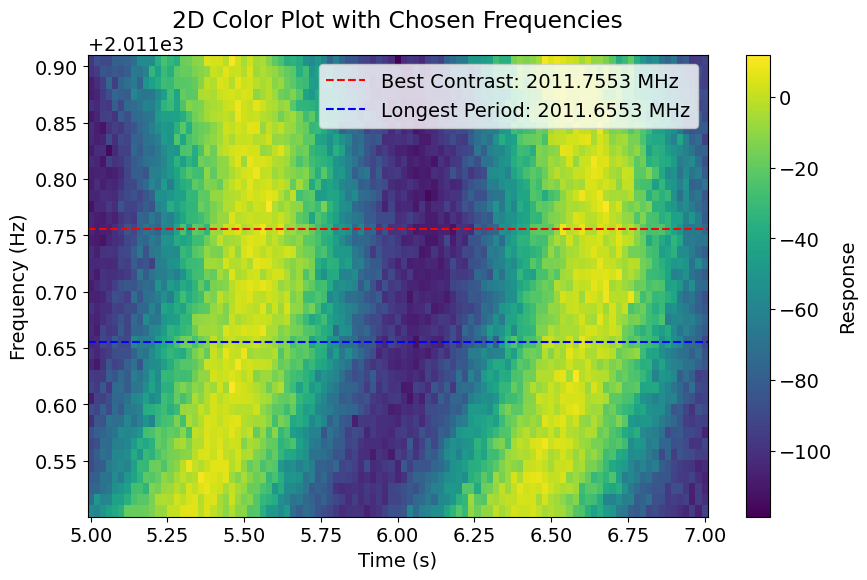

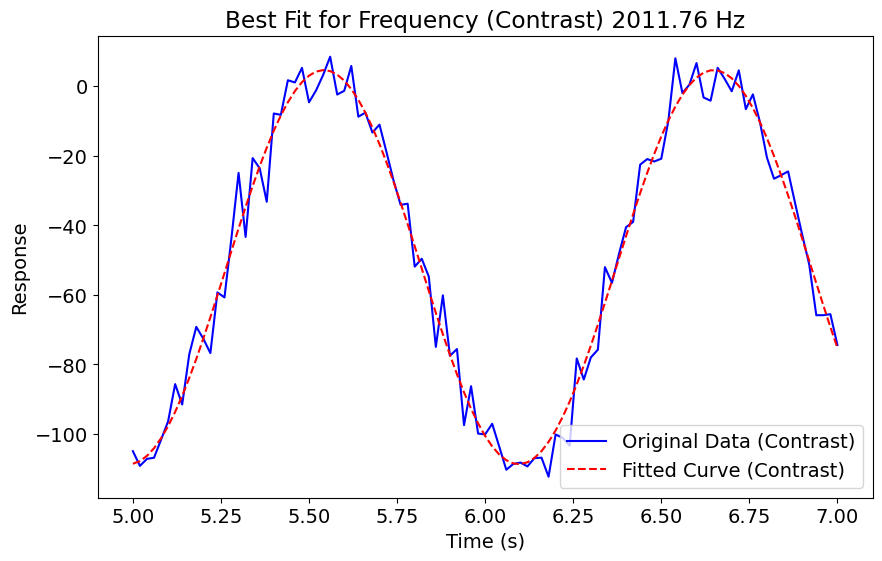

File saved at : H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00007_length_rabi_f0g1_sweep.h5
supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-15_18-12-58_M1_2025-08-15_18-12-58.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-15.md


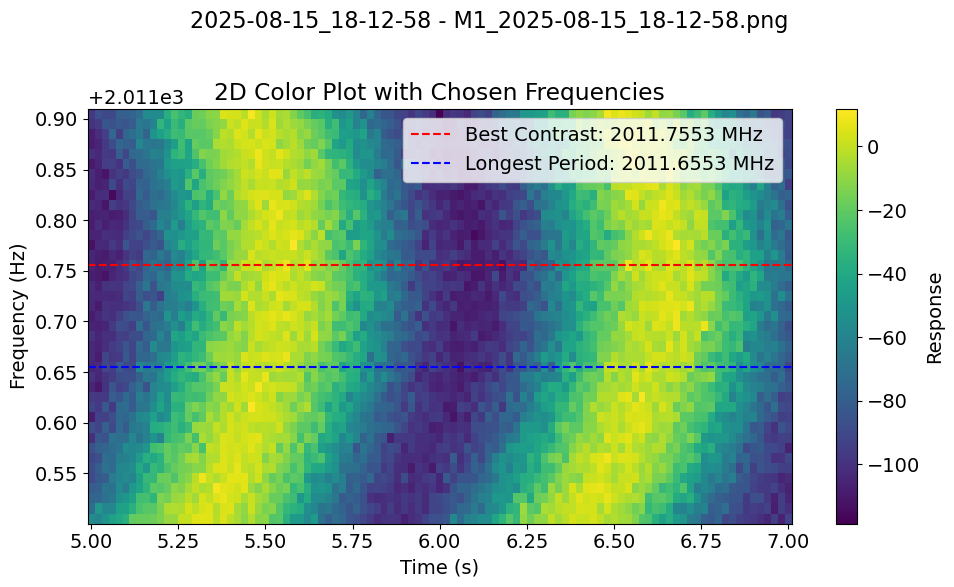

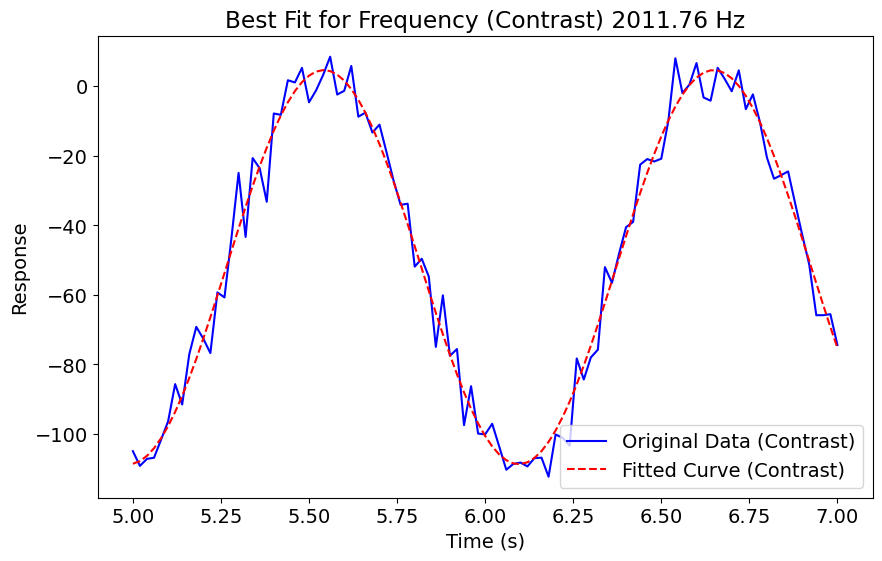

Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated the frequency to: 2011.7552999999998


In [92]:
man_chevrons_coarse = [None] * len(expts_to_run['man_modes'])
man_chevrons_fine = [None] * len(expts_to_run['man_modes'])
# man_sweeps = [None] * len(expts_to_run['man_modes'])

for i in range(len(expts_to_run['man_modes'])):
    if expts_to_run['length_rabi_sweep']:
        # print(f'Running coarse length rabi sweep for mode {i + 1}')
        # freq_start = ds_thisrun.get_freq('M' + str(i + 1)) - 2
        # freq_stop = ds_thisrun.get_freq('M' + str(i + 1)) + 2
        # freq_step = 0.3
        # man_chevrons_coarse[i] = do_length_rabi_f0g1_sweep(config_thisrun, expt_path, config_path, freq_start, freq_stop, freq_step)
        # update_length_rabi_f0g1_sweep(expt_path, 'length_rabi_f0g1_sweep', config_thisrun, man_mode_no=i + 1)

        print(f'Running fine length rabi sweep for mode {i + 1}')
        freq_start = ds_thisrun.get_freq('M' + str(i + 1)) - 0.2
        freq_stop = ds_thisrun.get_freq('M' + str(i + 1)) + 0.2
        freq_step = 0.01
        man_chevrons_fine[i] = do_length_rabi_f0g1_sweep(config_thisrun, expt_path, config_path, freq_start, freq_stop, freq_step)
        update_length_rabi_f0g1_sweep(expt_path, 'length_rabi_f0g1_sweep', config_thisrun, man_mode_no=i + 1)

In [93]:
ds_thisrun.update_freq('M1', 2011.70)

Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv


## Error amplification

In [94]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_calib = MM_dual_rail_base(config_thisrun)

sideband = 'f0-g1'
_sideband = sideband[0] + 'n' + '-' + sideband[3] + 'n+1'
i = int(sideband[1])
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=1, photon_no=i)
print(f"pre_sweep_pulse: {pre_sweep_pulse}")
pre_sweep_pulse.append(['multiphoton', 'g'+str(i)+'-e'+str(i), 'pi', 0])
pre_sweep_pulse.append(['multiphoton', 'e'+str(i)+'-f'+str(i), 'pi', 0])
# pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, multiphoton_cfg_thisrun).pulse.tolist()
pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, config_thisrun).pulse.tolist()
# print(f"pre_sweep_pulse: {pre_sweep_pulse}")

TypeError: __init__() missing 1 required positional argument: 'soccfg'

In [ ]:
def do_error_amplification(
    config_thisrun,
    expt_path,
    config_path,
    reps=100,
    rounds=1,
    qubit=0,
    n_pulses=10,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    relax_delay=2500, 
    start = 0,
    expts = 10,
    step = 100,
    parameter_to_test = 'gain',
    pulse_type=['qubit', 'ge', 'pi', 0],
):
    """
    Run the Histogram Prepulse Experiment with configurable parameters.
    """
        
    expt_cfg = {
        'reps': reps,
        'qubit': qubit,
        'qubits': [qubit],
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'start': start,
        'expts': expts,
        'step': step,
        'n_pulses': n_pulses,
        'pulse_type': pulse_type,
        'parameter_to_test': parameter_to_test,
        'rounds': rounds,

    }
    error_amp_exp = meas.single_qubit.error_amplification.ErrorAmplificationExperiment(
    soccfg=soc, path=expt_path,
      prefix='ErrorAmplificationExperiment', config_file=config_path)
    error_amp_exp.cfg = AttrDict(deepcopy(config_thisrun))
    error_amp_exp.cfg.expt = expt_cfg
    error_amp_exp.go(analyze=False, display=False, progress=True, save=True)
    return error_amp_exp

In [ ]:
expts = 20
# band = 0.75
band = 0.3
# config_thisrun.device.multiphoton['pi'][_sideband]['length'][0] = 0.5491206701698654
freq_start = config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] - band
# freq_start = 2011 - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')

err_amp_man_freq = do_error_amplification(
    config_thisrun=config_thisrun,
    expt_path=expt_path,
    config_path=config_file,
    reps=100,
    rounds=1,
    n_pulses = 7,
    expts=expts,
    start=freq_start,
    step=step,
    pulse_type=['multiphoton', sideband, 'pi', 0],
    parameter_to_test='frequency',
)

Frequency start: 2011.350206790994, Step: 0.03
{'start': 2, 'step': 0.1, 'qubits': [0], 'expts': 25, 'reps': 300, 'rounds': 1, 'gain': 8000, 'freq': 2011.7147366265876, 'use_arb_waveform': 0, 'pi_ge_before': 0, 'pi_ef_before': 0, 'pi_ge_after': 0, 'pi_ef_after': 0, 'normalize': 0, 'active_reset': 0, 'check_man_reset': [0, 0], 'swap_lossy': 0, 'check_man_reset_pi': [], 'prepulse': 1, 'pre_sweep_pulse': [[3579.4384683413878, 3428.2303438452373, 2011.4000000000008, 3571.9213048825372, 3423.7266366015674], [18962, 2767, 8000, 10566, 9159], [0, 0, 0.5452584298467464, 0, 0], [0, 0, 0, 0, 0], [2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035]], 'err_amp_reps': 0, 'length_placeholder': 4.4}


  0%|          | 0/6 [00:00<?, ?it/s]

post_pulse: [[3579.9600164369886, 3428.2303438452373], [18768, 2759], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.007, 0.035]]
post_pulse: [[3579.9600164369886, 3428.2303438452373], [18768, 2759], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.007, 0.035]]
post_pulse: [[3579.9600164369886, 3428.2303438452373], [18768, 2759], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.007, 0.035]]
post_pulse: [[3579.9600164369886, 3428.2303438452373], [18768, 2759], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.007, 0.035]]
post_pulse: [[3579.9600164369886, 3428.2303438452373], [18768, 2759], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.007, 0.035]]
post_pulse: [[3579.9600164369886, 3428.2303438452373], [18768, 2759], [0, 0], [0, 0], [2, 2], ['gauss', 'gauss'], [0.007, 0.035]]
Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00019_ErrorAmplificationExperiment.h5


fitparams [-0.0004677566153774779, 1.0004677566153775, 2011.680206790994, 0.05699999999999363]


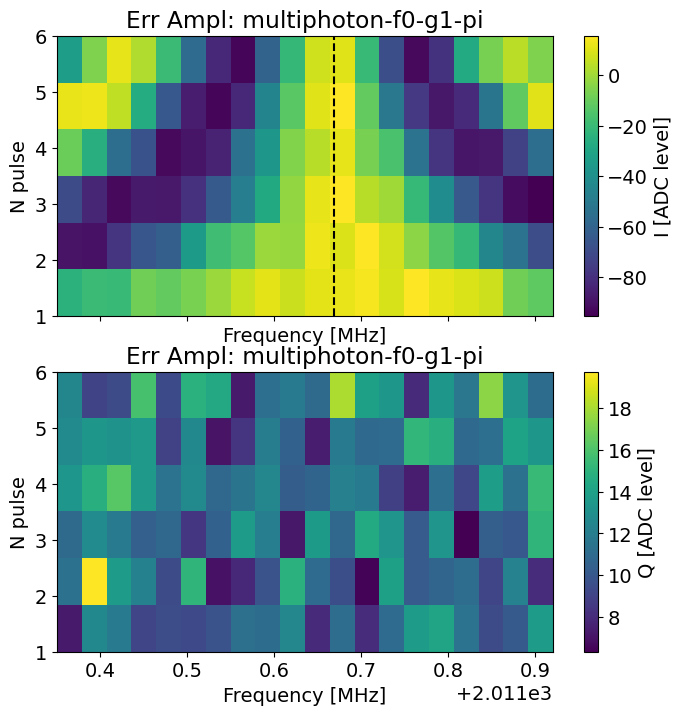

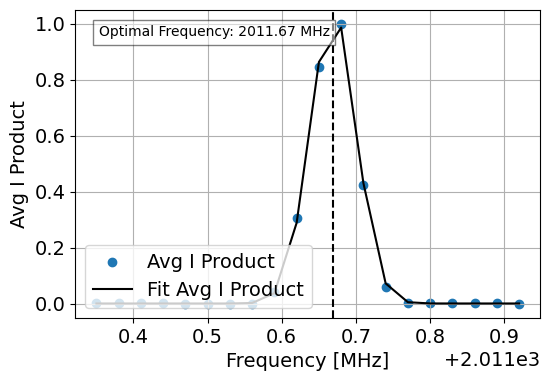

In [ ]:
err_amp_man_freq.analyze(state_fin='e')
err_amp_man_freq.display()

In [ ]:
print(f"Man {sideband} pi frequency before update:", config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])
config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] = err_amp_man_freq.data['fit_avgi'][2]
print(f"Man {sideband} pi frequency after update:", config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])

Man f0-g1 pi frequency before update: 2011.650206790994
Man f0-g1 pi frequency after update: 2011.6693654525284


In [ ]:
if i > 0:
    print("WARNING! No update will occur! The update in this cell was meant for the csv which does not have multiphoton params. To update the multiphoton params, please run the multiphoton calibration notebook instead.")
else:
    ds_thisrun.update_freq('M1', err_amp_man_freq.data['fit_avgi'][2])
    print("Updated the ds_thisrun frequency to:", ds_thisrun.get_freq('M1'))

Updated the ds_thisrun frequency to: 2011.6693654525284


## Length Rabi f0g1 (Update time)

In [95]:
def do_length_rabi_f0g1_general(config_thisrun, ds_thisrun, expt_path, config_path, man_mode_no = 1):
    """Run the Length Rabi General F0g1 Experiment."""
    length_rabi = meas.single_qubit.length_rabi_f0g1_general.LengthRabiGeneralF0g1Experiment(
        soccfg=soc, path=expt_path, prefix='LengthRabiGeneralF0g1Experiment', config_file=config_path
    )

    length_rabi.cfg = AttrDict(deepcopy(config_thisrun))

    length_rabi.cfg.expt = dict(
        start=soc.cycles2us(3),  # Pulse start length [us]
        step=0.05,  # Pulse step length [us]
        qubits=[0],
        expts=150,
        reps=100,
        rounds=1,
        # rep_start=0, # 0 means just 1 pi pulse, no error amp
        # rep_end=19, # will do 1+2*rep_end rounds of pi pulses max
        gain=8000,  # Qubit gain [DAC units]
        freq= ds_thisrun.get_freq('M' + str(man_mode_no)),  # Frequency [MHz]
        use_arb_waveform=False,
        pi_ge_before=True,
        pi_ef_before=True,
        pi_ge_after=True,
        # pi_ef_after=True,
        normalize=False,
        active_reset=True,
        man_reset=True,
        stor_reset=True,
        check_man_reset=[False, 0],
        swap_lossy=False,
        check_man_reset_pi=[],
        prepulse=False,
        pre_sweep_pulse=[],
        err_amp_reps = 0, # Number of error amp rounds
    )

    length_rabi.cfg.device.readout.relax_delay = [20]  # Wait time between experiments [us]
    length_rabi.go(analyze=False, display=False, progress=True, save=True)

    from multimode_expts.fit_display_classes import LengthRabiFitting
    # Analyze the data
    length_rabi_analysis = LengthRabiFitting(length_rabi.data, config = length_rabi.cfg)
    length_rabi_analysis.analyze()
    length_rabi_analysis.display(title_str='Length Rabi General F0g1')


    return length_rabi_analysis


def update_length_rabi_f0g1_combined(length_rabi, config_thisrun, ds, man_mode_no = 1):
    """Update the configuration and dataset based on Length Rabi General F0g1 experiment results."""

    # Update dataset
    pi_length = length_rabi.results['pi_length']
    pi2_length = length_rabi.results['pi2_length']
    gain = length_rabi.cfg.expt['gain']
    freq = length_rabi.cfg.expt['freq']
    ds.update_all('M' + str(man_mode_no), freq, np.nan, pi_length, pi2_length, gain)
    print(f'Updated dataset: pi_length={pi_length}, pi2_length={pi2_length}, gain={gain}')



Running length rabi for mode 1


  0%|          | 0/150 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00000_LengthRabiGeneralF0g1Experiment.h5
p1: 0.9068320703547993
p2: 92.61821538091874
Pi length: 0.5433499714061367
Pi/2 length: 0.26766497065160105
p1: 2.828787064170383
p2: -143.62841235163205
Pi length: 0.22941557542727023
Pi/2 length: 0.14103847445473056


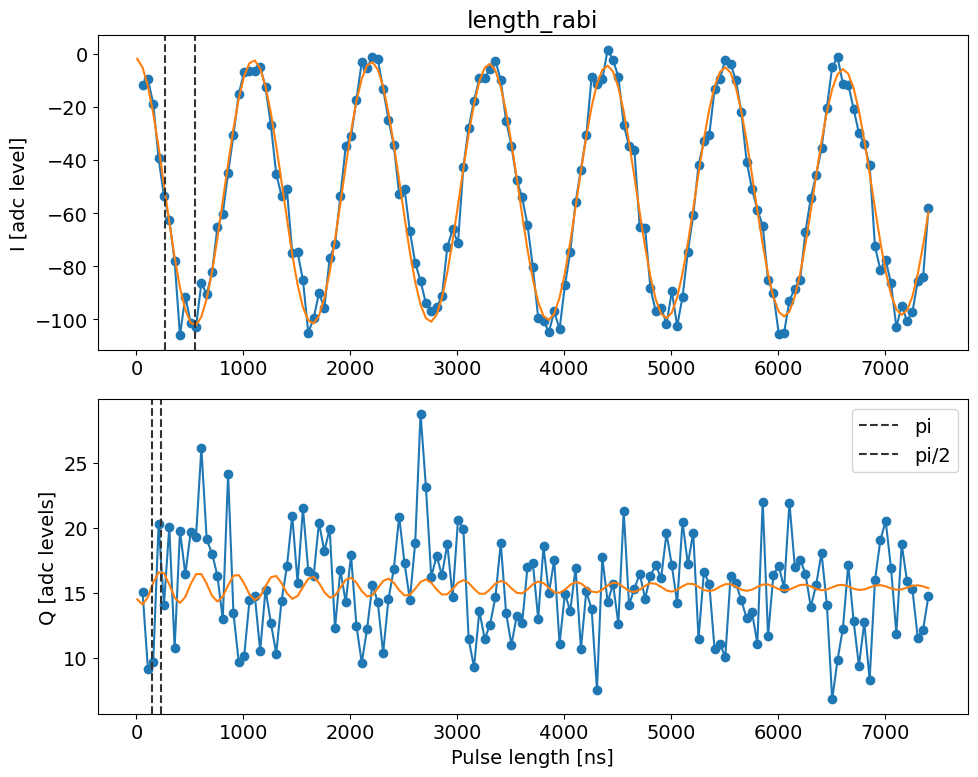

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-15_21-01-06_Length_Rabi_General_F0g1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-15.md
Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated dataset: pi_length=0.5433499714061367, pi2_length=0.26766497065160105, gain=8000


In [96]:
len_rabis_mans = [None]* len(expts_to_run['man_modes'])
for i in range(len(expts_to_run['man_modes'])):
    if expts_to_run['length_rabi'] or expts_to_run['length_rabi_sweep']:
        print('Running length rabi for mode', i+1)
        len_rabis_mans[i] = do_length_rabi_f0g1_general(config_thisrun, ds_thisrun, expt_path, config_path, man_mode_no= i+1)
        update_length_rabi_f0g1_combined(len_rabis_mans[i], config_thisrun, ds_thisrun, man_mode_no= i+1)

In [ ]:
# len_rabis_mans[0].active_reset = True
# len_rabis_mans[0].analyze()
# len_rabis_mans[0].display(title_str='Length Rabi General F0g1')

In [ ]:
# idata = len_rabis_mans[0].data['idata']
# idata = idata.reshape((len(idata.flatten())//4,4))

# qdata = len_rabis_mans[0].data['qdata']
# qdata = qdata.reshape((len(qdata.flatten())//4,4))

# fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(8,8))
# for kk in range(4):
#     axs[kk,0].hist(idata[:,kk], bins=100)
#     axs[kk,1].hist(qdata[:,kk], bins=100)
# None

### Quick and dirty error amplification

Very slightly modified length rabi f0g1 general (see git)

In [ ]:
def length_rabi_f0g1_err_amp(config_thisrun, ds_thisrun, expt_path, config_path, man_mode_no = 1):
    """Run the Length Rabi General F0g1 repeatedly to amplify error."""

    expt_cfg = dict(
        start=ds_thisrun.get_pi('M1')-soc.cycles2us(1)*50,  # Pulse start length [us]
        step=soc.cycles2us(1),  # Pulse step length [us]
        qubits=[0],
        expts=100,
        reps=200,
        rounds=1,
        rep_start=0, # 0 means just 1 pi pulse, no error amp
        rep_end=19, # will do 1+2*rep_end rounds of pi pulses max
        gain=15000,  # Qubit gain [DAC units]
        freq= ds_thisrun.get_freq('M' + str(man_mode_no)),  # Frequency [MHz]
        use_arb_waveform=False,
        pi_ge_before=True,
        pi_ef_before=True,
        pi_ef_after=True,
        normalize=False,
        active_reset=False,
        check_man_reset=[False, 0],
        swap_lossy=False,
        check_man_reset_pi=[],
        prepulse=False,
        pre_sweep_pulse=[]
    )

    for err_amp_reps in tqdm(range(expt_cfg['rep_start'], expt_cfg['rep_end'] + 1)):
        length_rabi = meas.single_qubit.length_rabi_f0g1_general.LengthRabiGeneralF0g1Experiment(
            soccfg=soc, path=expt_path, prefix='LengthRabiGeneralF0g1Experiment', config_file=config_path
        )

        length_rabi.cfg = AttrDict(deepcopy(config_thisrun))

        expt_cfg['err_amp_reps'] = err_amp_reps

        length_rabi.cfg.expt = expt_cfg

        length_rabi.cfg.device.readout.relax_delay = [2500]  # Wait time between experiments [us]
        length_rabi.go(analyze=False, display=False, progress=False, save=True)
    return length_rabi

In [ ]:
# length_rabi_f0g1_err_amp(config_thisrun, ds_thisrun, expt_path, config_path, man_mode_no=1)

In [ ]:
# lines = []
# ypts = []
# for prefix_num in range(43,63):
#     fname = f'{prefix_num:05d}_LengthRabiGeneralF0g1Experiment.h5'
#     temp_data, attrs, filename = prev_data(expt_path, fname)
#     ypts.append(attrs['config']['expt']['err_amp_reps'])
#     lines.append(temp_data['avgi'])
    
# xpts = temp_data['xpts']
# ypts = np.array(ypts)
# lines = np.array(lines)

# import matplotlib.pyplot as plt


# plt.figure(figsize=(8, 6))
# plt.pcolormesh(xpts, ypts, lines, shading='auto', cmap='viridis')
# # add vertical line at dsthisrun.get_pi('M1')
# plt.axvline(x=ds_thisrun.get_pi('M1'), color='r', linestyle='--', label='Old calib Pi Pulse Length')

# # add vertical line where the new calib pi pulse length is
# lines_processed = np.abs(np.prod((lines-lines.mean())/(np.max(lines)-lines.mean()), axis=0))
# xmax = np.argmax(lines_processed)
                          
# plt.axvline(x=xpts[xmax], color='g', linestyle='--', label='New calib Pi Pulse Length')
# # in legend mention the difference between the two
# diff = xpts[xmax] - ds_thisrun.get_pi('M1')
# plt.legend(title=f'ΔPi = {diff:.5f} us')
# plt.xlabel('Pulse Length [us]')
# plt.ylabel('Error Amplification Reps')
# plt.title('Length Rabi Error Amplification')
# plt.colorbar(label='Signal (avgi)')
# plt.show()


In [ ]:
# lines_processed = np.abs(np.prod((lines-lines.mean())/(np.max(lines)-lines.mean()), axis=0))
# xmax = np.argmax(lines_processed)
                          
# plt.plot(lines_processed, marker='o')
# plt.axvline(x=xmax, color='r', linestyle='--')


### and amplitude

In [ ]:
def amp_rabi_f0g1_err_amp(config_thisrun, ds_thisrun, expt_path, config_path, man_mode_no = 1):
    """Run the Length Rabi General F0g1 repeatedly to amplify error."""

    expt_cfg = dict(
        start=ds_thisrun.get_gain(f'M{man_mode_no}')-50*50,  # Pulse start length [dac unit]
        step=50,  # Pulse step length [dac unit]
        qubits=[0],
        expts=100,
        reps=200,
        rounds=1,
        rep_start=0,
        rep_end=19,
        # gain=15000,  # Qubit gain [DAC units]
        ramp_sigma=0.005,  # Ramp sigma [us]
        freq= ds_thisrun.get_freq('M' + str(man_mode_no)),  # Frequency [MHz]
        length= ds_thisrun.get_pi(f'M{man_mode_no}'),
        use_arb_waveform=False,
        pi_ge_before=True,
        pi_ef_before=True,
        pi_ef_after=True,
        normalize=False,
        active_reset=False,
        check_man_reset=[False, 0],
        swap_lossy=False,
        check_man_reset_pi=[],
        prepulse=False,
        pre_sweep_pulse=[]
    )

    for err_amp_reps in tqdm(range(expt_cfg['rep_start'], expt_cfg['rep_end'] + 1)):
        amp_rabi = meas.single_qubit.amplitude_rabi_f0g1_general.AmplitudeRabiGeneralF0g1Experiment(
            soccfg=soc, path=expt_path, prefix='AmplitudeRabiGeneralF0g1Experiment', config_file=config_path
        )

        amp_rabi.cfg = AttrDict(deepcopy(config_thisrun))

        expt_cfg['err_amp_reps'] = err_amp_reps

        amp_rabi.cfg.expt = expt_cfg

        amp_rabi.cfg.device.readout.relax_delay = [2500]  # Wait time between experiments [us]
        amp_rabi.go(analyze=False, display=False, progress=False, save=True)
    return amp_rabi

In [ ]:
# amp_rabi_f0g1_err_amp(config_thisrun, ds_thisrun, expt_path, config_path, man_mode_no=1)
    # 

In [ ]:
# lines = []
# ypts = []
# for prefix_num in range(15,35):
#     fname = f'{prefix_num:05d}_AmplitudeRabiGeneralF0g1Experiment.h5'
#     temp_data, attrs, filename = prev_data(expt_path, fname)
#     lines.append(temp_data['avgi'])
#     ypts.append(attrs['config']['expt']['err_amp_reps'])
# xpts = temp_data['xpts']

# lines = np.array(lines)
# ypts = np.array(ypts)

# plt.figure(figsize=(8, 6))
# plt.pcolormesh(xpts, ypts, lines, shading='auto', cmap='viridis')
# plt.axvline(x=ds_thisrun.get_gain('M1'), color='r', linestyle='--', label='Old calib Gain')
# plt.xlabel('Pulse Length [us]')
# plt.ylabel('Error Amplification Reps')
# plt.title('Amplitude Rabi Error Amplification')
# plt.colorbar(label='Signal (avgi)')
# plt.legend()
# plt.show()

In [ ]:
# lines_processed = np.abs(np.prod((lines-lines.mean())/(np.max(lines)-lines.mean()), axis=0))
# xmax = np.argmax(lines_processed)
                          
# plt.plot(lines_processed, marker='o')
# plt.axvline(x=xmax, color='r', linestyle='--')

## Chi between qubit and Manipulate 

### ge

In [ ]:
from MM_dual_rail_base import MM_dual_rail_base
import numpy as np

# the do function contains 2 calls to ramsey, one with no prepulse and one with prepulse 
# that initializes manipulation mode to 1 state
# do_t2_ramsey_ge is already defined in previous cells and can be used directly

# Add active_reset, relax_delay, expts as arguments and pass them to do_t2_ramsey_ge
def do_chi(config_thisrun, expt_path, config_path, prepulse=None, standard_ramsey=True,
           man_mode_no=1, active_reset=False, relax_delay=2500, expts=100):
    """
    Run two Ramsey experiments: one standard, one with a prepulse that initializes manipulation mode 1.
    Returns both experiment objects.
    """
    # Standard Ramsey (no prepulse)
    if standard_ramsey:
        t2ramsey_no_prepulse = do_t2_ramsey_ge(
            config_thisrun, expt_path, config_path,
            pre_sweep_pulse=None, post_sweep_pulse=None,
            step_size=0.1,
            active_reset=active_reset,
            relax_delay=relax_delay,
            expts=expts
        )
    else: 
        t2ramsey_no_prepulse = None

    # Ramsey with prepulse (initialize manipulation mode 1)
    if prepulse is None:
        mm_base_dummy = MM_dual_rail_base(config_thisrun)
        prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
        prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()

    t2ramsey_with_prepulse = do_t2_ramsey_ge(
        config_thisrun, expt_path, config_path,
        pre_sweep_pulse=prepulse, post_sweep_pulse=None,
        step_size=0.1,
        active_reset=active_reset,
        relax_delay=relax_delay,
        expts=expts
    )

    return t2ramsey_no_prepulse, t2ramsey_with_prepulse


def update_chi(t2_ramsey_original, t2_ramsey_prepulse, config_thisrun, man_mode_no=1):
    """
    Update config_thisrun.device.qubit.chi for the given manipulation mode.
    """
    f_without_prepulse = t2_ramsey_original.data['f_adjust_ramsey_avgi'][0]
    f_with_prepulse = t2_ramsey_prepulse.data['f_adjust_ramsey_avgi'][0]
    chi = f_with_prepulse - f_without_prepulse
    print('Chi:', chi)
    config_thisrun.device.manipulate.chi_ge[man_mode_no - 1] = chi
    config_thisrun.device.manipulate.revival_time[man_mode_no-1] = np.abs(np.pi/(2 * np.pi * chi))
    print('Delay time (mus):', config_thisrun.device.manipulate.revival_time[man_mode_no-1] )


fge is  3571.672429380876
fef is  3428.4217571066574


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00035_RamseyExperiment.h5
fge is  3571.672429380876
fef is  3428.4217571066574


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00036_RamseyExperiment.h5
No echoes in the data
Attempted to init fitparam 4 to -121.50712766190038, which is out of bounds -43.46847402597403 to -25.022651515151516. Instead init to -34.24556277056277
Current pi pulse frequency: 3571.672429380876
Fit frequency from I [MHz]: 0.19717263684380454 +/- 0.0016096325024170105
Suggested new pi pulse frequency from fit I [MHz]:
 	3571.675256744032
 	3572.0696020177197
T2 Ramsey from fit I [us]: 12.912810980504725
Fit frequency from Q [MHz]: 0.18709903564293304 +/- 0.006750592419585338
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3571.685330345233
 	3572.0595284165192
T2 Ramsey from fit Q [us]: 4.095693077556471


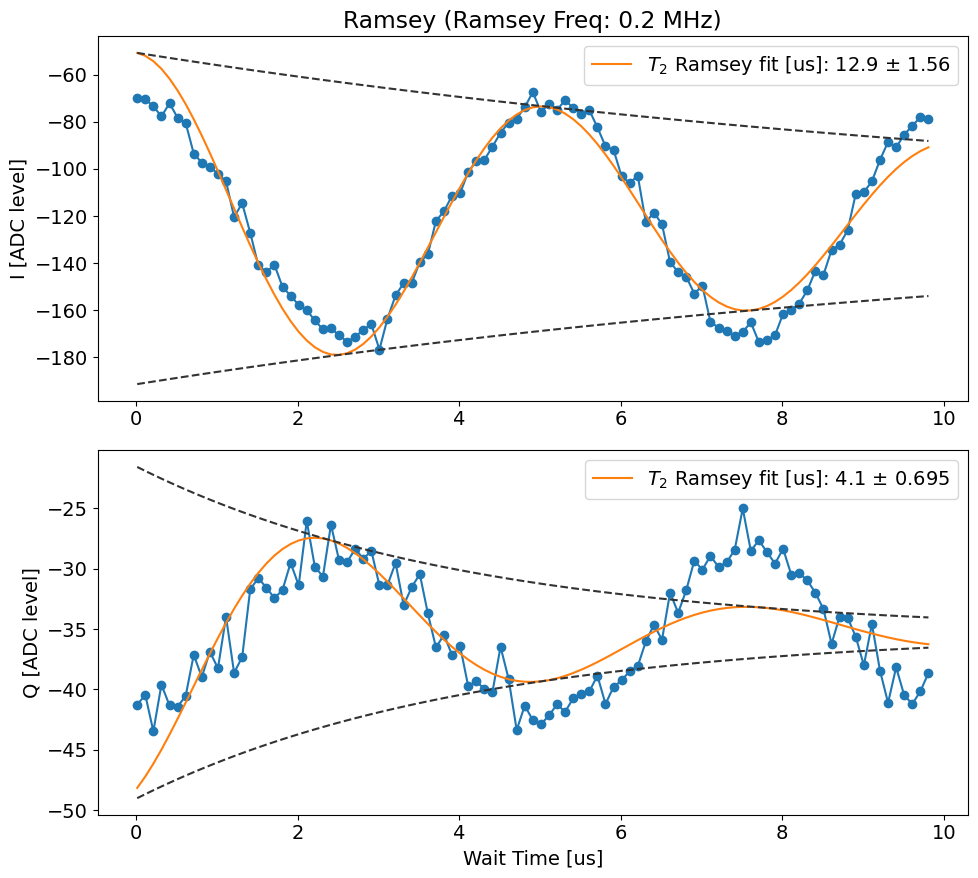

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-14_18-04-39_Ramsey.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-14.md
No echoes in the data
Attempted to init fitparam 4 to -118.19984170711446, which is out of bounds -40.87083333333334 to -22.629512987012983. Instead init to -31.750173160173162
Current pi pulse frequency: 3571.672429380876
Fit frequency from I [MHz]: 0.473373183834752 +/- 0.0015014992079841836
Suggested new pi pulse frequency from fit I [MHz]:
 	3571.3990561970413
 	3572.345802564711
T2 Ramsey from fit I [us]: 12.00460837185964
Fit frequency from Q [MHz]: 0.47140631781225784 +/- 0.0070547334187626215
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3571.401023063064
 	3572.3438356986885
T2 Ramsey from fit Q [us]: 3.887297132178055


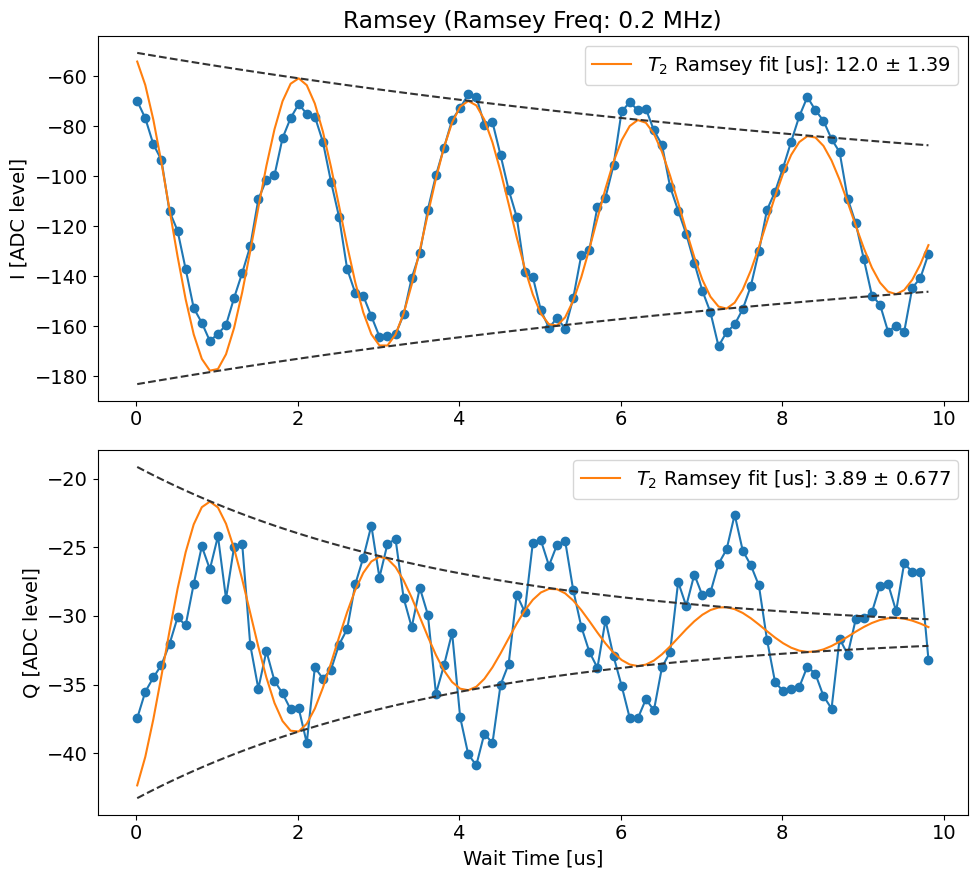

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-14_18-04-40_Ramsey.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-14.md
Chi: -0.2762005469909475
Delay time (mus): 1.8102788189495786
Only doing it for mode 1


In [ ]:
t2_ramsey_original, t2_ramsey_prepulse = None, None
# Run the chi experiments/__pycache__/
if expts_to_run['chi_ge']:
    t2_ramsey_original, t2_ramsey_prepulse = do_chi(config_thisrun, expt_path, config_path, standard_ramsey=True)
    # analyze and display the results
    t2_ramsey_original.analyze(fitparams=[300, None, None, None, None, None])
    t2_ramsey_original.display()
    t2_ramsey_prepulse.analyze(fitparams=[300, None, None, None, None, None])
    t2_ramsey_prepulse.display() 
    # update the config_thisrun with the chi value
    update_chi(t2_ramsey_original, t2_ramsey_prepulse, config_thisrun, man_mode_no=1)
    print('Only doing it for mode 1')

In [ ]:
# config_thisrun.device.manipulate.revival_time[0] = np.pi/(2 * np.pi * config_thisrun.device.manipulate.chi[0])

### ef

In [ ]:
from MM_dual_rail_base import MM_dual_rail_base

# the do function contains 2 calls to ramsey, one with no prepulse and one with prepulse 
# that initializes manipulation mode to 1 state
def do_chi_f(config_thisrun, expt_path, config_path, 
           man_mode_no=1):
    """
    Run two Ramsey experiments: one standard, one with a prepulse that initializes manipulation mode 1.
    Returns both experiment objects.
    """

    
    mm_base_dummy = MM_dual_rail_base(config_thisrun)
    prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
    # Add qubit ge prepulse and postpulse for ef (ge init)
    qubit_ge_prepulse = [['qubit', 'ge', 'pi', 0]]
    prep_man_pi_prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()
    prepulse =  mm_base_dummy.get_prepulse_creator(prep_man_pi + qubit_ge_prepulse ).pulse.tolist() 
    postpulse  = mm_base_dummy.get_prepulse_creator(qubit_ge_prepulse).pulse.tolist()

    # Add chi to frequency of qubit ge 
    # prepulse[0][-1] += config_thisrun.device.manipulate.chi[man_mode_no - 1]
    # postpulse[0][-1] += config_thisrun.device.manipulate.chi[man_mode_no - 1]

    # Do an ef and ge ramsey with this prepulse 
    # Run ge Ramsey 
    
    
    t2ramsey_no_prepulse_ge = do_t2_ramsey_ge(config_thisrun,
        expt_path,
        config_path,
        step_size=0.1,
        pre_sweep_pulse=prep_man_pi_prepulse,
        post_sweep_pulse=None)
    # Run ef Ramsey with prepulse and postpulse
    t2ramsey_with_prepulse_ef = do_t2_ramsey_ef(
        config_thisrun,
        expt_path,
        config_path,
        pre_sweep_pulse=prepulse,
        post_sweep_pulse=postpulse,
        step_size=0.1,
        ef_init=False  # Do not initialize ef, we are already in ef state
    )
    

    return t2ramsey_no_prepulse_ge, t2ramsey_with_prepulse_ef

def update_chi_ef(t2_standard_ramsey, t2_prepulsed_ramsey, config_thisrun, man_mode_no=1):
    """
    Update config_thisrun.device.qubit.chi for the given manipulation mode.
    """
    f_with_prepulse = t2_prepulsed_ramsey.data['f_adjust_ramsey_avgi'][0]
    f_without_prepulse = t2_standard_ramsey.data['f_adjust_ramsey_avgi'][0]
    chi_ef = f_with_prepulse - f_without_prepulse
    print('Chi:', chi_ef)
    config_thisrun.device.manipulate.chi_ef[man_mode_no - 1] = chi_ef


fge is  3571.672429380876
fef is  3428.4217571066574


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00037_RamseyExperiment.h5
No echoes in the data
Attempted to init fitparam 4 to -115.72076529835324, which is out of bounds -27.951125541125542 to 22.03556277056277. Instead init to -2.957781385281386
Current pi pulse frequency: 3428.4217571066574
Fit frequency from I [MHz]: 0.1998989352763419 +/- 0.00045958450506130015
Suggested new pi pulse frequency from fit I [MHz]:
 	3428.4218581713812
 	3428.8216560419337
T2 Ramsey from fit I [us]: 24.412555921994706
Fit frequency from Q [MHz]: 0.20017258236808455 +/- 0.0005909657668927491
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3428.4215845242893
 	3428.8219296890256
T2 Ramsey from fit Q [us]: 23.66948553668529


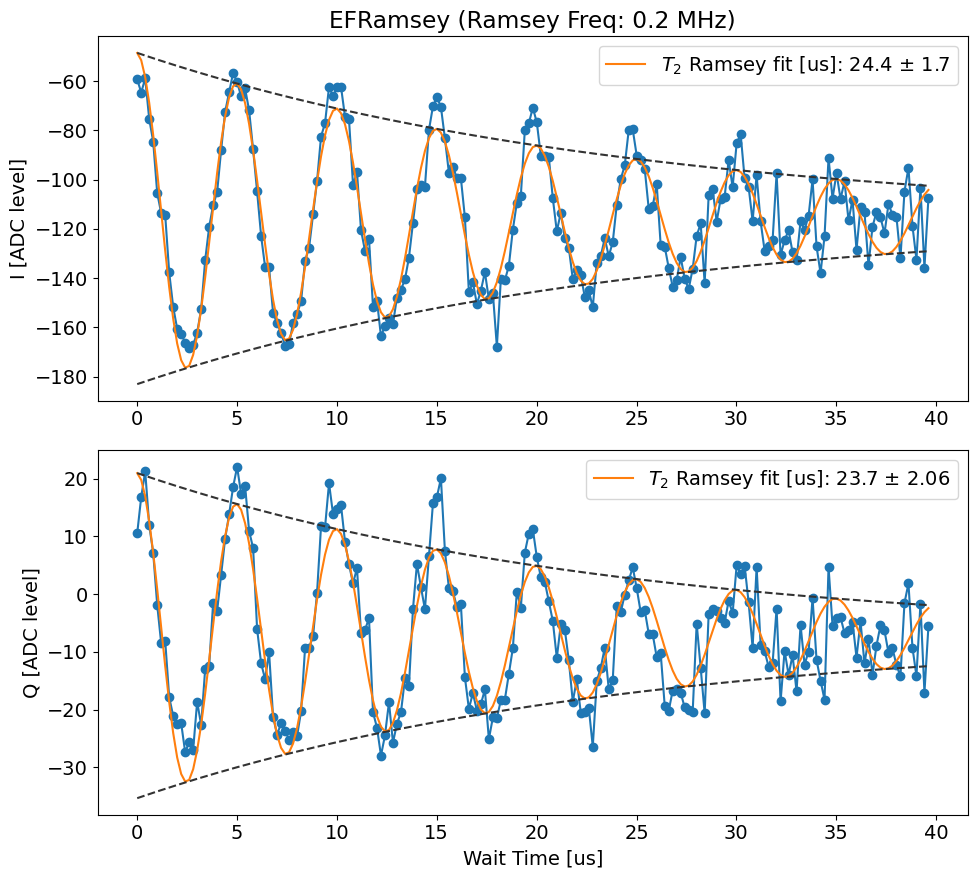

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-14_18-06-15_T2_ef_standard_for_chief.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-14.md
fge is  3571.3962288338853
fef is  3428.4217571066574


  0%|          | 0/40000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00038_RamseyExperiment.h5
fge is  3571.3962288338853
fef is  3428.4217571066574


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00039_RamseyExperiment.h5
No echoes in the data
Attempted to init fitparam 4 to -112.98603511929156, which is out of bounds -40.641471403376165 to -21.668304358780546. Instead init to -31.154887881078356
Current pi pulse frequency: 3571.3962288338853
Fit frequency from I [MHz]: 0.09482465139925253 +/- 0.01951139350684378
Suggested new pi pulse frequency from fit I [MHz]:
 	3571.501404182486
 	3571.6910534852846
T2 Ramsey from fit I [us]: 5.910000000000006
Fit frequency from Q [MHz]: 0.21076478962755324 +/- 0.002810867993431379
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3571.385464044258
 	3571.806993623513
T2 Ramsey from fit Q [us]: 7.706588501740818


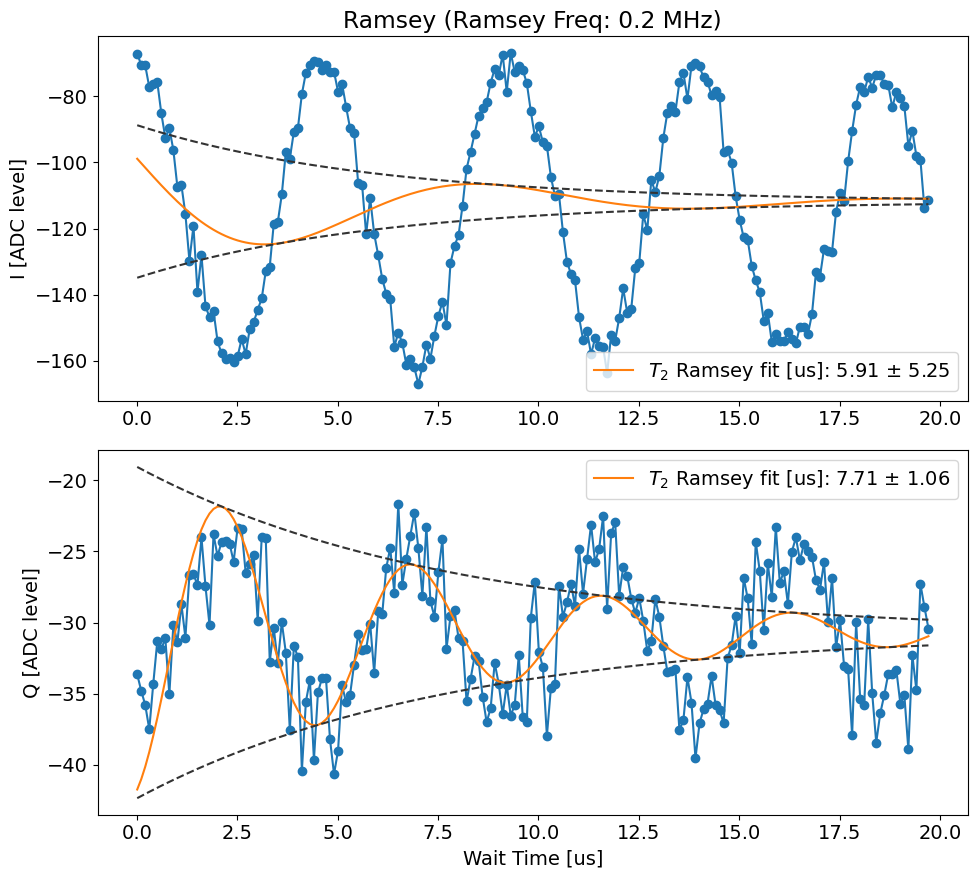

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-14_18-07-29_T2_ge_for_chief_tocheck_this_is_correctly_at_ramsey_freq.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-14.md
No echoes in the data
Attempted to init fitparam 4 to -114.91159781591942, which is out of bounds -27.479545454545452 to 20.421536796536795. Instead init to -3.5290043290043283
Current pi pulse frequency: 3428.4217571066574
Fit frequency from I [MHz]: 0.4493802210062947 +/- 0.0005514315223075756
Suggested new pi pulse frequency from fit I [MHz]:
 	3428.172376885651
 	3429.0711373276636
T2 Ramsey from fit I [us]: 22.077376625998824
Fit frequency from Q [MHz]: 0.44816396910807216 +/- 0.0010265684852902215
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3428.1735931375492
 	3429.0699210757657
T2 Ramsey from fit Q [us]: 12.476154081071563


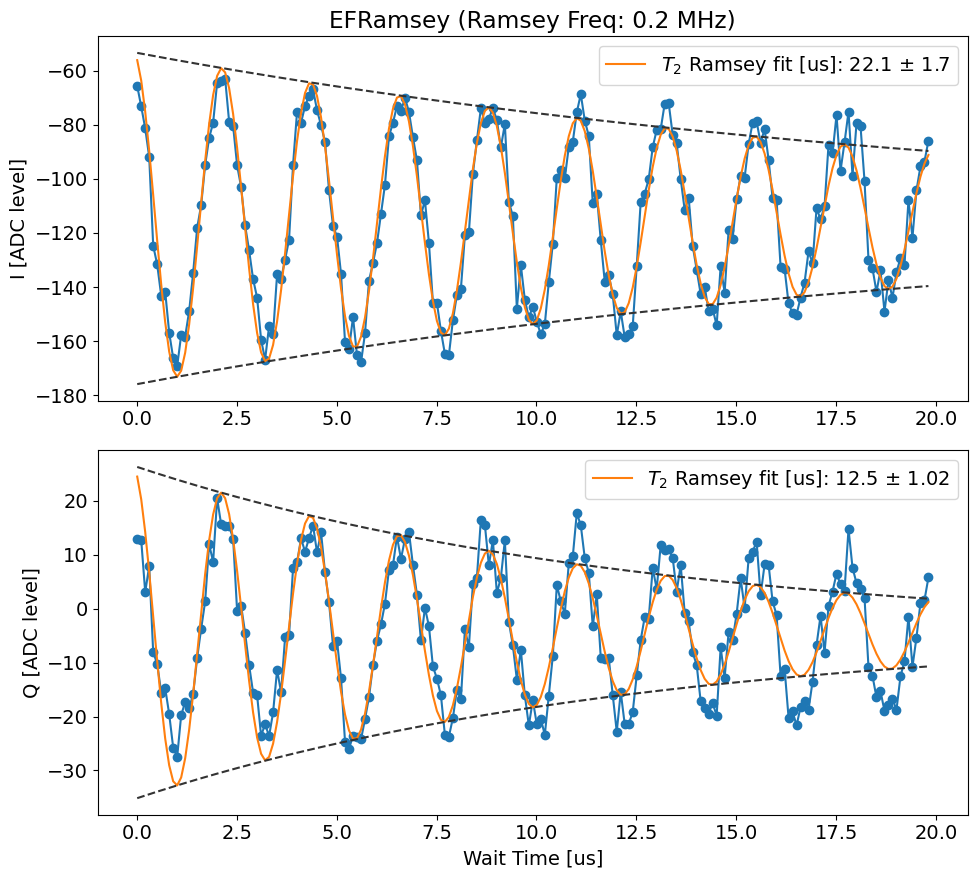

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-14_18-07-30_T2_ef_for_chief.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-14.md
Chi: -0.24948128572995282


In [ ]:
man_mode_no = 1
t2ge_ramsey_forchief, t2ef_ramsey_forchief = None, None
t2ef_standard_ramsey_forchief = None
if expts_to_run['chi_ef']:
    
    #get standard ef ramsey 
    t2ef_standard_ramsey_forchief = do_t2_ramsey_ef(config_thisrun, expt_path, config_path)
    # analyze and display the results
    t2ef_standard_ramsey_forchief.analyze(fitparams=[300, None, None, None, None, None])
    t2ef_standard_ramsey_forchief.display(title_str='T2_ef_standard_for_chief')

    # Now ramseys with man photon prepulse
    config_thisrun_chief = deepcopy(config_thisrun)
    config_thisrun_chief.device.qubit.f_ge[0] += config_thisrun.device.manipulate.chi_ge[man_mode_no - 1]
    t2ge_ramsey_forchief, t2ef_ramsey_forchief = do_chi_f(config_thisrun_chief, expt_path, config_path)
    # analyze and display the results
    t2ge_ramsey_forchief.analyze(fitparams=[300, None, None, None, None, None])
    t2ge_ramsey_forchief.display(title_str='T2_ge_for_chief_tocheck_this_is_correctly_at_ramsey_freq')
    t2ef_ramsey_forchief.analyze(fitparams=[300, None, None, None, None, None])
    t2ef_ramsey_forchief.display(title_str='T2_ef_for_chief')
    # update the config_thisrun with the chi value
    update_chi_ef(t2ef_standard_ramsey_forchief, t2ef_ramsey_forchief, config_thisrun)


In [ ]:
# update_chi_ef(t2ef_standard_ramsey_forchief, t2ef_ramsey_forchief, config_thisrun)

In [ ]:
# t2ge_ramsey_forchief.analyze(fitparams=[300, None, None, None, None, None])
# t2ge_ramsey_forchief.display(title_str='T2_ef_ramsey_forchief')

In [ ]:
# t2ef_ramsey_forchief.analyze(fitparams=[300, None, None, None, None, None])
# t2ef_ramsey_forchief.display(title_str='T2_ef_ramsey_forchief')

In [ ]:
# t2ge_ramsey_forchief.analyze()
# t2ge_ramsey_forchief.display(title_str='T2_ge_ramsey_forchief')

## Parity Delay
NOT Implemented yet: We can use chi to estimate parity waiting time pi/chi but can also fine tune it using this experiment

Basically Length rabi analysis 

## T1

In [ ]:


def do_t1_manipulate(config_thisrun, expt_path, config_path, man_mode_no=1):
    """
    Run T1 experiment for the specified manipulate mode (man_mode_no).
    """
    t1_man = meas.single_qubit.t1_cavity.T1CavityExperiment(
        soccfg=soc, path=expt_path, prefix='T1CavityExperiment', config_file=config_path
    )

    t1_man.cfg = AttrDict(deepcopy(config_thisrun))

    # Set experiment parameters for the specified manipulate mode
    t1_man.cfg.expt = dict(
        start=0,
        step=15,
        expts=60,
        reps=300,
        rounds=1,
        cavity_prepulse=[False, 300, 1.5],
        f0g1_prep=True,
        f0g1_param=[ds_thisrun.get_freq(f'M{man_mode_no}'), ds_thisrun.get_gain(f'M{man_mode_no}'), ds_thisrun.get_pi(f'M{man_mode_no}')],
        resolved_pi=False,
        cavity=man_mode_no,
        qubit=0,
        normalize=False
    )

    t1_man.cfg.device.readout.relax_delay = [2500]
    t1_man.go(analyze=True, display=True, progress=True, save=True)
    return t1_man



In [ ]:
# t1_man = do_t1_manipulate(config_thisrun, expt_path, config_path, 1)

## T2
06/19/2025: The code below should use man ramsey directly instead of user defined; user defined is for ramsey where you directly displace manipulate mode  - Eesh

In [ ]:
def do_cavity_ramsey(config_thisrun, expt_path, config_path, man_mode_no=1):
    """
    Run the Cavity Ramsey experiment using the specified configuration.
    """
    cavity_ramsey = meas.single_qubit.t2_cavity.CavityRamseyExperiment(
        soccfg=soc, path=expt_path, prefix='CavityRamseyExperiment', config_file=config_path
    )

    cavity_ramsey.cfg = AttrDict(deepcopy(config_thisrun))

    # Prepulse and postpulse

    # Set experiment parameters as in the YAML block above
    cavity_ramsey.cfg.expt = dict(
        start=0.01,
        step=0.05,
        expts=200,
        ramsey_freq=2.4,
        reps=100,
        rounds=1,
        qubits=[0],
        checkEF=False,
        f0g1_cavity=0,
        init_gf=False,
        active_reset=False,
        man_reset=True,
        storage_reset=True,
        user_defined_pulse=[False, ds_thisrun.get_freq(stor_name='M'+ str(man_mode_no)), 
                            ds_thisrun.get_gain(stor_name='M'+ str(man_mode_no)), 0.005, 
                            ds_thisrun.get_pi(stor_name='M'+ str(man_mode_no)), 0],
        parity_meas=False,
        man_mode_no=man_mode_no ,
        storage_ramsey=[False, 2, True],
        man_ramsey=[True, man_mode_no],
        coupler_ramsey=False,
        custom_coupler_pulse=[[944.25], [1000], [0.316677658], [0], [1], ['flat_top'], [0.005]],
        echoes=[False, 0],
        prepulse=True,
        postpulse=True,
        gate_based = True,
        pre_sweep_pulse= [['qubit', 'ge', 'hpi', 0], ['qubit', 'ef', 'pi', 0]],
        post_sweep_pulse=[['qubit', 'ef', 'pi', 0], ['qubit', 'ge', 'hpi', 0]]
    )

    cavity_ramsey.cfg.device.readout.relax_delay = [2500]
    cavity_ramsey.go(analyze=False, display=False, progress=True, save=True)
    return cavity_ramsey

cavity_ramsey = do_cavity_ramsey(config_thisrun, expt_path, config_path, man_mode_no=1)

phase update channel: [0]
Inside cavity ramsey code
[['qubit', 'ge', 'hpi', 0], ['qubit', 'ef', 'pi', 0]]
[[2011.4053]
 [8000]
 [0.5408883810926033]
 [0]
 [0]
 ['flat_top']
 [0.005]]
[0]
phase step deg: 43.2
phase step logic: +
inide t2 cavity acquire
200


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00003_CavityRamseyExperiment.h5


Current pi pulse frequency: 3571.672429380876
Fit frequency from I [MHz]: 1.3085145116340824 +/- 0.00054749903805097
Suggested new pi pulse frequency from fit I [MHz]:
 	3572.763914869242
 	3575.38094389251
T2 Ramsey from fit I [us]: 104.6594159358269
Fit frequency from Q [MHz]: 0.8040201005025125 +/- inf
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3573.268409280374
 	3574.8764494813786
T2 Ramsey from fit Q [us]: 9.9


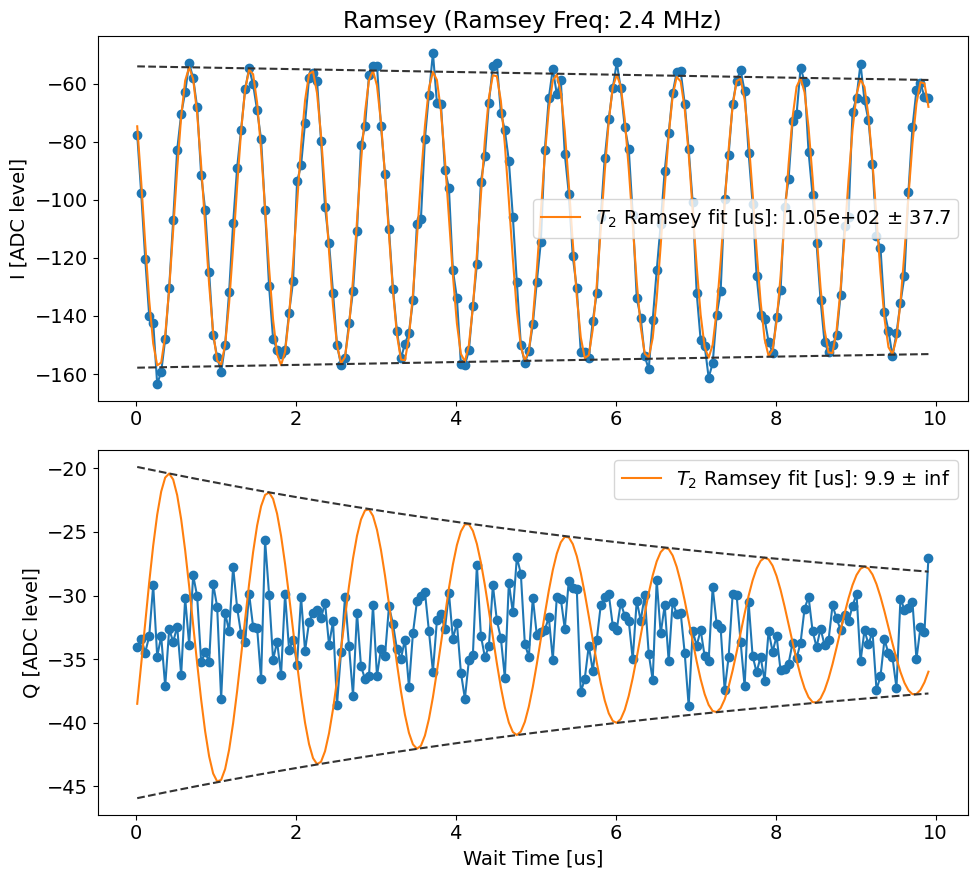

In [ ]:
cavity_ramsey.analyze()
cavity_ramsey.display()

# Storage

## Stor Spectroscopy

In [177]:
def get_storage_mode_parameters(ds_thisrun, config_thisrun, man_mode_no, stor_mode_no):
    """
    Get pulse parameters for a given storage mode. 
    Also returns prepulse and postpulse (single photon prep and meas for ge meas)

    Args:
        ds_thisrun: Dataset object for managing frequency data.
        config_thisrun: Configuration dictionary for the current run.
        man_mode_no: Manipulation mode number.
        stor_mode_no: Storage mode number.

    Returns:
        A tuple containing freq, gain, ch, prepulse, and postpulse.
    """
    stor_name = 'M' + str(man_mode_no) + '-S' + str(stor_mode_no)
    freq = ds_thisrun.get_freq(stor_name)
    gain = ds_thisrun.get_gain(stor_name)
    pi_len = ds_thisrun.get_pi(stor_name)
    h_pi_len = ds_thisrun.get_h_pi(stor_name)
    flux_low_ch = config_thisrun.hw.soc.dacs.flux_low.ch
    flux_high_ch = config_thisrun.hw.soc.dacs.flux_high.ch
    ch = flux_low_ch if freq<1000 else flux_high_ch

    from MM_dual_rail_base import MM_dual_rail_base
    mm_base_dummy = MM_dual_rail_base(config_thisrun, soccfg=soc)
    prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
    prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()
    print("post pulse", prep_man_pi[-1:-3:-1])
    postpulse = mm_base_dummy.get_prepulse_creator(prep_man_pi[-1:-3:-1]).pulse.tolist() # for ge meas, only do f0g1 and ef pi

    return freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse


def do_stor_spectroscopy(config_thisrun, ds_thisrun,  expt_path, config_path, man_mode_no = 1, stor_no = 1):
    """
    Run the Flux Spectroscopy F0g1 Experiment.

    This function performs a flux spectroscopy experiment to measure the transition frequency
    between the f0 and g1 states of a qubit. It configures the experiment parameters, executes
    the experiment, and saves the results.

    Args:
        config_thisrun (AttrDict): Configuration dictionary for the current run.
        ds_thisrun (dataset.storage_man_swap_dataset): Dataset object for managing frequency data.
        expt_path (str): Path to save the experiment results.
        config_path (str): Path to the configuration file.
        man_mode_no (int, optional): Manipulation mode number (default is 1).
        stor_no (int, optional): Storage mode number (default is 1).

    Returns:
        FluxSpectroscopyF0g1Experiment: The experiment object containing the results.
    """
    flux_spec = meas.single_qubit.rf_flux_spectroscopy_f0g1.FluxSpectroscopyF0g1Experiment(
        soccfg=soc, path=expt_path, prefix='FluxSpectroscopyF0g1Experiment', config_file=config_path
    )

    flux_spec.cfg = AttrDict(deepcopy(config_thisrun))

    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_storage_mode_parameters(ds_thisrun, config_thisrun,
                                                                      man_mode_no, stor_no)
    flux_spec.cfg.expt = dict(
        start=freq - 15,  # Start RF frequency [MHz]
        step=0.15,  # Step size [MHz]
        expts=200,  # Number of experiments
        reps=100,  # Number of averages per point
        qubit=[0],
        flux_drive=[ch, 1, 5000, 1],  # RF flux modulation parameters [low/high (ch), freq (will be overwritten), gain, length(us)]
        prepulse=True,
        postpulse=True,
        active_reset=False,
        pre_sweep_pulse= prepulse,
        post_sweep_pulse= postpulse,
    )

    flux_spec.cfg.device.readout.relax_delay = [500]  # Wait time between experiments [us]
    flux_spec.go(analyze=False, display=False, progress=True, save=True)
    return flux_spec



def analyze_and_display_stor_spectroscopy(flux_spec):
    """Analyze and display results of Flux Spectroscopy F0g1 Experiment."""
    from multimode_expts.fit_display_classes import Spectroscopy
    spec_analysis = Spectroscopy(flux_spec.data)
    spec_analysis.analyze(fit=True)
    spec_analysis.display()


def update_stor_spectroscopy(flux_spec, ds_thisrun, man_mode_no = 1, stor_no = 1):
    """Update the configuration based on Flux Spectroscopy F0g1 experiment results."""
    # Update the dataset with the new frequency
    ds_thisrun.update_freq('M' + str(man_mode_no) + '-S' + str(stor_no), flux_spec.data['fit_avgi'][2])
    print(f"Updated frequency for M{man_mode_no}-S{stor_no}: {flux_spec.data['fit_avgi'][2]}")


Running flux spectroscopy f0g1 for mode 1
multiphoton (7, 1) (7, 0)
multiphoton (7, 1) (7, 1)
multiphoton (7, 1) (7, 2)
multiphoton (7, 1) (7, 0)
multiphoton (7, 1) (7, 1)
channel: low


  0%|          | 0/200 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00000_FluxSpectroscopyF0g1Experiment.h5
Found peak in amps at [MHz] 348.649269244932, HWHM 1.3280103621082833
Found peak in I at [MHz] 348.65866529179436, HWHM 1.340123945018121
Found peak in Q at [MHz] 347.63346974655127, HWHM -0.11066441128458435


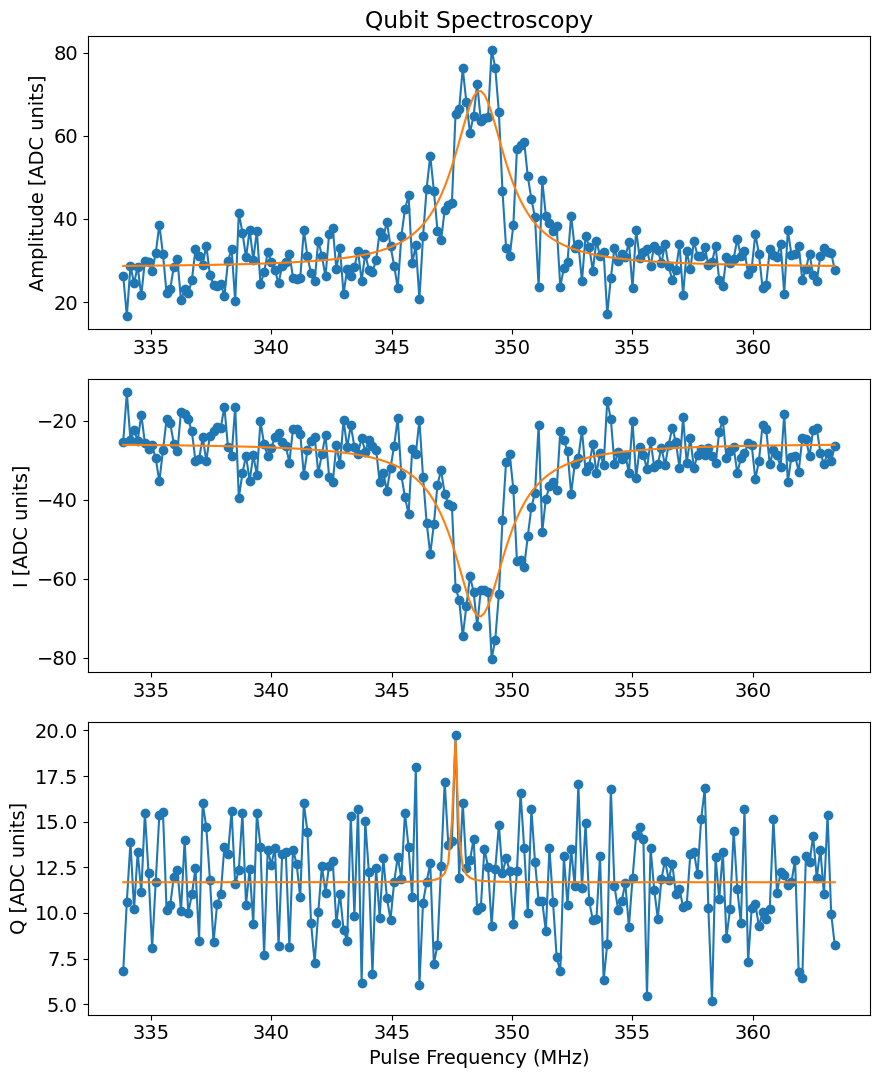

Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated frequency for M1-S1: 348.65866529179436
Running flux spectroscopy f0g1 for mode 2
multiphoton (7, 1) (7, 0)
multiphoton (7, 1) (7, 1)
multiphoton (7, 1) (7, 2)
multiphoton (7, 1) (7, 0)
multiphoton (7, 1) (7, 1)
channel: low


  0%|          | 0/200 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00001_FluxSpectroscopyF0g1Experiment.h5
Found peak in amps at [MHz] 521.0528010178706, HWHM 1.4311298716309004
Found peak in I at [MHz] 521.0518225662423, HWHM 1.4586310916326322
Found peak in Q at [MHz] 521.2783678739522, HWHM 3.860338450877395


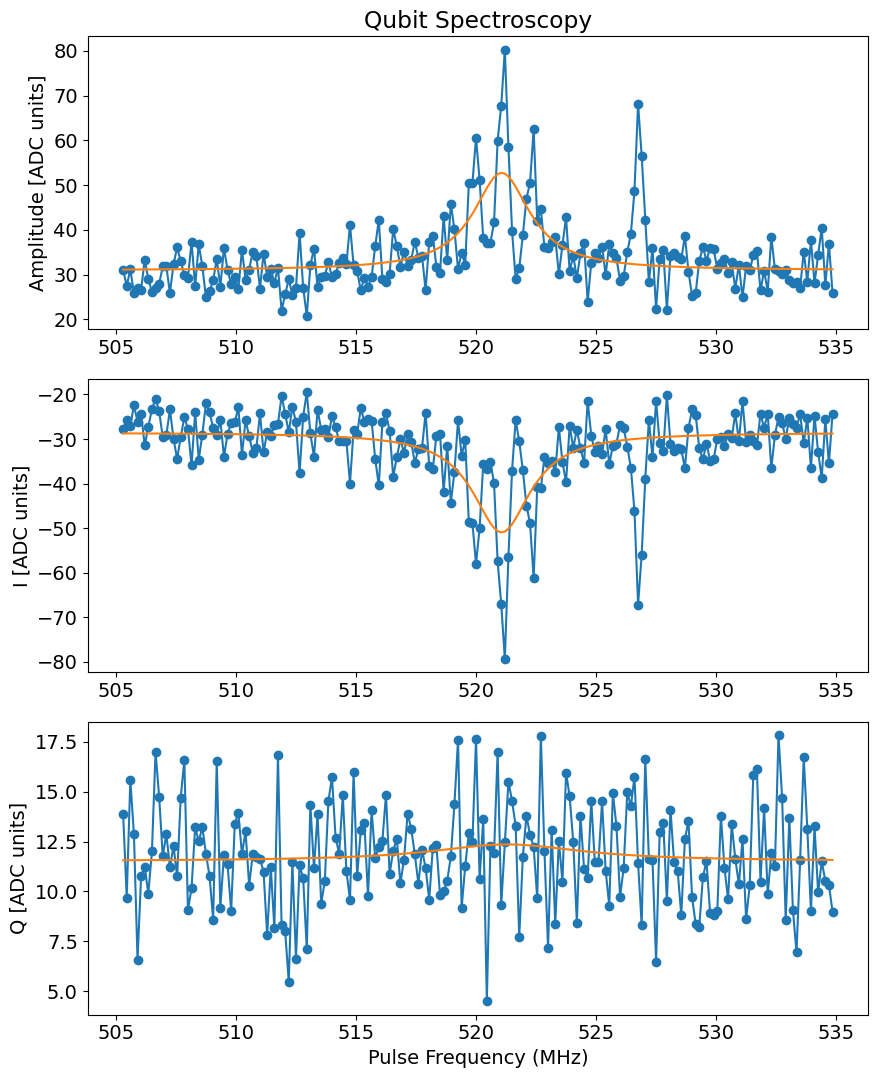

Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated frequency for M1-S2: 521.0518225662423
Running flux spectroscopy f0g1 for mode 3
multiphoton (7, 1) (7, 0)
multiphoton (7, 1) (7, 1)
multiphoton (7, 1) (7, 2)
multiphoton (7, 1) (7, 0)
multiphoton (7, 1) (7, 1)
channel: low


  0%|          | 0/200 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00002_FluxSpectroscopyF0g1Experiment.h5
Found peak in amps at [MHz] 695.4422768312868, HWHM 1.7508042037131009
Found peak in I at [MHz] 695.396676771415, HWHM 1.8061538160879875
Found peak in Q at [MHz] 696.0053362704806, HWHM 0.03512299964236717


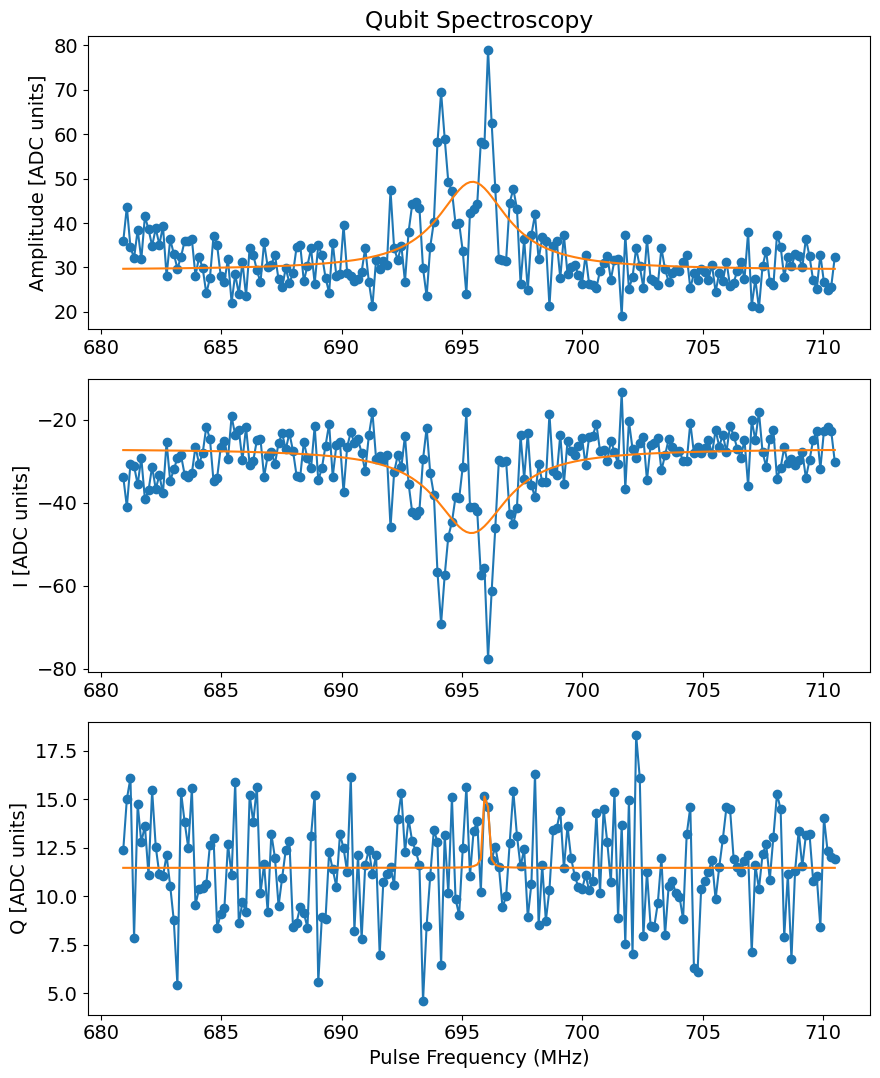

Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated frequency for M1-S3: 695.396676771415


In [104]:
stor_specs = [None]* len(expts_to_run['stor_modes'])
for i in range(len(expts_to_run['stor_modes'])):
    if expts_to_run['stor_spectroscopy']:
        print('Running flux spectroscopy f0g1 for mode', i+1)
        flux_spec = do_stor_spectroscopy(config_thisrun, ds_thisrun, expt_path, config_path, man_mode_no=1, stor_no=i+1)
        stor_specs[i] = flux_spec
        analyze_and_display_stor_spectroscopy(flux_spec)
        update_stor_spectroscopy(flux_spec, ds_thisrun, man_mode_no=1, stor_no=i+1)

In [99]:
# flux high 
i = 0
spec = do_stor_spectroscopy(config_thisrun, ds_thisrun, expt_path, config_path, man_mode_no=1, stor_no=i+1, use_flux_low = False)
analyze_and_display_stor_spectroscopy(spec)

TypeError: __init__() missing 1 required positional argument: 'soccfg'

channel: low


  0%|          | 0/200 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00015_FluxSpectroscopyF0g1Experiment.h5
Found peak in amps at [MHz] 1243.827860756566, HWHM -0.3858628076541243
Found peak in I at [MHz] 1243.8257579708848, HWHM -0.39191799978690606
Found peak in Q at [MHz] 1244.9973951929585, HWHM 0.06983025331841579


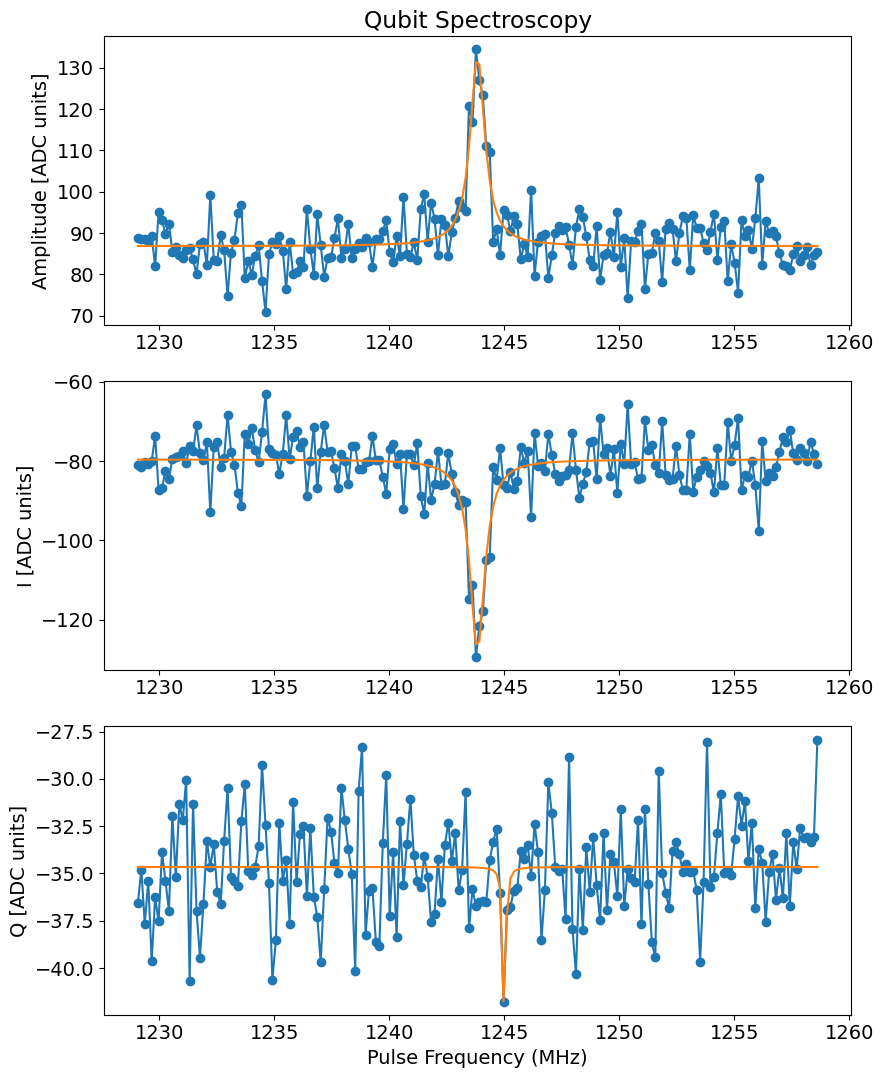

In [ ]:
# flux low
i = 5
spec = do_stor_spectroscopy(config_thisrun, ds_thisrun, expt_path, config_path, man_mode_no=1, stor_no=i+1, use_flux_low = True)
analyze_and_display_stor_spectroscopy(spec)

In [ ]:
for i in range(len(expts_to_run['stor_modes'])):
    print('Frequency for M1-S' + str(i+1) + ':', ds_thisrun.get_freq('M1-S' + str(i+1)))


Frequency for M1-S1: 348.31431686285026
Frequency for M1-S2: 516.810601406611
Frequency for M1-S3: 701.8559470274935
Frequency for M1-S4: 869.2901138587006
Frequency for M1-S5: 1052.7834419726873
Frequency for M1-S6: 1243.9099109250164
Frequency for M1-S7: 1421.9748566459616


### Man-dump

In [41]:
def get_dump_mode_parameters(ds_thisrun, config_thisrun, man_mode_no, dump_mode_no):
    """
    Get pulse parameters for a given storage mode. 
    Also returns prepulse and postpulse (single photon prep and meas for ge meas)

    Args:
        ds_thisrun: Dataset object for managing frequency data.
        config_thisrun: Configuration dictionary for the current run.
        man_mode_no: Manipulation mode number.
        dump_mode_no: Dump mode number.

    Returns:
        A tuple containing freq, gain, ch, prepulse, and postpulse.
    """
    stor_name = 'M' + str(man_mode_no) + '-D' + str(dump_mode_no)
    freq = ds_thisrun.get_freq(stor_name)
    gain = ds_thisrun.get_gain(stor_name)
    pi_len = ds_thisrun.get_pi(stor_name)
    h_pi_len = ds_thisrun.get_h_pi(stor_name)
    ch = 'low' if freq < 1000 else 'high'

    from MM_dual_rail_base import MM_dual_rail_base
    mm_base_dummy = MM_dual_rail_base(config_thisrun, soccfg=soc)
    prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
    prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()
    postpulse = mm_base_dummy.get_prepulse_creator(prep_man_pi[-1:-3:-1]).pulse.tolist() # for ge meas, only do f0g1 and ef pi

    return freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse


def do_dump_spectroscopy(config_thisrun, ds_thisrun,  expt_path, config_path, man_mode_no = 1, dump_no = 1):
    """
    Run the Flux Spectroscopy F0g1 Experiment.

    This function performs a flux spectroscopy experiment to measure the transition frequency
    between the f0 and g1 states of a qubit. It configures the experiment parameters, executes
    the experiment, and saves the results.

    Args:
        config_thisrun (AttrDict): Configuration dictionary for the current run.
        ds_thisrun (dataset.storage_man_swap_dataset): Dataset object for managing frequency data.
        expt_path (str): Path to save the experiment results.
        config_path (str): Path to the configuration file.
        man_mode_no (int, optional): Manipulation mode number (default is 1).
        dump_no (int, optional): Storage mode number (default is 1).

    Returns:
        FluxSpectroscopyF0g1Experiment: The experiment object containing the results.
    """
    flux_spec = meas.single_qubit.rf_flux_spectroscopy_f0g1.FluxSpectroscopyF0g1Experiment(
        soccfg=soc, path=expt_path, prefix='FluxSpectroscopyF0g1Experiment', config_file=config_path
    )

    flux_spec.cfg = AttrDict(deepcopy(config_thisrun))

    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_dump_mode_parameters(ds_thisrun, config_thisrun,
                                                                      man_mode_no, dump_no)

    flux_spec.cfg.expt = dict(
        start=freq - 5,  # Start RF frequency [MHz]
        step=0.05,  # Step size [MHz]
        expts=200,  # Number of experiments
        reps=200,  # Number of averages per point
        qubit=[0],
        flux_drive=[ch, 1,4000, 1],  # RF flux modulation parameters [low/high (ch), freq (will be overwritten), gain, length(us)]
        prepulse=True,
        postpulse=True,
        active_reset=False,
        pre_sweep_pulse= prepulse,
        post_sweep_pulse= postpulse,
    )

    flux_spec.cfg.device.readout.relax_delay = [500]  # Wait time between experiments [us]
    flux_spec.go(analyze=False, display=False, progress=True, save=True)
    return flux_spec


def update_dump_spectroscopy(flux_spec, ds_thisrun, man_mode_no = 1, dump_no = 1):
    """Update the configuration based on Flux Spectroscopy F0g1 experiment results."""
    # Update the dataset with the new frequency
    ds_thisrun.update_freq('M' + str(man_mode_no) + '-D' + str(dump_no), flux_spec.data['fit_avgi'][2])
    print(f"Updated frequency for M{man_mode_no}-D{dump_no}: {flux_spec.data['fit_avgi'][2]}")


In [43]:
spec = do_dump_spectroscopy(config_thisrun, ds_thisrun, expt_path, config_path, man_mode_no=1, dump_no=1)
# analyze_and_display_stor_spectroscopy(spec)
update_dump_spectroscopy(spec, ds_thisrun, 1, 1)

multiphoton g0-e0 (7, 1) (7, 0)
multiphoton e0-f0 (7, 1) (7, 1)
multiphoton e0-f0 (7, 1) (7, 1)


  0%|          | 0/200 [00:00<?, ?it/s]

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001C0F6612EB0>>
Traceback (most recent call last):
  File "c:\Users\26049\.conda\envs\slab\lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00004_FluxSpectroscopyF0g1Experiment.h5


KeyError: 'fit_avgi'

In [ ]:
update_dump_spectroscopy(spec, ds_thisrun, man_mode_no = 1, dump_no = 1)
ds_thisrun.update_gain('M1-D1', 4000)

In [ ]:
for i in range(len(expts_to_run['stor_modes'])):
    print('Frequency for M1-S' + str(i+1) + ':', ds_thisrun.get_freq('M1-S' + str(i+1)))


Frequency for M1-S1: 348.31431686285026
Frequency for M1-S2: 516.810601406611
Frequency for M1-S3: 701.8559470274935
Frequency for M1-S4: 869.2901138587006
Frequency for M1-S5: 1052.7834419726873
Frequency for M1-S6: 1243.9099109250164
Frequency for M1-S7: 1421.9748566459616


## Find Freq Chevron + Error Amp

In [194]:
def do_sideband_general_sweep(
    config_thisrun, ds_thisrun, expt_path, config_path, freq_start, freq_stop, freq_step,
    reps=50, man_mode_no = 1, stor_mode_no = 1, start_time = 0.007, liveplotting=True):
    """Run the Sideband General Sweep Experiment."""
    from multimode_expts.sequential_experiment_classes import sidebands_class
    experiment_class = sidebands_class
    sweep_experiment_name = 'sideband_general_sweep'
    class_for_exp = experiment_class(
        soccfg=soc, path=expt_path,
        prefix=sweep_experiment_name,
        config_file=config_path,
        exp_param_file=exp_param_file,
        config_thisrun=config_thisrun,
        liveplotting=liveplotting)

    # class_for_exp.yaml_cfg = AttrDict(deepcopy(config_thisrun))
    # get pulse parameters for the given storage mode
    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_storage_mode_parameters(ds_thisrun, config_thisrun, man_mode_no, stor_mode_no)
    print('gain:', gain)

    class_for_exp.loaded[sweep_experiment_name] =  dict(
        start=start_time,  # Pulse start length [us]
        step=pi_len / 5,  # Pulse step length [us]
        qubits=[0],
        expts=15, #30,
        reps=reps, #90
        rounds=1,
        freq_start=freq_start,
        freq_stop=freq_stop,
        freq_step=freq_step,
        flux_drive=[ch, freq, gain, 0.05],  # RF flux modulation parameters [low/high (ch), freq (will be overwritten), gain, length placeholder(us)]
        prepulse=True,
        postpulse=True,
        active_reset=False,
        man_reset=True,
        storage_reset=True,
        update_post_pulse_phase=[False, 1.07],
        pre_sweep_pulse= prepulse,
        post_sweep_pulse= postpulse,
    )
    class_for_exp.yaml_cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]

    return eval('class_for_exp.run_sweep')( sweep_experiment_name = sweep_experiment_name)


def update_sideband_general_sweep(expt_path, config_thisrun, ds_thisrun, man_mode_no=1, stor_mode_no=1, update=True):
    """Update sweep data and analyze results."""
    temp_data, attrs, filename = prev_data(expt_path, prefix='sideband_general_sweep')
    print('File saved at:', filename)

    from multimode_expts.fit_display_classes import ChevronFitting
    from datetime import datetime
    chevron_analysis = ChevronFitting(
        frequencies=temp_data['freq_sweep'],
        time=temp_data['xpts'][0],
        response_matrix=temp_data['avgi'],config = config_thisrun,
    )
    chevron_analysis.analyze()
    
    current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    chevron_analysis.display_results(save_fig=True, title=f'M{man_mode_no}-S{stor_mode_no}_{current_time}')

    # Update dataset
    if not update: return chevron_analysis

    stor_name = 'M' + str(man_mode_no) + '-S' + str(stor_mode_no)
    ds_thisrun.update_freq(stor_name, chevron_analysis.results['best_frequency_period'])
    print('Updated the frequency to:', chevron_analysis.results['best_frequency_period'])

    pi_len = abs(np.pi / chevron_analysis.results['best_fit_params_period']['omega'])
    ds_thisrun.update_pi(stor_name, pi_len)
    print('Updated the pi length to:', pi_len)
    ds_thisrun.update_h_pi(stor_name, pi_len / 2)
    print('Updated the h_pi length to:', pi_len / 2)
    return chevron_analysis

In [161]:
def do_error_amp_storage(
    config_thisrun,
    ds_thisrun,
    expt_path,
    config_path,
    reps=100,
    rounds=1,
    qubit=0,
    n_start=1,
    n_step=1,
    n_pulses=10,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    relax_delay=2500, 
    span = 1.0, # in units of either freq or gain depending on parameter_to_test
    expts = 25,
    parameter_to_test = 'frequency',
    man_mode_no=1,
    stor_mode_no=1,
    stor_is_dump=False,
):
    """
    Run the Histogram Prepulse Experiment with configurable parameters.
    """
        
    pulse_type = ['storage', f'M{man_mode_no}-{"D" if stor_is_dump else "S"}{stor_mode_no}', 'pi', 0]


    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_storage_mode_parameters(ds_thisrun, config_thisrun, man_mode_no, stor_mode_no)

    if parameter_to_test == 'frequency':
        start = freq - span / 2
        step = span / (expts - 1)
    elif parameter_to_test == 'gain':
        start = int(gain - span / 2)
        step = int(span / (expts - 1))
    else:
        raise ValueError("parameter_to_test must be either 'frequency' or 'gain'.")
    
    expt_cfg = {
        'reps': reps,
        'qubit': qubit,
        'qubits': [qubit],
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'start': start,
        'expts': expts,
        'step': step,
        'n_start': n_start,
        'n_step': n_step,
        'n_pulses': n_pulses,
        'pulse_type': pulse_type,
        'parameter_to_test': parameter_to_test,
        'rounds': rounds,
    }

    error_amp_exp = meas.single_qubit.error_amplification.ErrorAmplificationExperiment(
    soccfg=soc, path=expt_path,
      prefix='ErrorAmplificationExperiment', config_file=config_path)
    error_amp_exp.cfg = AttrDict(deepcopy(config_thisrun))
    error_amp_exp.cfg.expt = expt_cfg
    error_amp_exp.go(analyze=False, display=False, progress=True, save=True)
    return error_amp_exp

In [192]:
expts_to_run['stor_modes'] = [1, 2, 3, 4, 5, 6, 7]
# expts_to_run['stor_modes'] = [5]

sideband_chevrons_coarse = [None] * len(expts_to_run['stor_modes'])
sideband_chevrons_fine = [None] * len(expts_to_run['stor_modes'])
error_amp_gain1 = [None] * len(expts_to_run['stor_modes'])
error_amp_freq1 = [None] * len(expts_to_run['stor_modes'])
error_amp_gain2 = [None] * len(expts_to_run['stor_modes'])
error_amp_freq2 = [None] * len(expts_to_run['stor_modes'])

File saved at: H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00053_sideband_general_sweep.h5
uncertainty smells off, marking this line as invalid
uncertainty smells off, marking this line as invalid
uncertainty smells off, marking this line as invalid
uncertainty smells off, marking this line as invalid
uncertainty smells off, marking this line as invalid
uncertainty smells off, marking this line as invalid
uncertainty smells off, marking this line as invalid
supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-18_17-15-07_M1-S4_2025-08-18_17-15-07.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-18.md


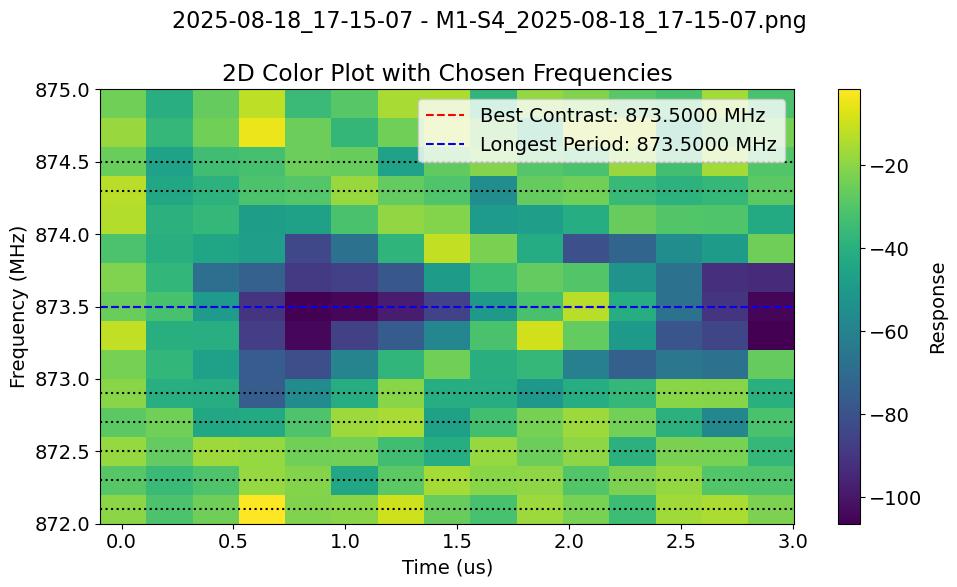

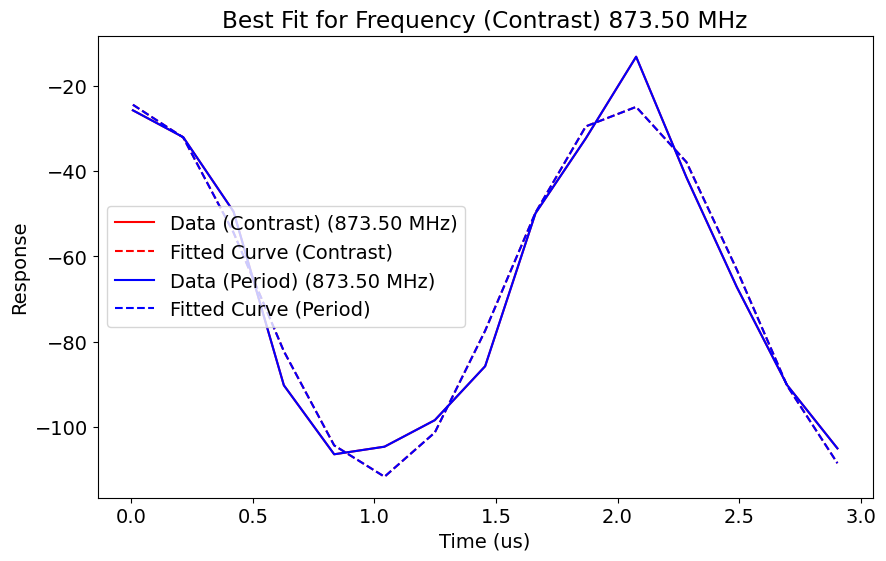

Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated the frequency to: 873.5000000000003
Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated the pi length to: 1.0022018281941902
Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated the h_pi length to: 0.5011009140970951
Running error amplification (gain) for storage mode 4
multiphoton g0-e0 (7, 1) (7, 0)
multiphoton e0-f0 (7, 1) (7, 1)
man M1
post pulse [['multiphoton', 'f0-g1', 'pi', 0], ['multiphoton', 'e0-f0', 'pi', 0]]
man M1
multiphoton e0-f0 (7, 1) (7, 1)
cfg at start of acquire {'reps': 50, 'qubit': 0, 'qubits': [0], 'active_reset': False, 'man_reset': True, 'storage_reset': True, 'start': 8500, 'expts': 50, 'step': 20, 'n_start': 0, 'n_step': 3, 'n_pulses': 15, 'pulse_type': ['storage', 'M1-S4', 'pi', 0], 'parameter_to_test': 'gain', 'rounds': 1}
n_pts [ 0  3  6  9 12 15]


  0%|          | 0/6 [00:00<?, ?it/s]

man M1
man M1
man M1
man M1
man M1
man M1
Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00132_ErrorAmplificationExperiment.h5
fitparams [-0.00033472673961986484, 1.0003347267396199, 9100, 98.0]


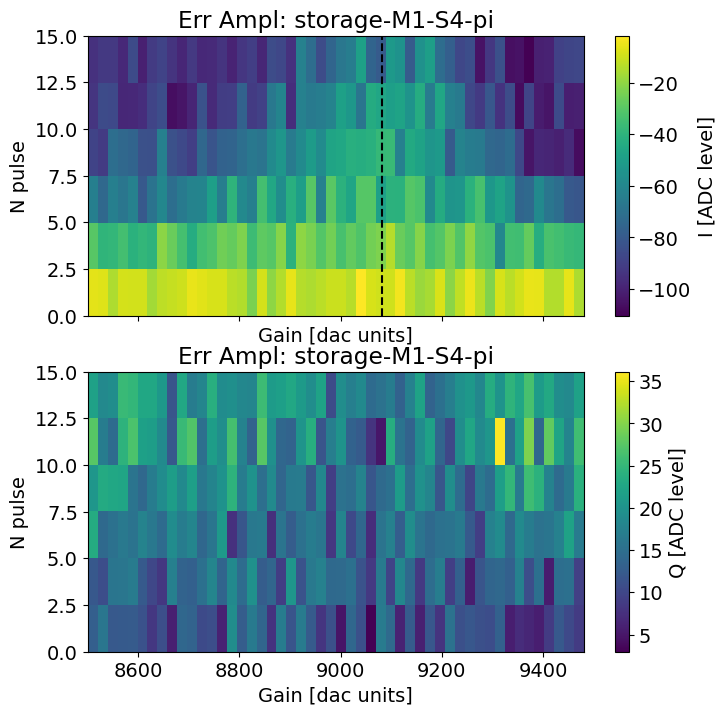

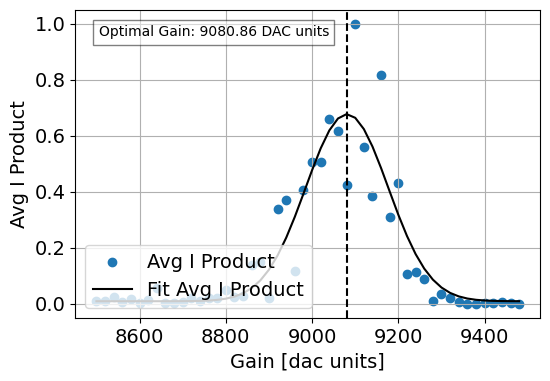

Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated the gain to: 9080
Running error amplification (frequency) for storage mode 4
multiphoton g0-e0 (7, 1) (7, 0)
multiphoton e0-f0 (7, 1) (7, 1)
man M1
post pulse [['multiphoton', 'f0-g1', 'pi', 0], ['multiphoton', 'e0-f0', 'pi', 0]]
man M1
multiphoton e0-f0 (7, 1) (7, 1)
cfg at start of acquire {'reps': 50, 'qubit': 0, 'qubits': [0], 'active_reset': False, 'man_reset': True, 'storage_reset': True, 'start': 873.3500000000004, 'expts': 50, 'step': 0.006122448979591836, 'n_start': 1, 'n_step': 1, 'n_pulses': 10, 'pulse_type': ['storage', 'M1-S4', 'pi', 0], 'parameter_to_test': 'frequency', 'rounds': 1}
n_pts [ 1  2  3  4  5  6  7  8  9 10]


  0%|          | 0/10 [00:00<?, ?it/s]

man M1
man M1
man M1
man M1
man M1
man M1
man M1
man M1
man M1
man M1
Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00133_ErrorAmplificationExperiment.h5
fitparams [-0.00015798034893697854, 1.0001579803489369, 873.4663265306126, 0.029999999999995454]


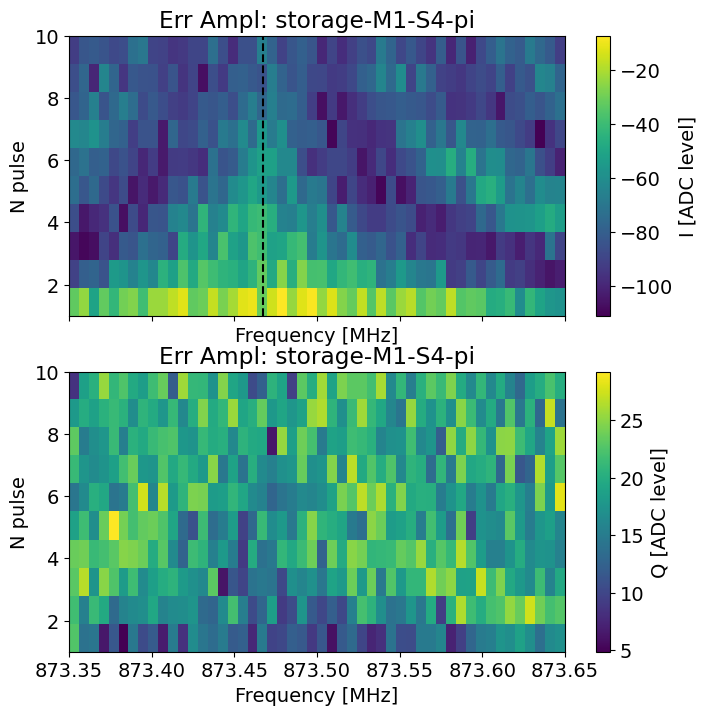

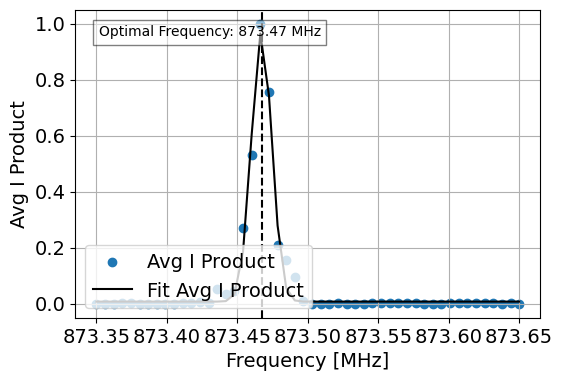

Creating or updating new csv at path: man1_storage_swap_dataset_copy.csv
Updated the frequency to: 873.4671925234683


In [198]:
for i, stor_i in enumerate(expts_to_run['stor_modes']):
# for stor_i in [5]:
    if stor_i != 4: continue

    stor_name = 'M1-S' + str(stor_i)
    if expts_to_run['sideband_freq_sweep']:

        # ds_thisrun.update_gain(stor_name, 9000)
        # ds_thisrun.update_freq(stor_name, 873.6)
        # ds_thisrun.update_freq(stor_name, 348.66845603890465)
        # ds_thisrun.update_pi(stor_name, abs(ds_thisrun.get_pi(stor_name)))
        # ds_thisrun.update_h_pi(stor_name, abs(ds_thisrun.get_h_pi(stor_name)))

        # print(f'Running coarse sideband sweep for storage mode {stor_i}')
        # freq_start = ds_thisrun.get_freq(stor_name) - 1.5
        # freq_stop = ds_thisrun.get_freq(stor_name) + 1.5
        # freq_step = 0.2
        # # freq_start = ds_thisrun.get_freq(stor_name) - 0.2
        # # freq_stop = ds_thisrun.get_freq(stor_name) + 0.2
        # # freq_step = 0.1
        # sideband_chevrons_coarse[i] = do_sideband_general_sweep(config_thisrun, ds_thisrun, expt_path, config_path, freq_start, freq_stop, freq_step, reps=50, man_mode_no=1, stor_mode_no=stor_i, liveplotting=False)
        update_sideband_general_sweep(expt_path, config_thisrun, ds_thisrun, man_mode_no=1, stor_mode_no=stor_i)


        print(f'Running error amplification (gain) for storage mode {stor_i}')
        error_amp_exp_gain = do_error_amp_storage(
            config_thisrun, ds_thisrun, expt_path, config_path, reps=50, rounds=1, qubit=0, span=1000, expts=50, n_start=0, n_step=3, n_pulses=15, man_mode_no=1, stor_mode_no=stor_i, stor_is_dump=False, parameter_to_test='gain')
        error_amp_gain1[i] = error_amp_exp_gain
        error_amp_exp_gain.analyze(state_fin='e')
        error_amp_exp_gain.display()
        gain_opt = int(error_amp_exp_gain.data['fit_avgi'][2])
        # Update dataset
        ds_thisrun.update_gain(stor_name, gain_opt)
        print('Updated the gain to:', gain_opt)


        print(f'Running error amplification (frequency) for storage mode {stor_i}')
        error_amp_exp_freq = do_error_amp_storage(
            config_thisrun, ds_thisrun, expt_path, config_path, reps=50, rounds=1, qubit=0, span=0.3, expts=50, n_pulses=10, man_mode_no=1, stor_mode_no=stor_i, stor_is_dump=False, parameter_to_test='frequency')
        error_amp_freq1[i] = error_amp_exp_freq
        error_amp_exp_freq.analyze(state_fin='e')
        error_amp_exp_freq.display()
        freq_opt = error_amp_exp_freq.data['fit_avgi'][2]
        # Update dataset
        ds_thisrun.update_freq(stor_name, freq_opt)
        print('Updated the frequency to:', freq_opt)


        # print(f'Running error amplification (gain) ROUND 2 for storage mode {stor_i}')
        # error_amp_exp_gain2 = do_error_amp_storage(
        #     config_thisrun, ds_thisrun, expt_path, config_path, reps=50, rounds=1, qubit=0, span=600, expts=50, n_start=1, n_step=1, n_pulses=10, man_mode_no=1, stor_mode_no=stor_i, stor_is_dump=False, parameter_to_test='gain')
        # error_amp_gain2[i] = error_amp_exp_gain2
        # error_amp_exp_gain2.analyze(state_fin='e')
        # error_amp_exp_gain2.display()
        # gain_opt = int(error_amp_exp_gain2.data['fit_avgi'][2])
        # # Update dataset
        # ds_thisrun.update_gain(stor_name, gain_opt)
        # print('Updated the gain to:', gain_opt)



In [ ]:
# for i, stor_i in enumerate(expts_to_run['stor_modes']):
#     if stor_i != 4: continue
#     # if stor_i == 5: continue

#     stor_name = 'M1-S' + str(stor_i)
#     print(stor_name)
#     ds.update_gain(stor_name, ds_thisrun.get_gain(stor_name))
#     ds.update_freq(stor_name, ds_thisrun.get_freq(stor_name))
#     ds.update_pi(stor_name, ds_thisrun.get_pi(stor_name))
#     ds.update_h_pi(stor_name, ds_thisrun.get_h_pi(stor_name))

M1-S4
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\man1_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\man1_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\man1_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\man1_storage_swap_dataset.csv


# Qubit characterization

In [ ]:
for i in range(len(expts_to_run['stor_modes'])):
    print('Frequency for M1-S' + str(i+1) + ':', ds_thisrun.get_freq('M1-S' + str(i+1)))

Frequency for M1-S1: 348.45287202132965
Frequency for M1-S2: 519.9101191724619


In [ ]:
# #Update sweep data and analyze results

# temp_data, attrs, filename = prev_data(expt_path, prefix='sideband_general_sweep')
# print('File saved at:', filename)

# from multimode_expts.fit_display_classes import ChevronFitting
# from datetime import datetime
# chevron_analysis = ChevronFitting(
#     frequencies=temp_data['freq_sweep'],
#     time=temp_data['xpts'][0],
#     response_matrix=temp_data['avgi'],
#     config = config_thisrun,
# )
# chevron_analysis.analyze()

# current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
# chevron_analysis.display_results(save_fig=True,  title=f'M{1}-S{7}_{current_time}')

In [ ]:
# i = 5
# print(f'Running fine sideband sweep for storage mode {i + 1}')
# freq_start = ds_thisrun.get_freq('M1-S' + str(i + 1)) - 1.5
# freq_stop = ds_thisrun.get_freq('M1-S' + str(i + 1)) + 1.5
# freq_step = 0.2
# sideband_chevrons_fine = do_sideband_general_sweep(
#     config_thisrun, ds_thisrun, expt_path, config_path, freq_start, freq_stop, freq_step, 
#     man_mode_no=1, stor_mode_no=i + 1, start_time=0.1, use_flux_low=True)
# # update_sideband_general_sweep(expt_path, config_thisrun, ds_thisrun, man_mode_no=1, stor_mode_no=i + 1, use_flux_low=True)

In [ ]:
# i = 5
# print(f'Running fine sideband sweep for storage mode {i + 1}')
# freq_start = ds_thisrun.get_freq('M1-S' + str(i + 1)) - 0.5
# freq_stop = ds_thisrun.get_freq('M1-S' + str(i + 1)) + 0.5
# freq_step = 0.2
# sideband_chevrons_fine = do_sideband_general_sweep(
#     config_thisrun, ds_thisrun, expt_path, config_path, freq_start, freq_stop, freq_step, 
#     man_mode_no=1, stor_mode_no=i + 1, start_time=0.1, use_flux_low=False)
# # update_sideband_general_sweep(expt_path, config_thisrun, ds_thisrun, man_mode_no=1, stor_mode_no=i + 1, use_flux_low=True)

### Manually get the frequencies from the chevrons

In [ ]:
# file_list = [34,36,38,40,42,44,46]
# chevrons_stor_objects = [None]* len(file_list)
# name = '_sideband_general_sweep.h5'
# # name = '_storage_sideband_sweep.h5'
# for idx, file_no in enumerate(file_list):
#     full_name = str(file_no).zfill(5)+name
#     expt_path_mod = r"H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data"
#     temp_data, attrs, filename = prev_data(expt_path_mod, full_name)  # ef

#     from multimode_expts.fit_display_classes import ChevronFitting
#     chevron_analysis = ChevronFitting(
#         frequencies=temp_data['freq_sweep'],
#         time=temp_data['xpts'][0],
#         response_matrix=temp_data['avgi']
#     )
#     chevrons_stor_objects[idx] = chevron_analysis

In [ ]:
# i = 6
# # guess_freq = 1422.66
# anls = chevrons_stor_objects[i]
# anls.analyze()
# anls.display_results(save_fig=False, 
#                     directory=autocalib_path, 
#                     title=f'M1-S{i+1}')
#                 #  hlines = [guess_freq])
# ds_thisrun.update_freq('M1-S' + str(i+1), anls.results['best_frequency_period'])
# # or override manually 
# # ds_thisrun.update_freq('M1-S' + str(i+1), 1052.8026)

In [ ]:
# ds_thisrun.df

In [ ]:

# ds_thisrun.update_freq('M1-S' + str(i), guess_freq)

In [ ]:
# ds_thisrun.get_freq('M1-S3')

## Sideband General

In [ ]:
def do_sideband_general(config_thisrun, expt_path, config_path, man_mode_no = 1,stor_mode_no=1):
    """Run the Sideband General Experiment."""
    
    sideband_general = meas.single_qubit.sideband_general.SidebandGeneralExperiment(
        soccfg=soc, path=expt_path, prefix='SidebandGeneralExperiment', config_file=config_path
    )

    sideband_general.cfg = AttrDict(deepcopy(config_thisrun))

    # Sideband general experiment parameters
    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_storage_mode_parameters(ds_thisrun, config_thisrun, man_mode_no, stor_mode_no)

    sideband_general.cfg.expt = dict(
        start=0.007,  # Pulse start length [us]
        step=0.05,  # Pulse step length [us]
        qubits=[0],
        expts=100,
        reps=200,
        rounds=1,
        flux_drive=[ch, freq, gain],  # RF flux modulation
        prepulse=True,
        postpulse=True,
        active_reset=False,
        man_reset=True,
        storage_reset=True,
        update_post_pulse_phase=[False, 1.07],
        pre_sweep_pulse=prepulse,
        post_sweep_pulse=postpulse,
    )

    sideband_general.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
    sideband_general.go(analyze=False, display=False, progress=True, save=True)
    from multimode_expts.fit_display_classes import LengthRabiFitting
    sideband_analysis = LengthRabiFitting(sideband_general.data, config=sideband_general.cfg)
    sideband_analysis.analyze()
    sideband_analysis.display(title_str='Sideband General', save_fig=True)

    return sideband_analysis


def update_sideband_general(sideband_general, config_thisrun, ds, man_mode_no=1, stor_mode_no=1):
    """Update the configuration and dataset based on Sideband General experiment results."""
    # Analyze the data
    

    # Update dataset
    pi_length = sideband_general.results['pi_length']
    pi2_length = sideband_general.results['pi2_length']
    gain = sideband_general.cfg.expt['flux_drive'][2]
    freq = sideband_general.cfg.expt['flux_drive'][1]
    ds.update_all('M' + str(man_mode_no) + '-S' + str(stor_mode_no), freq, np.nan, pi_length, pi2_length, gain)
    print(f'Updated configuration and dataset: pi_length={pi_length}, pi2_length={pi2_length}, gain={gain}')



Running sideband general for manipulation mode 1 and storage mode 1


  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00014_SidebandGeneralExperiment.h5
p1: 0.41335258809539804
p2: 91.05639369718209
Pi length: 1.2025219809405545
Pi/2 length: 0.5977114458186545
p1: 0.4193003085809728
p2: 86.6721169478902
Pi length: 1.2145092888498357
Pi/2 length: 0.6182779127126024


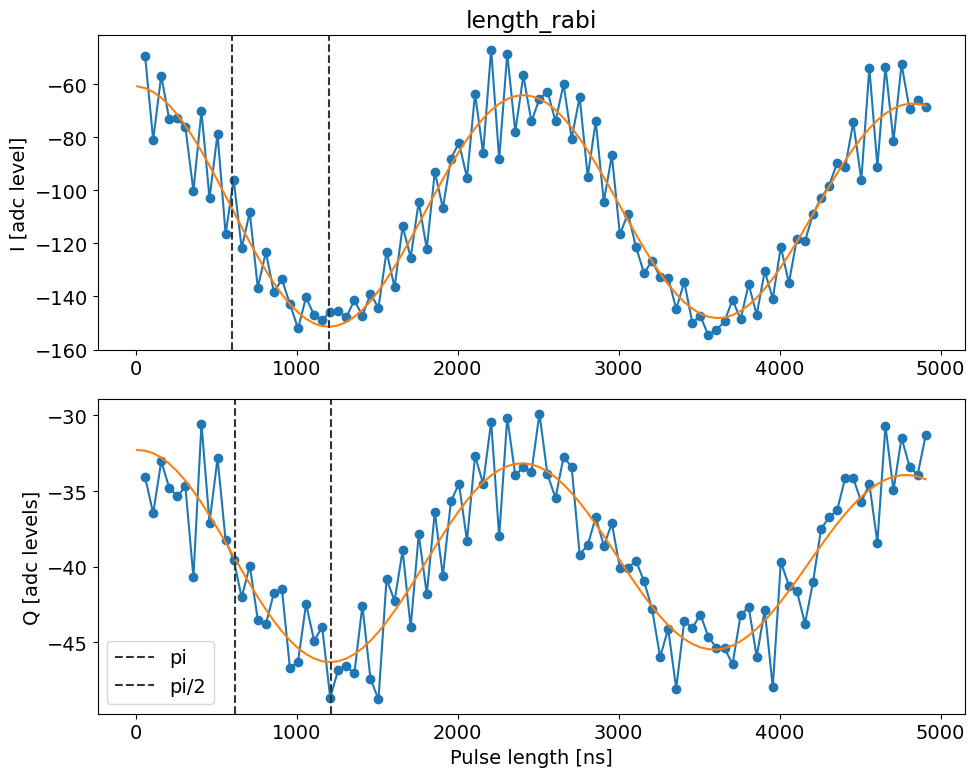

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-15_01-50-03_Sideband_General.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-15.md
Updated configuration and dataset: pi_length=1.2025219809405545, pi2_length=0.5977114458186545, gain=3000
Running sideband general for manipulation mode 1 and storage mode 2


  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00015_SidebandGeneralExperiment.h5
p1: 0.44512757641977985
p2: 90.05918572766548
Pi length: 1.1229041328357439
Pi/2 length: 0.5612673948677591
p1: 0.434784941500929
p2: 97.5993112982835
Pi length: 1.101442934743841
Pi/2 length: 0.5264460198622666


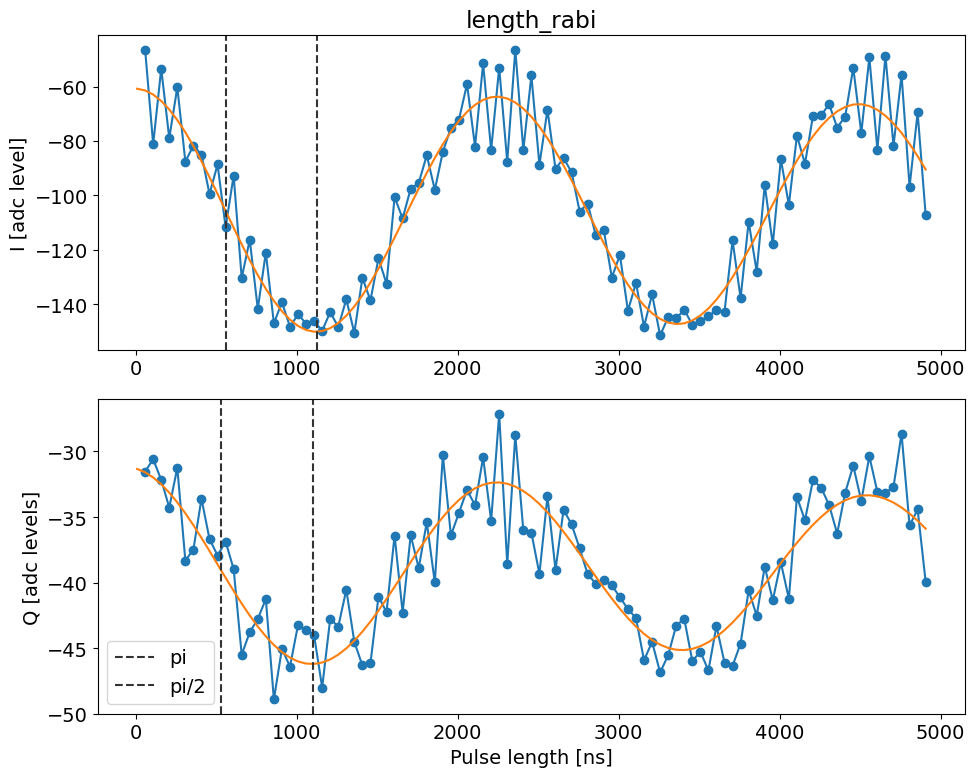

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-15_01-53-00_Sideband_General.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-15.md
Updated configuration and dataset: pi_length=1.1229041328357439, pi2_length=0.5612673948677591, gain=5000
Running sideband general for manipulation mode 1 and storage mode 3


  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00016_SidebandGeneralExperiment.h5
Attempted to init fitparam 1 to 8.282828282828282, which is out of bounds 0.02040816326530612 to 3.061224489795918. Instead init to 1.540816326530612
Attempted to init fitparam 1 to 9.292929292929292, which is out of bounds 0.02040816326530612 to 3.061224489795918. Instead init to 1.540816326530612
p1: 1.446323330673584
p2: -48.34244098180579
Pi length: 0.2656975450322192
Pi/2 length: 0.09284546230769483
p1: 1.540816326530612
p2: -0.6166463060752088
Pi length: 0.16336334323023127
Pi/2 length: 0.0011116876010921761


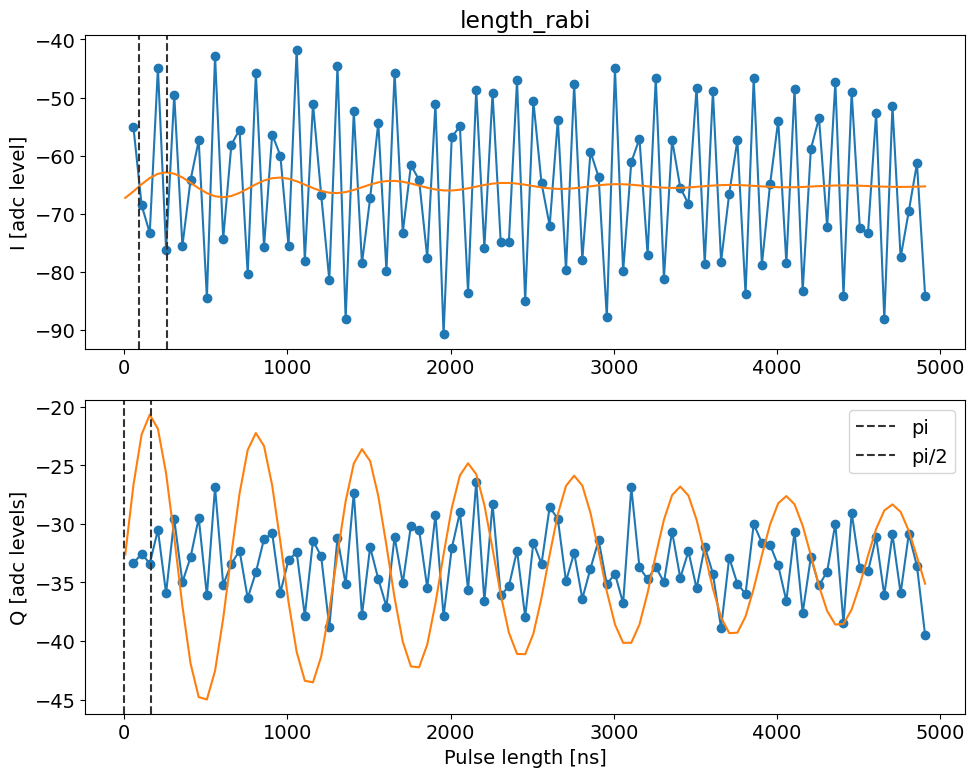

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-15_01-55-58_Sideband_General.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-15.md
Updated configuration and dataset: pi_length=0.2656975450322192, pi2_length=0.09284546230769483, gain=9000
Running sideband general for manipulation mode 1 and storage mode 4


  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00017_SidebandGeneralExperiment.h5
Attempted to init fitparam 1 to 9.292929292929292, which is out of bounds 0.02040816326530612 to 3.061224489795918. Instead init to 1.540816326530612
p1: 0.11751495365067852
p2: 51.579172638550894
Pi length: 5.1629558758283745
Pi/2 length: 3.035567043738608
p1: 1.9151936204960835
p2: -19.335355314541793
Pi length: 0.15857891184887263
Pi/2 length: 0.02804380702994383


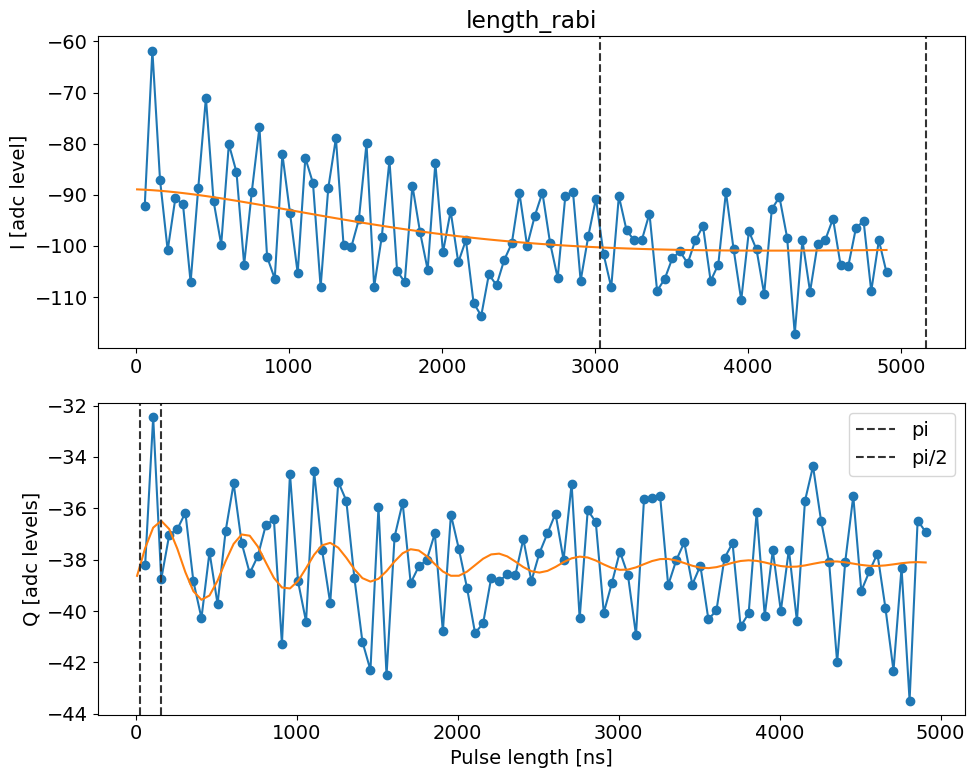

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-15_01-58-55_Sideband_General.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-15.md
Updated configuration and dataset: pi_length=5.1629558758283745, pi2_length=3.035567043738608, gain=9000
Running sideband general for manipulation mode 1 and storage mode 5


  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00018_SidebandGeneralExperiment.h5
p1: 0.31809447701832794
p2: 92.65698174454616
Pi length: 1.548657806861748
Pi/2 length: 0.7627277827274543
p1: 0.3182690382036224
p2: 92.19477011396403
Pi length: 1.5518424887880864
Pi/2 length: 0.7663435241038282


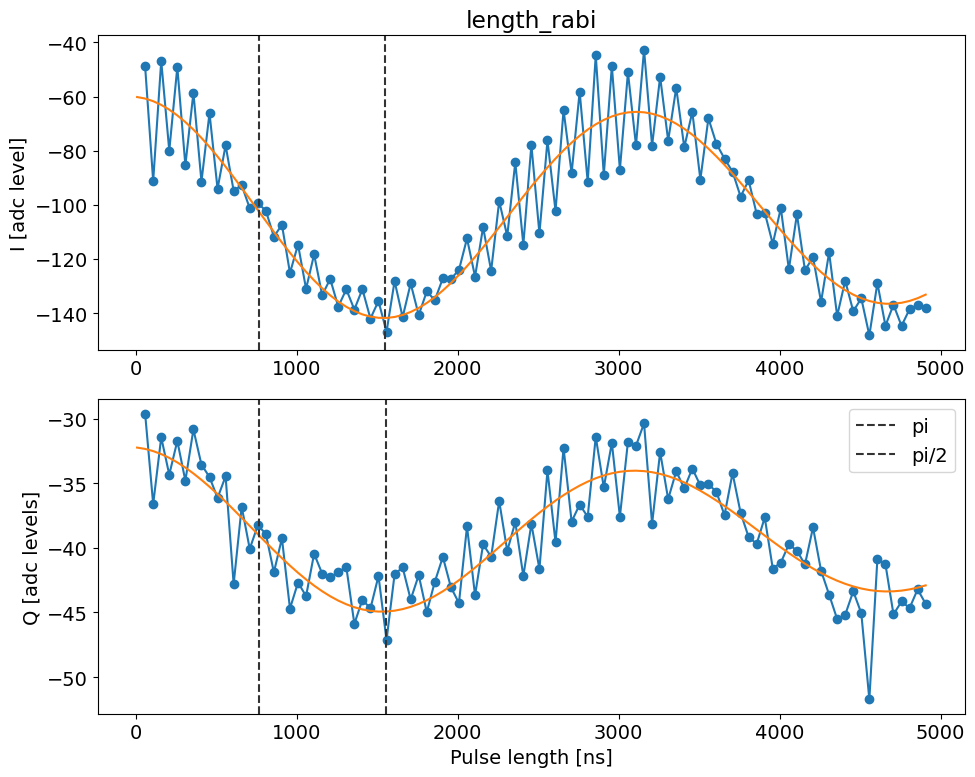

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-15_02-01-52_Sideband_General.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-15.md
Updated configuration and dataset: pi_length=1.548657806861748, pi2_length=0.7627277827274543, gain=7500
Running sideband general for manipulation mode 1 and storage mode 6


  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00019_SidebandGeneralExperiment.h5
p1: 0.38579957728768294
p2: 92.90674639382262
Pi length: 1.2750809835511685
Pi/2 length: 0.6270761263203891
p1: 0.37949451727102285
p2: 103.87235824406935
Pi length: 1.2160008920884826
Pi/2 length: 0.5572298463359086


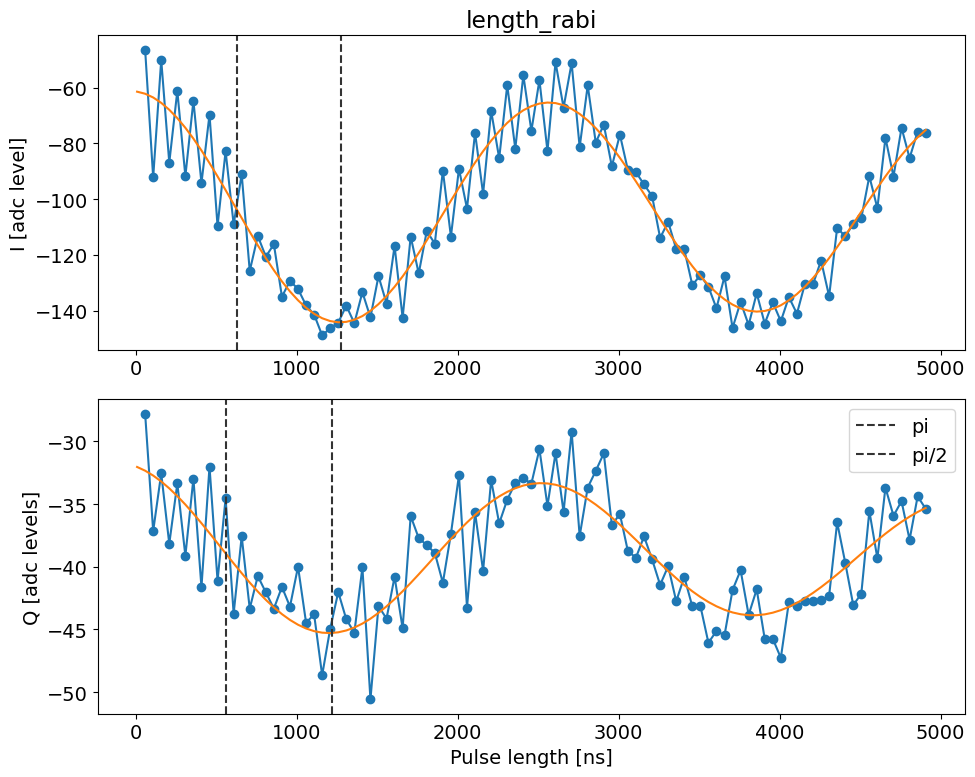

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-15_02-04-49_Sideband_General.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-15.md
Updated configuration and dataset: pi_length=1.2750809835511685, pi2_length=0.6270761263203891, gain=13500
Running sideband general for manipulation mode 1 and storage mode 7


  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00020_SidebandGeneralExperiment.h5
p1: 0.21483501007882752
p2: 94.73201526034653
Pi length: 2.2661833049793256
Pi/2 length: 1.1024996022705833
p1: 0.21246566685623153
p2: 96.7875752062522
Pi length: 2.264580586343169
Pi/2 length: 1.087919887703484


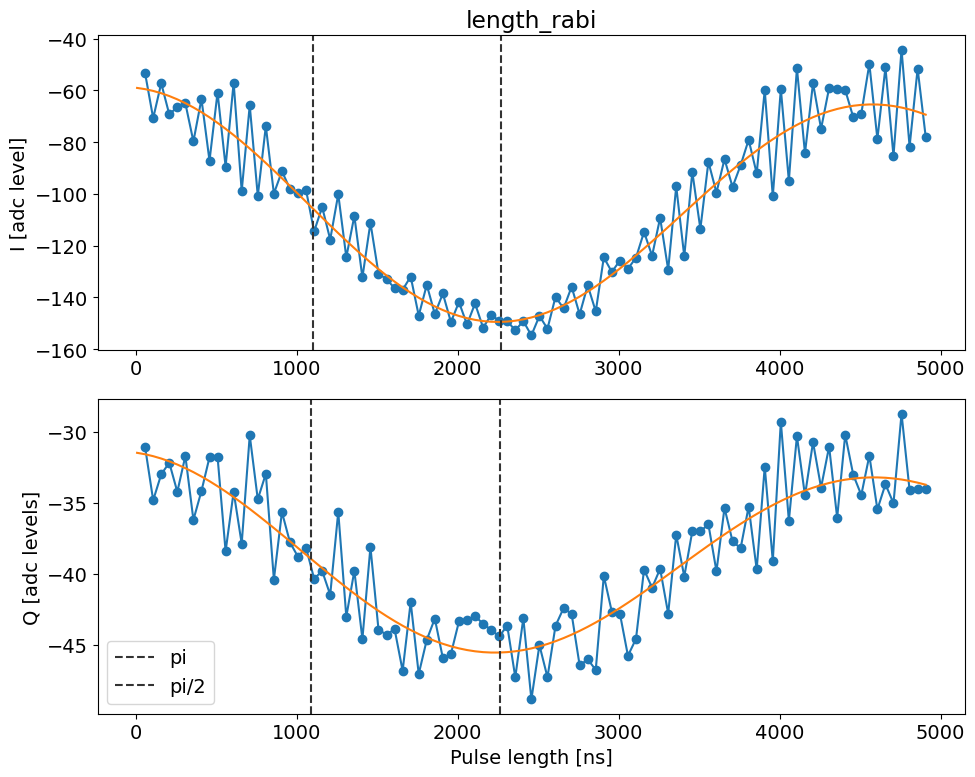

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-15_02-07-47_Sideband_General.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-15.md
Updated configuration and dataset: pi_length=2.2661833049793256, pi2_length=1.1024996022705833, gain=10000


In [ ]:
len_rabi_storages = [None]* len(expts_to_run['stor_modes'])
if expts_to_run['sideband_length_rabi']:
    for man_mode_no in expts_to_run['man_modes']:
        for stor_mode_no in expts_to_run['stor_modes']:
            print(f'Running sideband general for manipulation mode {man_mode_no} and storage mode {stor_mode_no}')
            len_rabi_storages[stor_mode_no-1] = do_sideband_general(config_thisrun, expt_path, config_path, man_mode_no, stor_mode_no)
            update_sideband_general(len_rabi_storages[stor_mode_no-1], config_thisrun, ds_thisrun, man_mode_no, stor_mode_no)


In [ ]:
# stor_mode_no = 1
# man_mode_no = 1
# len_rabi_storage = do_sideband_general(config_thisrun, expt_path, config_path, man_mode_no, stor_mode_no)
# update_sideband_general(len_rabi_storage, config_thisrun, ds_thisrun, man_mode_no, stor_mode_no)

## Randomized Benchmarking

In [ ]:
len([1, 5, 10, 15, 25, 50, 75, 100, 150, 200, 250, 400, 500, 600, 700, 850, 1000, 1250, 1500])

19

In [ ]:
# config_thisrun.device.storage.ramp_sigma
# man_mode_no = 1
# stor_mode_no = 7
# req = ds_thisrun.get_freq('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
# gain = ds_thisrun.get_gain('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
# hpi_length = ds_thisrun.get_h_pi('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
# print("ramp_sigma:", config_thisrun.device.storage.ramp_sigma)
# print("man_mode_no:", man_mode_no)
# print("stor_mode_no:", stor_mode_no)
# print("freq:", req)
# print("gain:", gain)
# print("hpi_length:", hpi_length)

In [ ]:

def do_single_beam_splitter_rb_postselection_sweep_depth(config_thisrun, ds_thisrun, expt_path, config_path, exp_param_file, man_mode_no=1, stor_mode_no=1,
                                                         prev_data=None):
    """
    Run the SingleBeamSplitterRBPostSelection_sweep_depth experiment.
    """
    from multimode_expts.sequential_experiment_classes import MM_DualRailRB
    experiment_class = MM_DualRailRB
    sweep_experiment_name = 'SingleBeamSplitterRBPostSelection_sweep_depth'
    class_for_exp = experiment_class(
        soccfg=soc, path=expt_path, prefix=sweep_experiment_name, config_file=config_path, exp_param_file=exp_param_file, 
        prev_data=prev_data
    )

    class_for_exp.yaml_cfg = AttrDict(deepcopy(config_thisrun))
    # Customize bs_para for the given manipulation and storage mode using ds_thisrun directly
    freq = ds_thisrun.get_freq('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
    gain = ds_thisrun.get_gain('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
    hpi_length = ds_thisrun.get_h_pi('M' + str(man_mode_no) + '-S' + str(stor_mode_no))
    bs_para = [freq, gain, hpi_length, config_thisrun.device.storage.ramp_sigma]
    print('Beam splitter parameters:', bs_para)
    # Optionally, set up experiment parameters here if needed, e.g.:
    # class_for_exp.loaded[sweep_experiment_name] = dict(...)
    class_for_exp.loaded[sweep_experiment_name] = dict(
        depth_list=[1, 5, 10, 15, 25, 50, 75, 100, 150, 200, 250, 400, 500, 600, 700, 850, 1000, 1250, 1500, 2000],  # RB sequence depth list
        reps_list = [],
        qubits=[0],
        reps=0,  # doesn't matter

        single_shot_bef_expt=False,  # single shot before experiment
        singleshot_reps=2000,        # single shot measurement repetitions
        span=1000,                   # single shot plot span

        active_reset=False,          # for single shot post selection
        man_reset=True,              # for single shot post selection
        storage_reset=True,          # for single shot post selection
        threshold=None,              # for single shot post selection
        readout_per_round=4,         # for single shot post selection

        rb_active_reset=False,
        rb_man_reset=True,
        rb_storage_reset=True,
        rb_reps=1000,
        gates_per_wait=100000,       # ????
        parity_meas=True,            # If parity measurement is used, set to True; if False the reset arguments below should be false as well
        reset_qubit_after_parity=False,  # True # resetting via second parity str 
        reset_qubit_via_active_reset_after_first_meas=False,  # resetting via active reset after first parity str; the other reset should be false

        rounds=1,                    # always set to 1
        variations=10,                # number of different sequences
        rb_depth=10,                 # rb sequence depth
        IRB_gate_no=-1,              # IRB gate number, -1 means not using
        postselection_delay=2.0,     # in us, gap between two readout pulses
        bs_repeat=1,
        sync=False,
        setup=False,

        bs_para=bs_para,  # at 96  # beam splitter parameters [[frequency], [gain], [length (us)], [sigma]]
        prepulse=False,
        postpulse=False,
        f0g1_offset=0,               # offset phase in deg as a result of f0g1 prepulse/postpulse

        pre_sweep_pulse=[[None]],    # Gate based; prep f0g1 is done automatically ; RAM state prep is also automatic 
        ram_prepulse=[False, 6, [1], 1],  # [True/False, number of storage modes to be populated, [idx of modes to be skipped], variations]
        ram_prepulse_strs=None       # see SingleBeamSplitterRBPostSelection_sweep_depth_and_ram
    )
    

    class_for_exp.yaml_cfg.device.readout.relax_delay = [8000]  # Example, adjust as needed

    prefix, dir_path =eval('class_for_exp.run_sweep')(sweep_experiment_name=sweep_experiment_name)
    print('File saved at:', prefix)
    print('Directory path:', dir_path)

    # from multimode_expts.fit_display_classes import MM_DualRailRBFitting
    # rb_analysis = MM_DualRailRBFitting(
    #     filename=None,
    #     file_prefix=prefix,
    #     config=yaml_cfg,
    #     expt_path=expt_path,
    #     title=f'M{man_mode_no}-S{stor_mode_no}',
    #     prev_data=prev_data,
    #     dir_path=dir_path
    # )
    # rb_analysis.show_rb(save_fig=True)
    # return rb_analysis


In [ ]:
if expts_to_run['RB']:
    storage_rbs = [None] * len(expts_to_run['stor_modes'])
    for i in range(len(expts_to_run['stor_modes'])):
        print(f'Running storage RB postselection sweep depth for storage mode {i + 1}')
        storage_rbs[i] = do_single_beam_splitter_rb_postselection_sweep_depth(
            config_thisrun,
            ds_thisrun,
            expt_path,
            config_path,
            exp_param_file=exp_param_file,
            man_mode_no=1,
            stor_mode_no=i + 1
        )

In [ ]:
# from multimode_expts.fit_display_classes import MM_DualRailRBFitting
# dir_no = np.arange(72, 80, 1 )
# for idx, dir_no in enumerate(dir_no):
#     prefix = f"SingleBeamSplitterRBPostSelection_sweep_depth"
#     dir_name = f"{str(dir_no).zfill(5)}_SingleBeamSplitterRBPostSelection_sweep_depth" 
#     dir_path = r"H:\\\\Shared drives\\\\SLab\\\\Multimode\\\\experiment\\\\250505_craqm\\\\data\\\\" + dir_name
#     filepath = dir_path
#     # Initialize RB analysis
#     rb_analysis = MM_DualRailRBFitting(
#         filename=None,
#         file_prefix=prefix,
#         config=yaml_cfg,
#         expt_path=expt_path,
#         title=f"M1-S{idx + 1} RB Analysis",
#         prev_data=prev_data,
#         dir_path=filepath
#     )
#     rb_analysis.show_rb(save_fig=True)



In [ ]:
dir_no = 78
dir_name = f"{str(dir_no).zfill(5)}_SingleBeamSplitterRBPostSelection_sweep_depth" 
dir_path = r"H:\\\\Shared drives\\\\SLab\\\\Multimode\\\\experiment\\\\250505_craqm\\\\data\\\\" + dir_name
temp_data, attrs, filename = prev_data(dir_path, prefix='SingleBeamSplitterRBPostSelection_sweep_depth')

In [ ]:
atrrs = AttrDict(attrs)
attrs['config']['device']['qubit']['f_ge']

[3569.4263053206314]

In [ ]:
# storage_rb

In [ ]:
expt_test = Experiment(
            path=expt_path,
            prefix="yoyoyo",
            config_file=config_path,
        )

In [ ]:
expt_test.data = {}
f = expt_test.save_data()

In [ ]:
if expts_to_run['RB']:
    filename = expt_test.fname
    #create a directory with the filename but no .h5 extension
    import os
    directory = filename
    if directory.lower().endswith('.h5'):
        directory = directory[:-3]
    if not os.path.exists(directory):
        # Only create the directory if it is not the same as the filename (i.e., filename is not a directory itself)
        # Make sure the directory name does not have a .h5 extension
        os.makedirs(directory)

In [ ]:
# directory
# filename_only = os.path.basename(expt_test.fname)
# filename_only

NameError: name 'directory' is not defined

In [ ]:
if expts_to_run['RB']:
    from multimode_expts.fit_display_classes import MM_DualRailRBFitting
    rb_analysis = MM_DualRailRBFitting(file_prefix = "SingleBeamSplitterRBPostSelection_sweep_depth", 
                                    config=config_thisrun, expt_path=expt_path, title='M1_S1', 
                                    prev_data= prev_data)
    rb_analysis.show_rb()

In [ ]:
if expts_to_run['RB']:
    temp_data, attrs, filename = prev_data(expt_path, '00036_SingleBeamSplitterRBPostSelection_sweep_depth.h5')

In [ ]:
attrs['config'].keys()

dict_keys(['device', 'hw', 'aliases', 'data_management', 'expt', 'qubits', 'reps', 'single_shot_bef_expt', 'singleshot_reps', 'span', 'active_reset', 'man_reset', 'storage_reset', 'threshold', 'readout_per_round', 'rb_active_reset', 'rb_man_reset', 'rb_storage_reset', 'rb_reps', 'gates_per_wait', 'parity_meas', 'reset_qubit_after_parity', 'reset_qubit_via_active_reset_after_first_meas', 'rounds', 'variations', 'rb_depth', 'IRB_gate_no', 'postselection_delay', 'bs_repeat', 'sync', 'setup', 'bs_para', 'prepulse', 'postpulse', 'f0g1_offset', 'pre_sweep_pulse', 'ram_prepulse', 'ram_prepulse_strs', 'running_list'])

In [ ]:
temp_data.keys()

dict_keys(['Idata', 'Ie', 'Ig', 'Qdata', 'Qe', 'Qg', 'angle', 'confusion_matrix', 'fids', 'sequences', 'thresholds'])

In [ ]:
num_entries = len(temp_data['Idata'])
print(f"Number of entries in 'Idata': {num_entries}")

Number of entries in 'Idata': 10


In [ ]:
temp_data['sequences']

array([[ 6.,  3.,  2., ...,  3.,  3.,  4.],
       [ 2.,  5.,  6., ...,  2.,  5.,  6.],
       [ 2.,  5.,  5., ...,  1.,  1.,  6.],
       ...,
       [ 1.,  5.,  6., ...,  2.,  2., nan],
       [ 5.,  4.,  4., ...,  4.,  1.,  4.],
       [ 4.,  3.,  4., ...,  6.,  4.,  3.]])

# Shock TLS Function

In [ ]:
from multimode_expts.experiments.single_qubit.pulse_probe_f0g1_spectroscopy import PulseProbeF0g1SpectroscopyExperiment

def do_pulse_probe_f0g1_spectroscopy(config_thisrun, expt_path, config_path, 
                                     start=2007, step=0.02, expts=300, reps=100,
                                       rounds=1, length=1, gain=5000, pulse_type='gaussian',
                                         qubit_f=True, qubits=[0], prepulse=False, pre_sweep_pulse=None):
    """
    Run the PulseProbeF0g1SpectroscopyExperiment with specified parameters.
    """
    
    expt = PulseProbeF0g1SpectroscopyExperiment(
        soccfg=soc, path=expt_path, prefix='PulseProbeF0g1SpectroscopyExperiment', config_file=config_path
    )
    expt.cfg = AttrDict(deepcopy(config_thisrun))
    expt.cfg.expt = dict(
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        length=length,
        gain=gain,
        pulse_type=pulse_type,
        qubit_f=qubit_f,
        qubits=qubits,
        prepulse=prepulse,
        pre_sweep_pulse=pre_sweep_pulse
    )
    expt.cfg.device.readout.relax_delay = [5]  # Wait time between experiments [us]
    expt.go(analyze=True, display=True, progress=True, save=True)
    return expt

importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qsim
imported experiments.qsim.floquet_general
imported experiments.qsim.qsim_base
imported experiments.qsim.qsim_experiments
imported experiments.qsim.sideband_amp_rabi
imported experiments.qsim.sideband_ramsey
imported experiments.qsim.sideband_ramsey_scramble
imported experiments.qsim.sideband_scramble
imported experiments.qsim.sideband_stark
imported experiments.qsim.utils
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
impor

In [ ]:
# t2ramsey_ge_check = None
# while True: 
#     #close previous plots 
#     # import matplotlib.pyplot as plt
#     #each iteration is 5 minutes
#     # do_pulse_probe_f0g1_spectroscopy(
#     #     config_thisrun, expt_path, config_path,
#     #     start=3300, step=0.04, expts=10000, reps=100,
#     #     rounds=5, length=50, gain=30000, pulse_type='gaussian',
#     #     qubit_f=False, qubits=[0], prepulse=False, pre_sweep_pulse=None
#     # )

#     do_pulse_probe_ge(config_thisrun, start = 3300, 
#                       step = 0.04, expts = 10000, reps = 100, rounds = 5,
#                       length = 50, gain = 30000)
#     from IPython.display import clear_output
#     # from multimode_expts.fit_display_classes import SidebandFitting
#     clear_output(wait=True)
#     plt.close('all')  # Close all existing figures
#     t2ramsey_ge_check = do_t2_ramsey_ge(config_thisrun, expt_path, config_path)
#     t2ramsey_ge_check.analyze()
#     t2ramsey_ge_check.display(title_str='T2_ge_TLS')


In [ ]:
from multimode_expts.MM_base import MMAveragerProgram
from multimode_expts.experiments.qsim.utils import ensure_list_in_cfg

class ShockTLSProgram(MMAveragerProgram):
    def initialize(self):
        self.MM_base_initialize()
        
        
    def body(self):
        self.reset_and_sync()

        self.setup_and_pulse(
            ch=0,
            style='const',
            freq=self.freq2reg(1918, gen_ch=0),
            length=50,
            phase=0,
            gain=30000,
        )
    def update(self):
        self.mathi(self.q_rp, self.r_freq2, self.r_freq2, '+', self.f_step) # update frequency list index


class ShockTLSExperiment(Experiment):
    def acquire(self, progress):
        ensure_list_in_cfg(self.cfg)
        
        self.prog = ShockTLSProgram(soccfg=self.soccfg, cfg=self.cfg)
        self.prog.acquire(self.im[self.cfg.aliases.soc],
                         threshold=None,
                         load_pulses=True,
                         progress=progress,
                         debug=False)
    

### ShockTLS !!!

In [ ]:
shockTLS_bool = False # Set to FALSE to avoid running!!!!!!
if shockTLS_bool:    
    scktls = ShockTLSExperiment(soccfg=soc, path=expt_path, prefix='shockTLS',
                            config_file=config_path)
    scktls.cfg = AttrDict(deepcopy(config_thisrun))

    scktls.cfg.expt = dict(expts=2000, reps=2000, rounds=100000, qubit=[0])

    scktls.cfg.device.readout.relax_delay = [50] # Wait time between experiments [us]
    for kk in range(50):
        scktls.go(analyze=False, display=False, progress=True, save=False)

# Update Config and Dataset

In [31]:
def convert_attrdict_to_dict(attrdict):
    """
    Recursively converts an AttrDict or a nested dictionary into a standard Python dictionary.
    Converts np.float64 values to standard Python float.

    Args:
        attrdict (AttrDict or dict): The input AttrDict or dictionary to be converted.

    Returns:
        dict: A standard Python dictionary with all nested AttrDicts or dictionaries converted.
    """
    if isinstance(attrdict, AttrDict):
        return {key: convert_attrdict_to_dict(value) for key, value in attrdict.items()}
    elif isinstance(attrdict, dict):
        return {key: convert_attrdict_to_dict(value) for key, value in attrdict.items()}
    elif isinstance(attrdict, np.float64):
        return float(attrdict)
    else:
        return attrdict


def convert_numbers_to_float(data):
    """
    Recursively converts all numbers in a dictionary to float.

    Args:
        data (dict): The input dictionary.

    Returns:
        dict: A dictionary with all numbers converted to float.
    """
    if isinstance(data, dict):
        return {key: convert_numbers_to_float(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [convert_numbers_to_float(item) for item in data]
    elif isinstance(data, float):
        return float(data)
    elif isinstance(data, int):
        return int(data)
    else:
        return data

## Dataset comparison for man1_storage_swap_dataset

In [32]:
#compare the two datsets
differences = ds_thisrun.compare_with(ds)
# Filter out differences related to 'last_update' column
filtered_differences = [diff for diff in differences if diff['column'] != 'last_update']
# Update labels and calculate differences
for diff in filtered_differences:
    if np.isnan(diff['self_value']) and np.isnan(diff['other_value']):
        diff['difference'] = None
        continue
    diff['label'] = f"New value: {diff['self_value']}, Old value: {diff['other_value']}"
    diff['difference'] = diff['self_value'] - diff['other_value'] if isinstance(diff['self_value'], (int, float)) and isinstance(diff['other_value'], (int, float)) else None

# Group differences by storage name
grouped_differences = {}
for diff in filtered_differences:
    stor_name = diff['stor_name']
    if stor_name not in grouped_differences:
        grouped_differences[stor_name] = []
    grouped_differences[stor_name].append(diff)

# Print grouped differences
for stor_name, diffs in grouped_differences.items():
    print(f"In {stor_name}:")
    for diff in diffs:
        if np.isnan(diff['self_value']) and np.isnan(diff['other_value']):
            continue
        print(f"  Column '{diff['column']}': new_value = {diff['self_value']}, old_value = {diff['other_value']}, difference = {diff['difference']}")
    grouped_differences[stor_name].append(diff)


In M1-S1:
In M1-S2:
In M1-S3:
In M1-S4:
In M1-S5:
In M1-S6:
In M1-S7:
In M1:


In [33]:
ds_thisrun.df["gain (DAC units)"] = ds_thisrun.df["gain (DAC units)"].astype(int)

In [34]:
ds_thisrun.df

stor_name   freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1   348.705722              NaN   1.209192    0.604596   
1      M1-S2   520.119712              NaN   1.157138    0.578569   
2      M1-S3   695.791320              NaN   1.057229    0.528615   
3      M1-S4   873.467193              NaN   1.002202    0.501101   
4      M1-S5  1052.583825              NaN   1.838050    0.919025   
5      M1-S6  1244.545889              NaN   1.359600    0.679800   
6      M1-S7  1422.176794              NaN   2.416182    1.208091   
7      M1-S8    -1.000000            -1.00  -1.000000   -1.000000   
8      M1-S9    -1.000000            -1.00  -1.000000   -1.000000   
9     M1-S10    -1.000000            -1.00  -1.000000   -1.000000   
10    M1-S11    -1.000000            -1.00  -1.000000   -1.000000   
11    M1-S12    -1.000000            -1.00  -1.000000   -1.000000   
12        M1  2011.669365              NaN   0.540888    0.264524   
13        M2  1834.950000             0.01   1.054456    0.520515   
14     M2-S1   175.630000             0.01   2.173484    1.086742   
15     M2-S2   346.840000             0.01   0.908835    0.454417   
16     M2-S3   523.220000             0.01   1.561615    0.780808   
17     M2-S4   702.650000             0.01   1.386764    0.693382   
18     M2-S5   878.780000             0.01   1.303372    0.651686   
19     M2-S6  1070.100000             0.01   2.379622    1.189811   
20     M2-S7  1249.700000             0.01   1.796981    0.898491   
21     M2-M1   173.790000             0.01   0.463481    0.231741   
22     M1-D1  2313.426206             0.01  10.000000    0.000000   
23     M2-D2  2094.050000             0.01  15.000000    0.000000   
24      M1-C   973.230000             0.02   0.251127    0.122354   
25     M1_ce  2008.780000             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  
0               2977  2025-08-18 17:09:22.472298  
1               4765  2025-08-18 17:09:22.478282  
2               4883  2025-08-18 17:09:22.486261  
3               9080  2025-08-18 17:17:21.751136  
4               7115  2025-08-18 17:09:22.493242  
5              13375  2025-08-18 17:09:22.500224  
6               9522  2025-08-18 17:09:22.507236  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12              8000  2025-07-22 15:41:10.139750  
13             15000  2025-04-30 11:22:11.432806  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153  
22              4000  2025-06-04 17:23:32.148629  
23              8000  2025-01-23 17:22:53.776061  
24              1000  2025-01-20 09:34:00.029234  
25             15000  2025-01-20 09:52:35.311227

### set TRUE to update dataset for man1_storage_swap_dataset

In [35]:
# stor new datset at old file path
updateDataset = True # Set to FALSE after this run!!!!!!
if updateDataset:
    # store old dataset  into autocalib_path with date-time in the name
    current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    old_dataset_path = os.path.join(autocalib_path, f'old_dataset_{current_time}.h5')
    ds_thisrun.save_to_file(old_dataset_path)
    print('Old dataset saved to:', old_dataset_path)

    # save new dataset to current_dataset path
    ds_thisrun.save_to_file(ds.filename)
    # ds = copy(ds_thisrun)
    print('New dataset saved to old file path!')

Creating or updating new csv at path: H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\autocalibration_plots_2025-08-23\old_dataset_2025-08-23_22-25-46.h5
Old dataset saved to: H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\autocalibration_plots_2025-08-23\old_dataset_2025-08-23_22-25-46.h5
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\man1_storage_swap_dataset.csv
New dataset saved to old file path!


## Config comparison for hardware_config_202505

In [36]:
from pprint import pprint
print("Comparing configurations:")

def recursive_compare(d1, d2, path=""):
    for key in d1.keys():
        current_path = f"{path}.{key}" if path else key
        if key not in d2:
            print(f"Key '{current_path}' is missing in config2.")
        elif isinstance(d1[key], dict) and isinstance(d2[key], dict):
            recursive_compare(d1[key], d2[key], current_path)
        elif d1[key] != d2[key]:
            print(f"Key '{current_path}' differs:")
            if isinstance(d1[key], list) and len(d1[key]) == 1:
                print(f"  Old value (config1): {d1[key][0]}")
                print(f"  New value (config2): {d2[key][0]}")
            else:
                print(f"  Old value (config1): {d1[key]}")
                print(f"  New value (config2): {d2[key]}")
    for key in d2.keys():
        current_path = f"{path}.{key}" if path else key
        if key not in d1:
            print(f"Key '{current_path}' is missing in config1.")

recursive_compare(yaml_cfg, config_thisrun)

Comparing configurations:
Key 'device.qubit.f_ge' differs:
  Old value (config1): 3571.6994214615424
  New value (config2): 3571.709750355705
Key 'device.qubit.pulses.pi_ge.gain' differs:
  Old value (config1): 3429
  New value (config2): 3445
Key 'device.qubit.pulses.hpi_ge.gain' differs:
  Old value (config1): 1655
  New value (config2): 1701
Key 'device.readout.phase' differs:
  Old value (config1): -69.8075664914381
  New value (config2): -68.34629972735932
Key 'device.readout.threshold' differs:
  Old value (config1): -71.93799978190091
  New value (config2): -55.25421651086265
Key 'device.readout.threshold_list' differs:
  Old value (config1): [-71.93799978190091]
  New value (config2): [-55.25421651086265]
Key 'device.readout.confusion_matrix_without_reset' differs:
  Old value (config1): [0.9660000000000003, 0.0339999999999997, 0.04500000000000002, 0.955]
  New value (config2): [0.9569913982796561, 0.04300860172034393, 0.04260852170434087, 0.9573914782956592]
Key 'device.readou

In [37]:
# Copy contents from config_thisrun to yaml_cfg except for the storage_man_file
def update_yaml_config(yaml_cfg, config_thisrun):
    """
    Update the yaml_cfg with values from config_thisrun, excluding the storage_man_file.
    """
    updated_config = deepcopy(config_thisrun)
    updated_config.device.storage.storage_man_file = yaml_cfg.device.storage.storage_man_file
    return updated_config

def save_configurations(yaml_cfg, config_thisrun, autocalib_path, config_path):
    """
    Save the old and updated configurations to their respective files.
    """
    # Save old configuration
    current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    old_config_path = os.path.join(autocalib_path, f'old_config_{current_time}.yaml')
    old_config = convert_numbers_to_float(convert_attrdict_to_dict(yaml_cfg) )
    with open(old_config_path, 'w') as cfg_file:
        yaml.dump(old_config, cfg_file, default_flow_style=False, indent=4, width=80, canonical=False,
                  explicit_start=True, explicit_end=False, sort_keys=False, line_break=True)

    # Save updated configuration
    updated_config = convert_numbers_to_float(convert_attrdict_to_dict(update_yaml_config(yaml_cfg, config_thisrun)))
    with open(config_path, 'w') as f:
        yaml.dump(updated_config, f, default_flow_style=False, indent=4, width=80, canonical=False,
                  explicit_start=True, explicit_end=False, sort_keys=False, line_break=True)

### set TRUE to update hardware_config!!

In [38]:
# Main logic
updateConfig_bool = True # Set to FALSE after this run!!!!!!
updated_config = update_yaml_config(yaml_cfg, config_thisrun)
if updateConfig_bool:
    save_configurations(yaml_cfg, updated_config, autocalib_path, config_path)
    yaml_cfg = updated_config
    updateConfig_bool = False
    print("Configuration updated and saved, excluding storage_man_file. \n!!!!Please set updateConfig to False after this run!!!!!!.")

Configuration updated and saved, excluding storage_man_file. 
!!!!Please set updateConfig to False after this run!!!!!!.


# Loopbackprogram

In [ ]:
class LoopbackProgram(AveragerProgram):
    def initialize(self):
        cfg=self.cfg   
        res_ch = cfg["res_ch"]

        # set the nyquist zone
        self.declare_gen(ch=cfg["res_ch"], nqz=1)
        
        # configure the readout lengths and downconversion frequencies (ensuring it is an available DAC frequency)
        for ch in cfg["ro_chs"]:
            self.declare_readout(ch=ch, length=self.cfg["readout_length"],
                                 freq=self.cfg["pulse_freq"], gen_ch=cfg["res_ch"])

        # convert frequency to DAC frequency (ensuring it is an available ADC frequency)
        freq = self.freq2reg(cfg["pulse_freq"],gen_ch=res_ch, ro_ch=cfg["ro_chs"][0])
        phase = self.deg2reg(cfg["res_phase"], gen_ch=res_ch)
        gain = cfg["pulse_gain"]
        self.default_pulse_registers(ch=res_ch, freq=freq, phase=phase, gain=gain)

        style=self.cfg["pulse_style"]

        if style in ["flat_top","arb"]:
            sigma = cfg["sigma"]
            self.add_gauss(ch=res_ch, name="measure", sigma=sigma, length=sigma*5)
            
        if style == "const":
            self.set_pulse_registers(ch=res_ch, style=style, length=cfg["length"])
        elif style == "flat_top":
            # The first half of the waveform ramps up the pulse, the second half ramps down the pulse
            self.set_pulse_registers(ch=res_ch, style=style, waveform="measure", length=cfg["length"])
        elif style == "arb":
            self.set_pulse_registers(ch=res_ch, style=style, waveform="measure")
        
        self.synci(200)  # give processor some time to configure pulses
    
    def body(self):
        # fire the pulse
        # trigger all declared ADCs
        # pulse PMOD0_0 for a scope trigger
        # pause the tProc until readout is done
        # increment the time counter to give some time before the next measurement
        # (the syncdelay also lets the tProc get back ahead of the clock)
        self.measure(pulse_ch=self.cfg["res_ch"], 
                     adcs=self.ro_chs,
                     pins=[0], 
                     adc_trig_offset=self.cfg["adc_trig_offset"],
                     wait=True,
                     syncdelay=self.us2cycles(self.cfg["relax_delay"]))

In [ ]:
GEN_CH = 5
RO_CH = 0
config={"res_ch":GEN_CH, # --Fixed
        "ro_chs":[RO_CH], # --Fixed
        "reps":1, # --Fixed
        "relax_delay":1.0, # --us
        "res_phase":0, # --degrees
        "pulse_style": "const", # --Fixed
        
        "length":20, # [Clock ticks]
        # Try varying length from 10-100 clock ticks
        
        "readout_length":100, # [Clock ticks]
        # Try varying readout_length from 50-1000 clock ticks

        "pulse_gain":3000, # [DAC units]
        # Try varying pulse_gain from 500 to 30000 DAC units

        "pulse_freq": 750, # [MHz]
        # In this program the signal is up and downconverted digitally so you won't see any frequency
        # components in the I/Q traces below. But since the signal gain depends on frequency, 
        # if you lower pulse_freq you will see an increased gain.

        "adc_trig_offset": 100, # [Clock ticks]
        # Try varying adc_trig_offset from 100 to 220 clock ticks

        "soft_avgs":100
        # Try varying soft_avgs from 1 to 200 averages

       }

###################
# Try it yourself !
###################

prog =LoopbackProgram(soc, config)
iq_list = prog.acquire_decimated( soc = im[config_thisrun.aliases.soc], progress=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
iq_list

NameError: name 'iq_list' is not defined

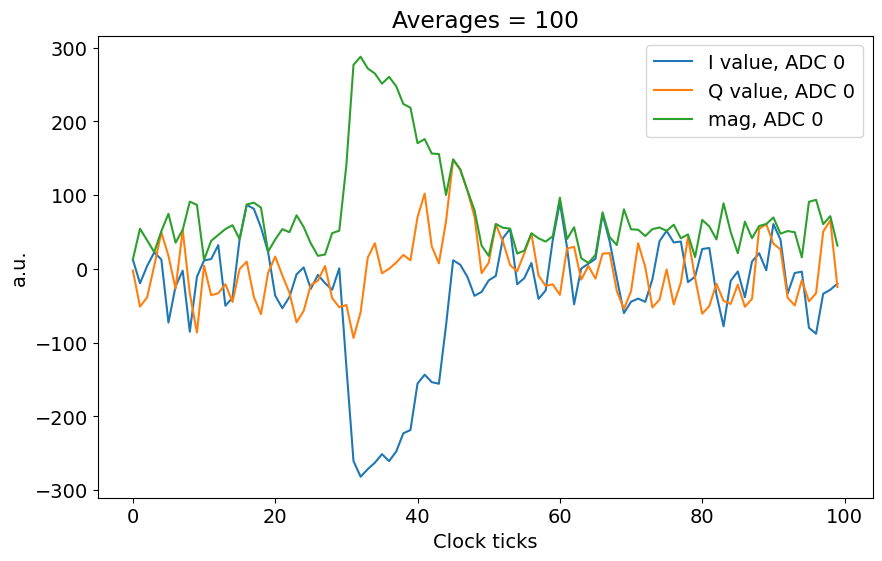

In [ ]:
# Plot results.
plt.figure(1)
for ii, iq in enumerate(iq_list):
    plt.plot(iq[0], label="I value, ADC %d"%(config['ro_chs'][ii]))
    plt.plot(iq[1], label="Q value, ADC %d"%(config['ro_chs'][ii]))
    plt.plot(np.abs(iq[0]+1j*iq[1]), label="mag, ADC %d"%(config['ro_chs'][ii]))
plt.ylabel("a.u.")
plt.xlabel("Clock ticks")
plt.title("Averages = " + str(config["soft_avgs"]))
plt.legend();